## 양돈 월별 데이터 시각화

In [1]:
import mysql.connector

conn = mysql.connector.connect(
    host = 'database-1.cba44miw26by.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'kjy',
    password = '0000',
    database = 'pig'
)

cursor = conn.cursor(buffered=True)

In [2]:
import pandas as pd

cols_monthly = ['id', '년도', '규모', '농장', '데이터구분', \
        '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

cursor.execute('select * from pig_db_monthly')
result = cursor.fetchall()
df_monthly = pd.DataFrame(result)
df_monthly.columns = cols_monthly
df_monthly.head()


id    년도       규모         농장      데이터구분    1월    2월    3월    4월    5월  \
0   0  2020  100~200  PIGGO_156        분만율  81.3  81.1  73.9  76.6  80.6   
1   1  2019  100~200  PIGGO_156       평균이유   9.0   8.5   9.9   9.0   9.1   
2   2  2018  100~200  PIGGO_156  임신사고(불규칙)   0.0   0.0   2.0   3.0   1.0   
3   3  2017  100~200  PIGGO_156     7일내재귀율  87.0  83.3  87.5  78.9  78.9   
4   4  2017  100~200  PIGGO_156   임신사고(도태)   NaN   NaN   NaN   NaN   NaN   

     6월    7월    8월    9월   10월   11월   12월  
0  68.6  79.4  77.4  75.9  79.4  72.2  75.0  
1   9.0   9.1   9.7   8.6   9.0   9.5  10.1  
2   1.0   2.0   3.0   4.0   2.0   4.0   2.0  
3  90.0   NaN   NaN   NaN   NaN   NaN   NaN  
4   NaN   0.0   0.0   0.0   0.0   0.0   0.0

In [15]:
month = cols_monthly[5:]
month

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

In [16]:
for i in month:
    print(i, df_monthly[i].isna().sum())

1월 6141
2월 6140
3월 6129
4월 6132
5월 6128
6월 6134
7월 6123
8월 6125
9월 6105
10월 6105
11월 6105
12월 6101


In [8]:
import numpy as np

np.sort(df_monthly['년도'].unique())

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2023])

In [9]:
df_monthly['데이터구분'].unique()

array(['분만율', '평균이유', '임신사고(불규칙)', '7일내재귀율', '임신사고(도태)', '모돈회전율',
       '임신사고(공태)', '임신사고(2차)', '임신사고(조기)', '임신사고(불임)', '임신사고(폐사)', '미라합계',
       '총산합계', '평균총산', '사산합계', '임신사고(유산)', '임신사고(지연)', '임신사고(1차)', '평균실산'],
      dtype=object)

In [21]:
# 임신사고 관련 행만 필터링
labels = ['임신사고(불규칙)', '임신사고(도태)', '임신사고(공태)', '임신사고(2차)',\
          '임신사고(조기)', '임신사고(불임)', '임신사고(폐사)', '임신사고(유산)', \
            '임신사고(지연)', '임신사고(1차)']

accident_row = df_monthly['데이터구분'].isin(labels)
df_filtered = df_monthly[accident_row]
df_filtered

id    년도        규모         농장      데이터구분    1월    2월    3월    4월  \
2          2  2018   100~200  PIGGO_156  임신사고(불규칙)   0.0   0.0   2.0   3.0   
4          4  2017   100~200  PIGGO_156   임신사고(도태)   NaN   NaN   NaN   NaN   
7          7  2015   100~200  PIGGO_156   임신사고(공태)   0.0   NaN   NaN   NaN   
8          8  2015   100~200  PIGGO_156   임신사고(2차)   NaN   0.0   NaN   NaN   
9          9  2015   100~200  PIGGO_156   임신사고(조기)   NaN   NaN   NaN   1.0   
...      ...   ...       ...        ...        ...   ...   ...   ...   ...   
16221  16221  2018  1000두 이상   PIGGO_25   임신사고(불임)   4.0   1.0   0.0   1.0   
16222  16222  2017  1000두 이상   PIGGO_25   임신사고(1차)  86.0  65.0  35.0  22.0   
16223  16223  2016  1000두 이상   PIGGO_25   임신사고(공태)   1.0   0.0   0.0   0.0   
16224  16224  2015  1000두 이상   PIGGO_25   임신사고(공태)   0.0   NaN   0.0   0.0   
16225  16225  2015  1000두 이상   PIGGO_25   임신사고(2차)   NaN   1.0   NaN   NaN   

         5월    6월    7월    8월    9월   10월   11월   12월  임신사고  
2       1.0   1.0   2.0   3.0   4.0   2.0   4.0   2.0  True  
4       NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0  True  
7       NaN   NaN   NaN   0.0   NaN   NaN   0.0   NaN  True  
8       NaN   NaN   NaN   NaN   0.0   NaN   NaN   0.0  True  
9       NaN   1.0   0.0   NaN   NaN   0.0   NaN   NaN  True  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
16221   1.0   2.0   1.0   2.0   4.0   0.0   1.0   0.0  True  
16222  34.0  48.0  65.0  83.0  87.0  67.0  82.0  61.0  True  
16223   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  True  
16224   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0  True  
16225   NaN   9.0   4.0   NaN   3.0   NaN   NaN   NaN  True  

[11377 rows x 18 columns]

In [28]:
# 연도별 월별 합계
df_grouped = df_filtered.groupby(['년도','규모','농장'])[month].sum().reset_index()
df_grouped

년도        규모         농장    1월    2월    3월    4월    5월    6월    7월  \
0     2012  1000두 이상  PIGGO_149   0.0   0.0   0.0   3.0   0.0   2.0   0.0   
1     2012  1000두 이상   PIGGO_16   6.0   6.0   6.0  30.0  42.0  18.0  12.0   
2     2012  1000두 이상  PIGGO_165   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3     2012  1000두 이상   PIGGO_17  28.0   0.0   0.0   0.0   0.0   0.0   0.0   
4     2012  1000두 이상  PIGGO_175   4.0   4.0   8.0   4.0   0.0   4.0   4.0   
...    ...       ...        ...   ...   ...   ...   ...   ...   ...   ...   
1283  2023  500~1000  PIGGO_366   0.0  12.0   0.0  10.0   6.0   0.0   0.0   
1284  2023  500~1000  PIGGO_367   0.0   0.0  30.0   0.0   0.0  15.0  33.0   
1285  2023  500~1000  PIGGO_426   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
1286  2023  500~1000  PIGGO_454   0.0   0.0   0.0  11.0   0.0   0.0   0.0   
1287  2023  500~1000  PIGGO_459   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

        8월   9월   10월   11월   12월  
0      0.0  0.0   0.0   3.0   0.0  
1     12.0  0.0   0.0   6.0   6.0  
2      0.0  0.0   0.0   0.0   0.0  
3      0.0  0.0  14.0   0.0  14.0  
4      4.0  0.0   0.0  16.0   8.0  
...    ...  ...   ...   ...   ...  
1283  44.0  0.0  38.0   0.0   0.0  
1284  15.0  0.0   6.0   3.0   3.0  
1285   0.0  0.0   0.0   0.0   1.0  
1286   1.0  0.0   0.0   0.0   0.0  
1287   0.0  0.0   0.0   0.0   4.0  

[1288 rows x 15 columns]

In [29]:
df_grouped['데이터구분'] = '임신사고 합계'
df_grouped

년도        규모         농장    1월    2월    3월    4월    5월    6월    7월  \
0     2012  1000두 이상  PIGGO_149   0.0   0.0   0.0   3.0   0.0   2.0   0.0   
1     2012  1000두 이상   PIGGO_16   6.0   6.0   6.0  30.0  42.0  18.0  12.0   
2     2012  1000두 이상  PIGGO_165   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3     2012  1000두 이상   PIGGO_17  28.0   0.0   0.0   0.0   0.0   0.0   0.0   
4     2012  1000두 이상  PIGGO_175   4.0   4.0   8.0   4.0   0.0   4.0   4.0   
...    ...       ...        ...   ...   ...   ...   ...   ...   ...   ...   
1283  2023  500~1000  PIGGO_366   0.0  12.0   0.0  10.0   6.0   0.0   0.0   
1284  2023  500~1000  PIGGO_367   0.0   0.0  30.0   0.0   0.0  15.0  33.0   
1285  2023  500~1000  PIGGO_426   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
1286  2023  500~1000  PIGGO_454   0.0   0.0   0.0  11.0   0.0   0.0   0.0   
1287  2023  500~1000  PIGGO_459   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

        8월   9월   10월   11월   12월    데이터구분  
0      0.0  0.0   0.0   3.0   0.0  임신사고 합계  
1     12.0  0.0   0.0   6.0   6.0  임신사고 합계  
2      0.0  0.0   0.0   0.0   0.0  임신사고 합계  
3      0.0  0.0  14.0   0.0  14.0  임신사고 합계  
4      4.0  0.0   0.0  16.0   8.0  임신사고 합계  
...    ...  ...   ...   ...   ...      ...  
1283  44.0  0.0  38.0   0.0   0.0  임신사고 합계  
1284  15.0  0.0   6.0   3.0   3.0  임신사고 합계  
1285   0.0  0.0   0.0   0.0   1.0  임신사고 합계  
1286   1.0  0.0   0.0   0.0   0.0  임신사고 합계  
1287   0.0  0.0   0.0   0.0   4.0  임신사고 합계  

[1288 rows x 16 columns]

In [31]:
cols = ['년도', '규모', '농장', '데이터구분', \
        '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
df_grouped = df_grouped[cols]
df_grouped

년도        규모         농장    데이터구분    1월    2월    3월    4월    5월    6월  \
0     2012  1000두 이상  PIGGO_149  임신사고 합계   0.0   0.0   0.0   3.0   0.0   2.0   
1     2012  1000두 이상   PIGGO_16  임신사고 합계   6.0   6.0   6.0  30.0  42.0  18.0   
2     2012  1000두 이상  PIGGO_165  임신사고 합계   0.0   0.0   0.0   0.0   0.0   0.0   
3     2012  1000두 이상   PIGGO_17  임신사고 합계  28.0   0.0   0.0   0.0   0.0   0.0   
4     2012  1000두 이상  PIGGO_175  임신사고 합계   4.0   4.0   8.0   4.0   0.0   4.0   
...    ...       ...        ...      ...   ...   ...   ...   ...   ...   ...   
1283  2023  500~1000  PIGGO_366  임신사고 합계   0.0  12.0   0.0  10.0   6.0   0.0   
1284  2023  500~1000  PIGGO_367  임신사고 합계   0.0   0.0  30.0   0.0   0.0  15.0   
1285  2023  500~1000  PIGGO_426  임신사고 합계   0.0   0.0   0.0   0.0   0.0   1.0   
1286  2023  500~1000  PIGGO_454  임신사고 합계   0.0   0.0   0.0  11.0   0.0   0.0   
1287  2023  500~1000  PIGGO_459  임신사고 합계   0.0   0.0   0.0   0.0   0.0   0.0   

        7월    8월   9월   10월   11월   12월  
0      0.0   0.0  0.0   0.0   3.0   0.0  
1     12.0  12.0  0.0   0.0   6.0   6.0  
2      0.0   0.0  0.0   0.0   0.0   0.0  
3      0.0   0.0  0.0  14.0   0.0  14.0  
4      4.0   4.0  0.0   0.0  16.0   8.0  
...    ...   ...  ...   ...   ...   ...  
1283   0.0  44.0  0.0  38.0   0.0   0.0  
1284  33.0  15.0  0.0   6.0   3.0   3.0  
1285   0.0   0.0  0.0   0.0   0.0   1.0  
1286   0.0   1.0  0.0   0.0   0.0   0.0  
1287   0.0   0.0  0.0   0.0   0.0   4.0  

[1288 rows x 16 columns]

In [32]:
df_monthly = pd.concat([df_monthly, df_grouped], ignore_index=True)
df_monthly

id    년도        규모         농장      데이터구분    1월    2월    3월    4월  \
0      0.0  2020   100~200  PIGGO_156        분만율  81.3  81.1  73.9  76.6   
1      1.0  2019   100~200  PIGGO_156       평균이유   9.0   8.5   9.9   9.0   
2      2.0  2018   100~200  PIGGO_156  임신사고(불규칙)   0.0   0.0   2.0   3.0   
3      3.0  2017   100~200  PIGGO_156     7일내재귀율  87.0  83.3  87.5  78.9   
4      4.0  2017   100~200  PIGGO_156   임신사고(도태)   NaN   NaN   NaN   NaN   
...    ...   ...       ...        ...        ...   ...   ...   ...   ...   
17509  NaN  2023  500~1000  PIGGO_366    임신사고 합계   0.0  12.0   0.0  10.0   
17510  NaN  2023  500~1000  PIGGO_367    임신사고 합계   0.0   0.0  30.0   0.0   
17511  NaN  2023  500~1000  PIGGO_426    임신사고 합계   0.0   0.0   0.0   0.0   
17512  NaN  2023  500~1000  PIGGO_454    임신사고 합계   0.0   0.0   0.0  11.0   
17513  NaN  2023  500~1000  PIGGO_459    임신사고 합계   0.0   0.0   0.0   0.0   

         5월    6월    7월    8월    9월   10월   11월   12월   임신사고  
0      80.6  68.6  79.4  77.4  75.9  79.4  72.2  75.0  False  
1       9.1   9.0   9.1   9.7   8.6   9.0   9.5  10.1  False  
2       1.0   1.0   2.0   3.0   4.0   2.0   4.0   2.0   True  
3      78.9  90.0   NaN   NaN   NaN   NaN   NaN   NaN  False  
4       NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0   True  
...     ...   ...   ...   ...   ...   ...   ...   ...    ...  
17509   6.0   0.0   0.0  44.0   0.0  38.0   0.0   0.0    NaN  
17510   0.0  15.0  33.0  15.0   0.0   6.0   3.0   3.0    NaN  
17511   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0    NaN  
17512   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0    NaN  
17513   0.0   0.0   0.0   0.0   0.0   0.0   0.0   4.0    NaN  

[17514 rows x 18 columns]

In [35]:
df_monthly = df_monthly.drop(columns='임신사고')
df_monthly

id    년도        규모         농장      데이터구분    1월    2월    3월    4월  \
0      0.0  2020   100~200  PIGGO_156        분만율  81.3  81.1  73.9  76.6   
1      1.0  2019   100~200  PIGGO_156       평균이유   9.0   8.5   9.9   9.0   
2      2.0  2018   100~200  PIGGO_156  임신사고(불규칙)   0.0   0.0   2.0   3.0   
3      3.0  2017   100~200  PIGGO_156     7일내재귀율  87.0  83.3  87.5  78.9   
4      4.0  2017   100~200  PIGGO_156   임신사고(도태)   NaN   NaN   NaN   NaN   
...    ...   ...       ...        ...        ...   ...   ...   ...   ...   
17509  NaN  2023  500~1000  PIGGO_366    임신사고 합계   0.0  12.0   0.0  10.0   
17510  NaN  2023  500~1000  PIGGO_367    임신사고 합계   0.0   0.0  30.0   0.0   
17511  NaN  2023  500~1000  PIGGO_426    임신사고 합계   0.0   0.0   0.0   0.0   
17512  NaN  2023  500~1000  PIGGO_454    임신사고 합계   0.0   0.0   0.0  11.0   
17513  NaN  2023  500~1000  PIGGO_459    임신사고 합계   0.0   0.0   0.0   0.0   

         5월    6월    7월    8월    9월   10월   11월   12월  
0      80.6  68.6  79.4  77.4  75.9  79.4  72.2  75.0  
1       9.1   9.0   9.1   9.7   8.6   9.0   9.5  10.1  
2       1.0   1.0   2.0   3.0   4.0   2.0   4.0   2.0  
3      78.9  90.0   NaN   NaN   NaN   NaN   NaN   NaN  
4       NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...   ...   ...   ...   ...  
17509   6.0   0.0   0.0  44.0   0.0  38.0   0.0   0.0  
17510   0.0  15.0  33.0  15.0   0.0   6.0   3.0   3.0  
17511   0.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0  
17512   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  
17513   0.0   0.0   0.0   0.0   0.0   0.0   0.0   4.0  

[17514 rows x 17 columns]

In [36]:
df_farrowing = df_monthly[df_monthly['데이터구분']=='분만율']
df_weaning = df_monthly[df_monthly['데이터구분']=='평균이유']
df_accident = df_monthly[df_monthly['데이터구분']=='임신사고 합계']
df_return_7d = df_monthly[df_monthly['데이터구분']=='7일내재귀율']
df_sow_turnover = df_monthly[df_monthly['데이터구분']=='모돈회전율']
df_mommy = df_monthly[df_monthly['데이터구분']=='미라합계']
df_totalborn_sum = df_monthly[df_monthly['데이터구분']=='총산합계']
df_totalborn_avg = df_monthly[df_monthly['데이터구분']=='평균총산']
df_stillbirth = df_monthly[df_monthly['데이터구분']=='사산합계']
df_liveborn_avg = df_monthly[df_monthly['데이터구분']=='평균실산']

In [57]:
df_farrowing

id    년도        규모         농장 데이터구분    1월    2월    3월    4월    5월  \
0          0.0  2020   100~200  PIGGO_156   분만율  81.3  81.1  73.9  76.6  80.6   
10        10.0  2014   100~200  PIGGO_156   분만율  77.8  77.3  55.6  44.4  55.8   
13        13.0  2012   100~200  PIGGO_156   분만율   NaN  70.0  81.3  53.6  58.8   
23        23.0  2020   100~200  PIGGO_156   분만율  81.3  81.1  73.9  76.6  80.6   
33        33.0  2014   100~200  PIGGO_156   분만율  77.8  77.3  55.6  44.4  55.8   
...        ...   ...       ...        ...   ...   ...   ...   ...   ...   ...   
15958  15958.0  2014   300~400  PIGGO_252   분만율  69.8  73.4  81.7  89.3  82.1   
15961  15961.0  2012   300~400  PIGGO_252   분만율   NaN   NaN  70.7   NaN   NaN   
15962  15962.0  2020  500~1000  PIGGO_149   분만율  77.6  70.2  72.6  80.2  75.9   
15971  15971.0  2014  500~1000  PIGGO_149   분만율  82.9  83.8  85.4  83.8  88.3   
15974  15974.0  2012  500~1000  PIGGO_149   분만율  81.6  86.9  84.1   NaN  87.4   

         6월    7월    8월    9월   10월   11월   12월  
0      68.6  79.4  77.4  75.9  79.4  72.2  75.0  
10     70.6  78.8  84.2  73.9  72.2  81.0  91.3  
13     60.9  72.7  75.0  75.9  86.7   NaN   NaN  
23     68.6  79.4  77.4  75.9  79.4  72.2  75.0  
33     70.6  78.8  84.2  73.9  72.2  81.0  91.3  
...     ...   ...   ...   ...   ...   ...   ...  
15958  89.7  87.8  84.9  88.7  79.5  79.2  82.2  
15961  78.9   NaN  79.7   NaN   NaN   NaN   NaN  
15962  76.5  77.8  84.1  83.3  83.1  80.3  83.9  
15971  81.4  77.6  74.8  83.6  79.3  72.8  75.1  
15974   NaN  84.5  80.9   NaN  78.3   NaN  71.1  

[936 rows x 17 columns]

In [61]:
month_cols = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

# melt: wide → long
df_farrowing_long = df.melt(id_vars=['년도', '규모'], value_vars=month_cols, var_name='월', value_name='분만율')
df_farrowing_long

년도        규모    월   분만율
0      2020   100~200   1월  81.3
1      2014   100~200   1월  77.8
2      2012   100~200   1월   NaN
3      2020   100~200   1월  81.3
4      2014   100~200   1월  77.8
...     ...       ...  ...   ...
11227  2014   300~400  12월  82.2
11228  2012   300~400  12월   NaN
11229  2020  500~1000  12월  83.9
11230  2014  500~1000  12월  75.1
11231  2012  500~1000  12월  71.1

[11232 rows x 4 columns]

In [62]:
# '1월' → 1로 매핑
month_map = {f'{i}월': i for i in range(1, 13)}
df_farrowing_long['월'] = df_farrowing_long['월'].map(month_map)

# 날짜형 생성
df_farrowing_long['날짜'] = pd.to_datetime(dict(year=df_farrowing_long['년도'], month=df_farrowing_long['월'], day=1))

# 정렬
df_farrowing_long = df_farrowing_long.sort_values('날짜').reset_index(drop=True)

df_farrowing_long


년도        규모   월   분만율         날짜
0      2012  1000두 이상   1  95.5 2012-01-01
1      2012  500~1000   1  81.6 2012-01-01
2      2012   200~300   1  76.5 2012-01-01
3      2012  1000두 이상   1   NaN 2012-01-01
4      2012   100~200   1  76.9 2012-01-01
...     ...       ...  ..   ...        ...
11227  2021   100~200  12  74.6 2021-12-01
11228  2021   100두 미만  12  70.8 2021-12-01
11229  2021   300~400  12  83.8 2021-12-01
11230  2021   400~500  12  79.0 2021-12-01
11231  2021   100두 미만  12  78.9 2021-12-01

[11232 rows x 5 columns]

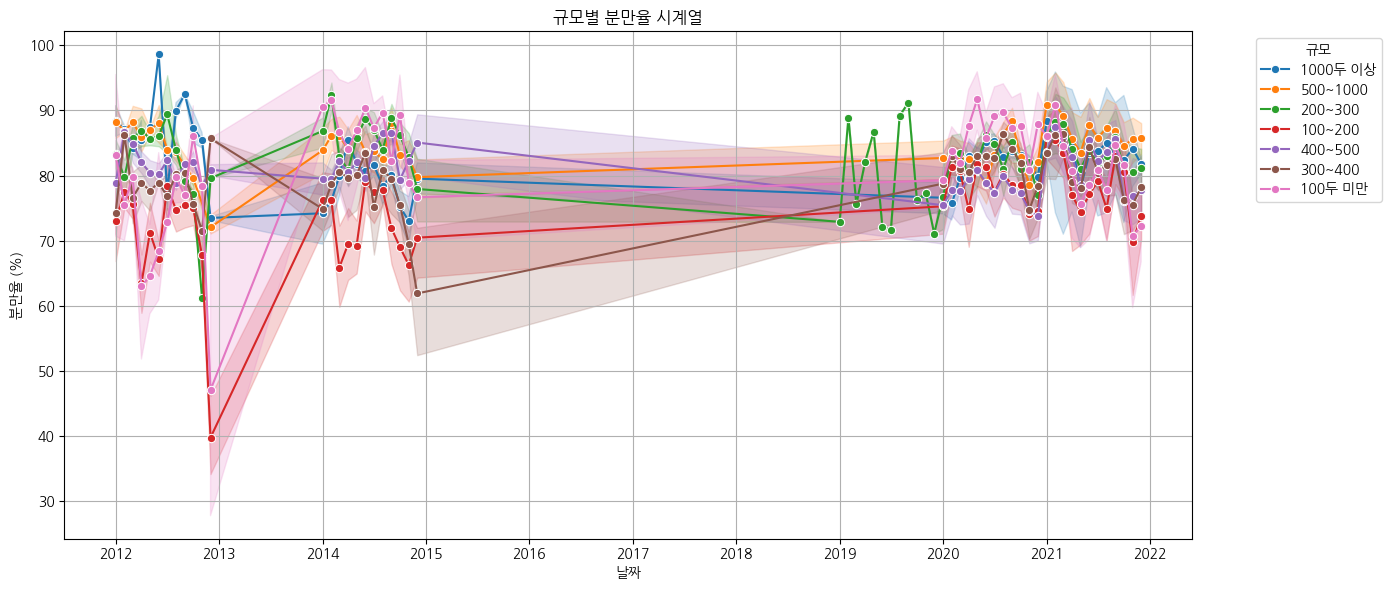

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

plt.figure(figsize=(14, 6))

sns.lineplot(data=df_farrowing_long, x='날짜', y='분만율', hue='규모', marker='o')

plt.title('규모별 분만율 시계열')
plt.xlabel('날짜')
plt.ylabel('분만율 (%)')
plt.legend(title='규모', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


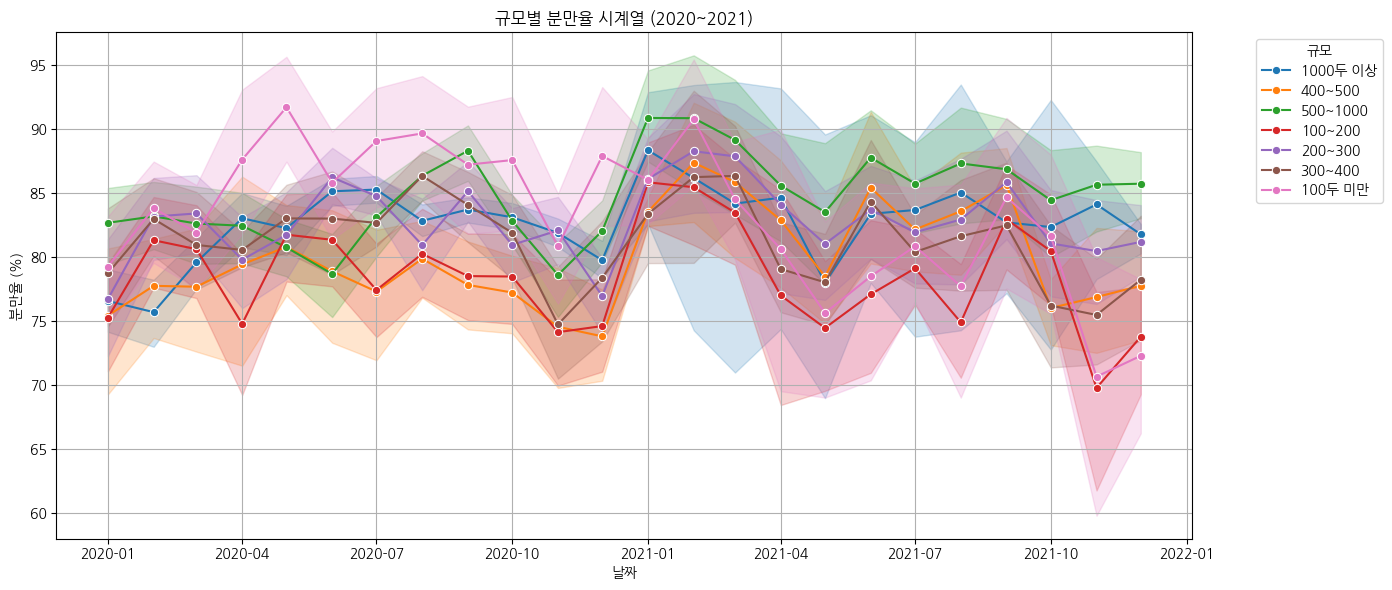

In [65]:
df_farrowing_long_tmp = df_farrowing_long[df_farrowing_long['년도'].isin([2020,2021])]

plt.figure(figsize=(14, 6))

sns.lineplot(data=df_farrowing_long_tmp, x='날짜', y='분만율', hue='규모', marker='o')

# 꾸미기
plt.title('규모별 분만율 시계열 (2020~2021)')
plt.xlabel('날짜')
plt.ylabel('분만율 (%)')
plt.legend(title='규모', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [66]:
# 규모 100두 미만 제외
df_farrowing_long_filt = df_farrowing_long[df_farrowing_long['규모'] != '100두 미만']
df_farrowing_long_filt

년도        규모   월   분만율         날짜
0      2012  1000두 이상   1  95.5 2012-01-01
1      2012  500~1000   1  81.6 2012-01-01
2      2012   200~300   1  76.5 2012-01-01
3      2012  1000두 이상   1   NaN 2012-01-01
4      2012   100~200   1  76.9 2012-01-01
...     ...       ...  ..   ...        ...
11224  2021   100~200  12  88.2 2021-12-01
11225  2021  500~1000  12  92.2 2021-12-01
11227  2021   100~200  12  74.6 2021-12-01
11229  2021   300~400  12  83.8 2021-12-01
11230  2021   400~500  12  79.0 2021-12-01

[10428 rows x 5 columns]

In [67]:
df_farrowing_long_filt['규모'].unique()

array(['1000두 이상', '500~1000', '200~300', '100~200', '400~500', '300~400',
       None], dtype=object)

/tmp/ipykernel_16207/2659991834.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='규모', bbox_to_anchor=(1.05, 1), loc='upper left')


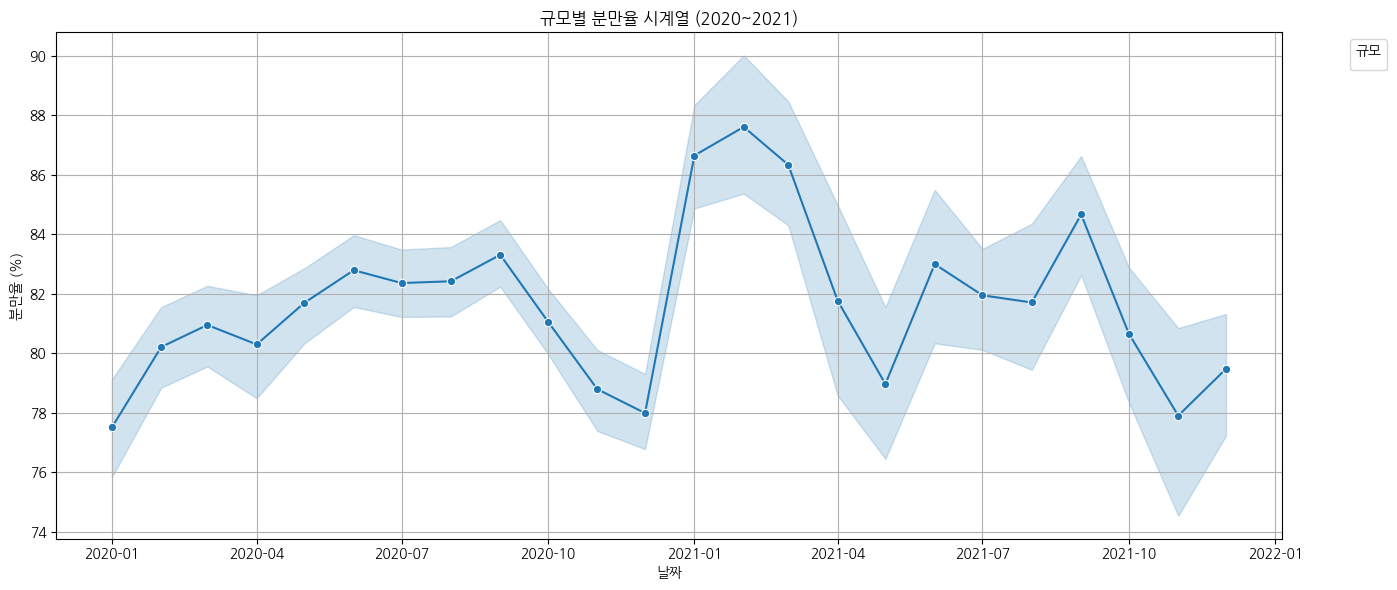

In [70]:
df_farrowing_long_filt_tmp = df_farrowing_long_filt[df_farrowing_long_filt['년도'].isin([2020,2021])]

plt.figure(figsize=(14, 6))

sns.lineplot(data=df_farrowing_long_filt_tmp, x='날짜', y='분만율', marker='o')

# 꾸미기
plt.title('규모별 분만율 시계열 (2020~2021)')
plt.xlabel('날짜')
plt.ylabel('분만율 (%)')
plt.legend(title='규모', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

def plot_timeseries(df, value_name='분만율', year_range=(2012,2023), id_vars=['년도', '규모'], title='시계열 추이', figsize=(14,6)):
    
    month_cols = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
    df_long = df.melt(id_vars=['년도', '규모'], value_vars=month_cols, var_name='월', value_name=value_name)

    month_map = {f'{i}월': i for i in range(1, 13)}
    df_long['월'] = df_long['월'].map(month_map)

    df_long['날짜'] = pd.to_datetime(dict(year=df_long['년도'], month=df_long['월'], day=1))

    start_year, end_year = year_range
    df_long = df_long[(df_long['년도'] >= start_year) & (df_long['년도'] <= end_year)]

    df_long = df_long.sort_values('날짜').reset_index(drop=True)

    # 100두 미만 제외
    df_long = df_long[df_long['규모'] != '100두 미만']
    df_long

    start_year, end_year = year_range
    df_long = df_long[(df_long['년도'] >= start_year) & (df_long['년도'] <= end_year)]

    plt.figure(figsize=figsize)
    sns.lineplot(data=df_long, x='날짜', y=value_name, marker='o')
    plt.title(title)
    plt.xlabel('날짜')
    plt.ylabel(value_name)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

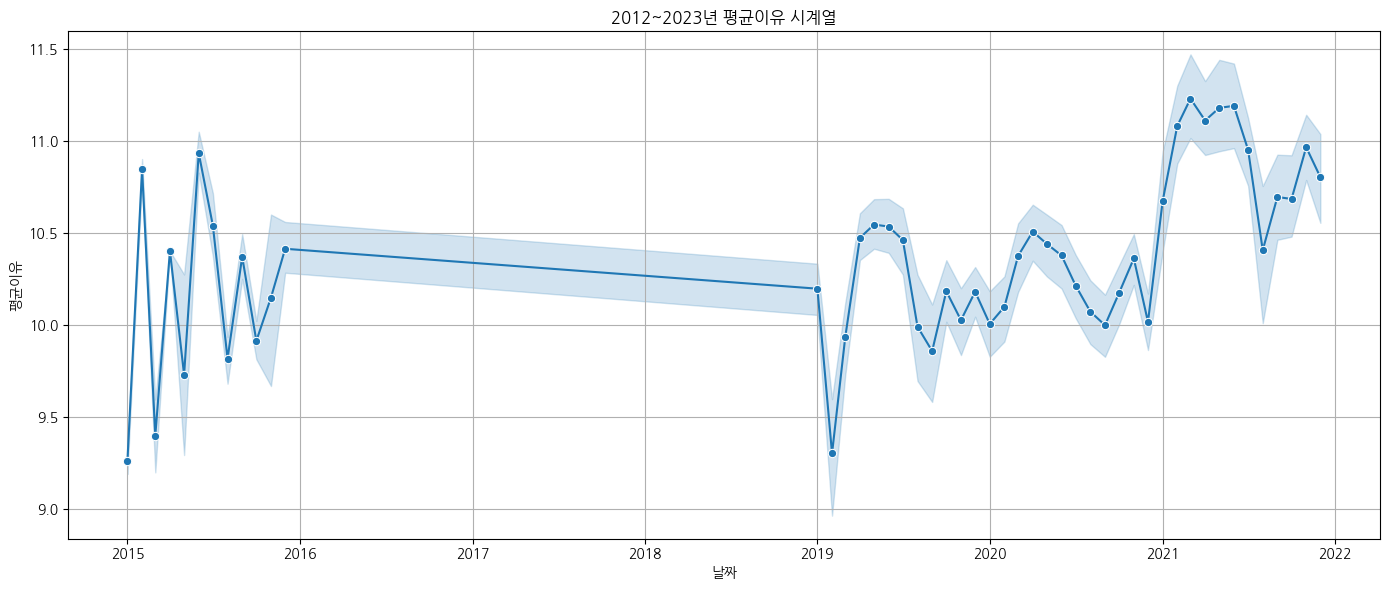

In [83]:
plot_timeseries(
    df=df_weaning,
    value_name='평균이유',
    year_range=(2012, 2023),
    id_vars=['년도'],
    title='2012~2023년 평균이유 시계열'
)

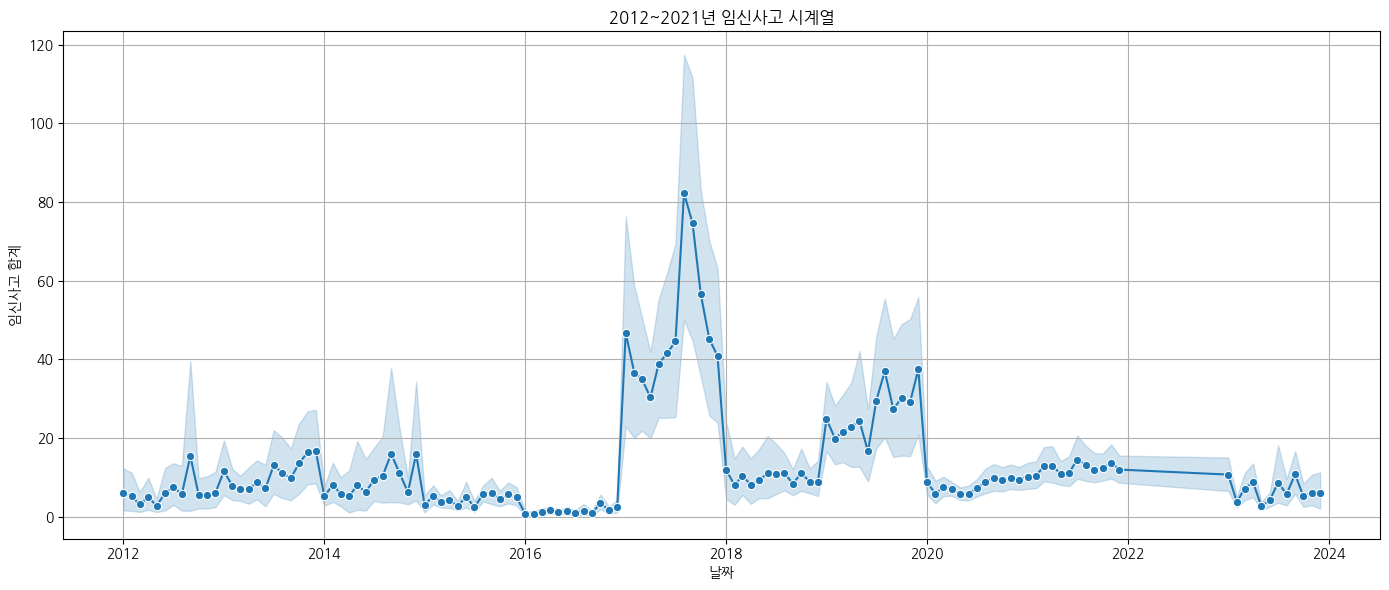

In [85]:
plot_timeseries(
    df=df_accident,
    value_name='임신사고 합계',
    year_range=(2012, 2023),
    id_vars=['년도'],
    title='2012~2021년 임신사고 시계열'
)

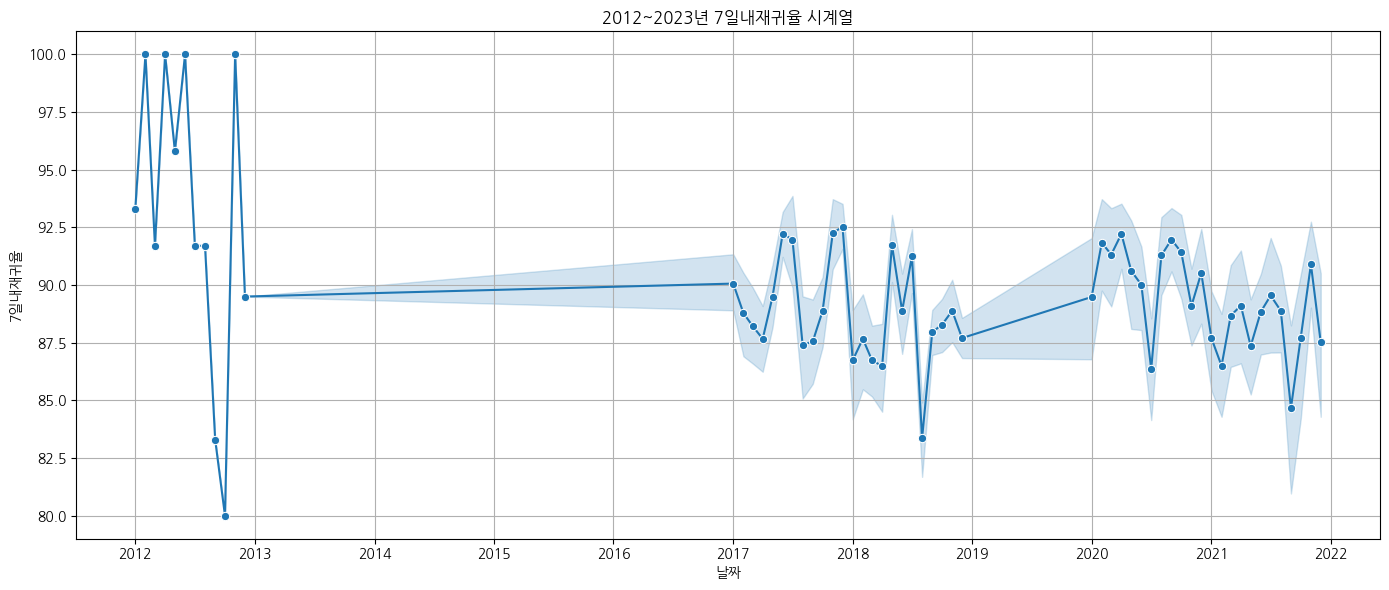

In [86]:
plot_timeseries(
    df=df_return_7d,
    value_name='7일내재귀율',
    year_range=(2012, 2023),
    id_vars=['년도'],
    title='2012~2023년 7일내재귀율 시계열'
)

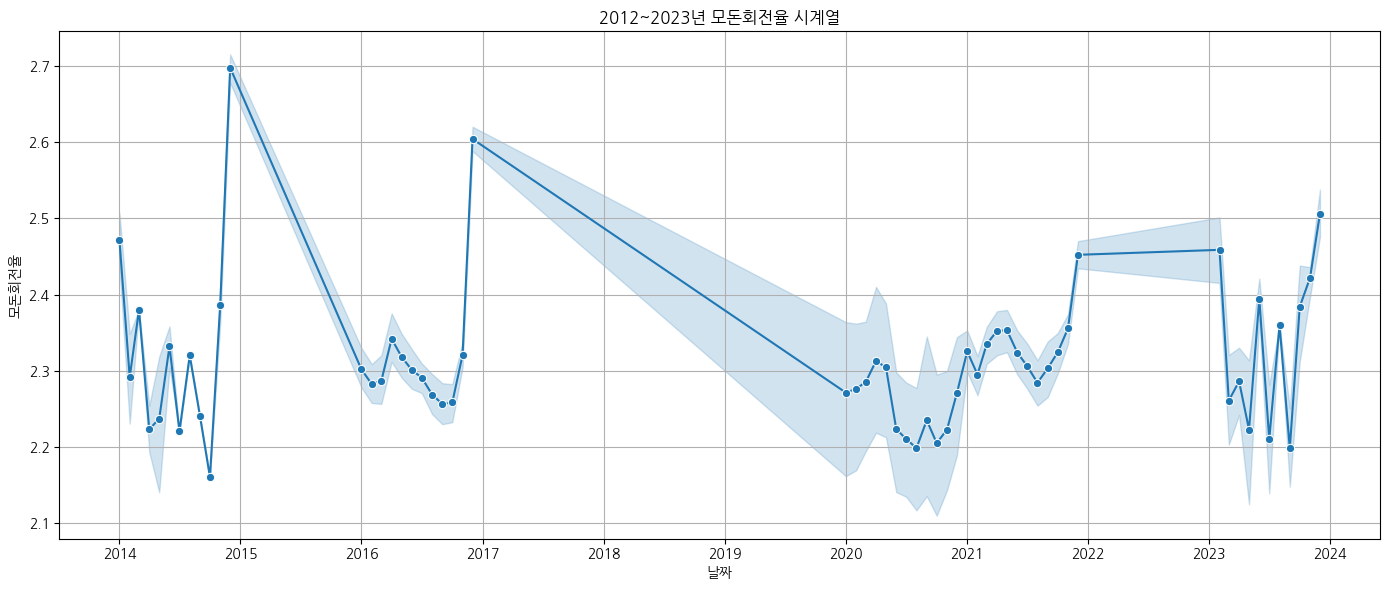

In [ ]:
plot_timeseries(
    df=df_sow_turnover,
    value_name='모돈회전율',
    year_range=(2012, 2023),
    id_vars=['년도'],
    title='2012~2023년 모돈회전율 시계열'
)

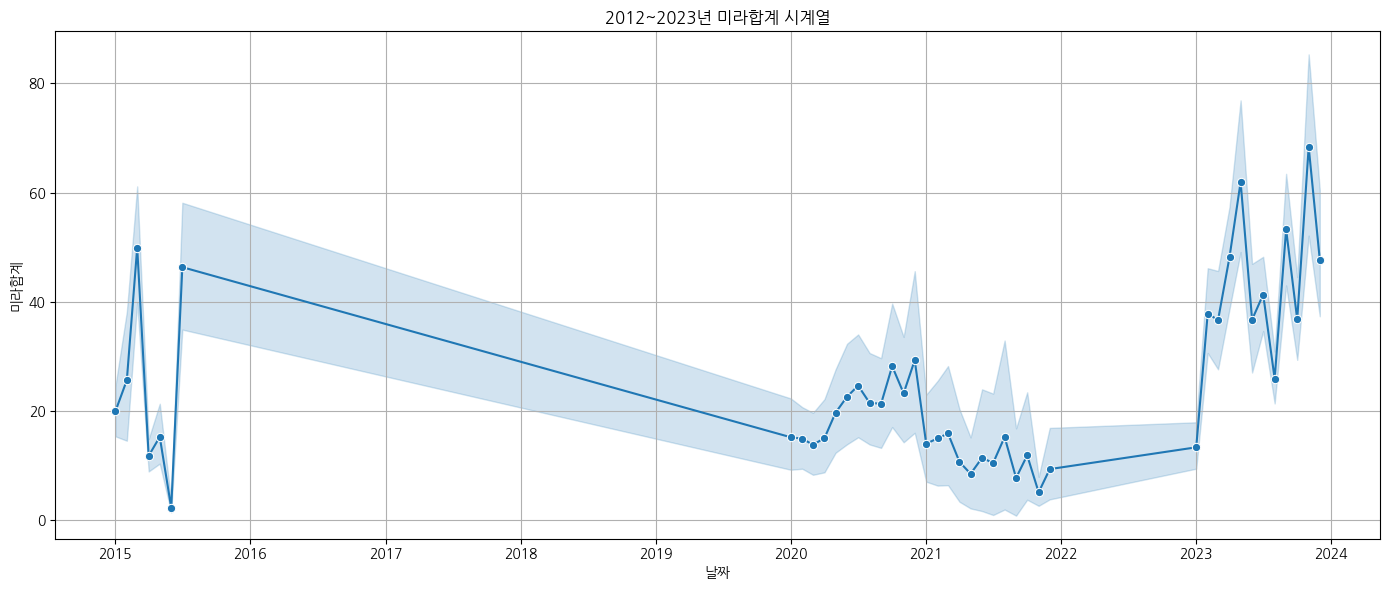

In [88]:
plot_timeseries(
    df=df_mommy,
    value_name='미라합계',
    year_range=(2012, 2023),
    id_vars=['년도'],
    title='2012~2023년 미라합계 시계열'
)

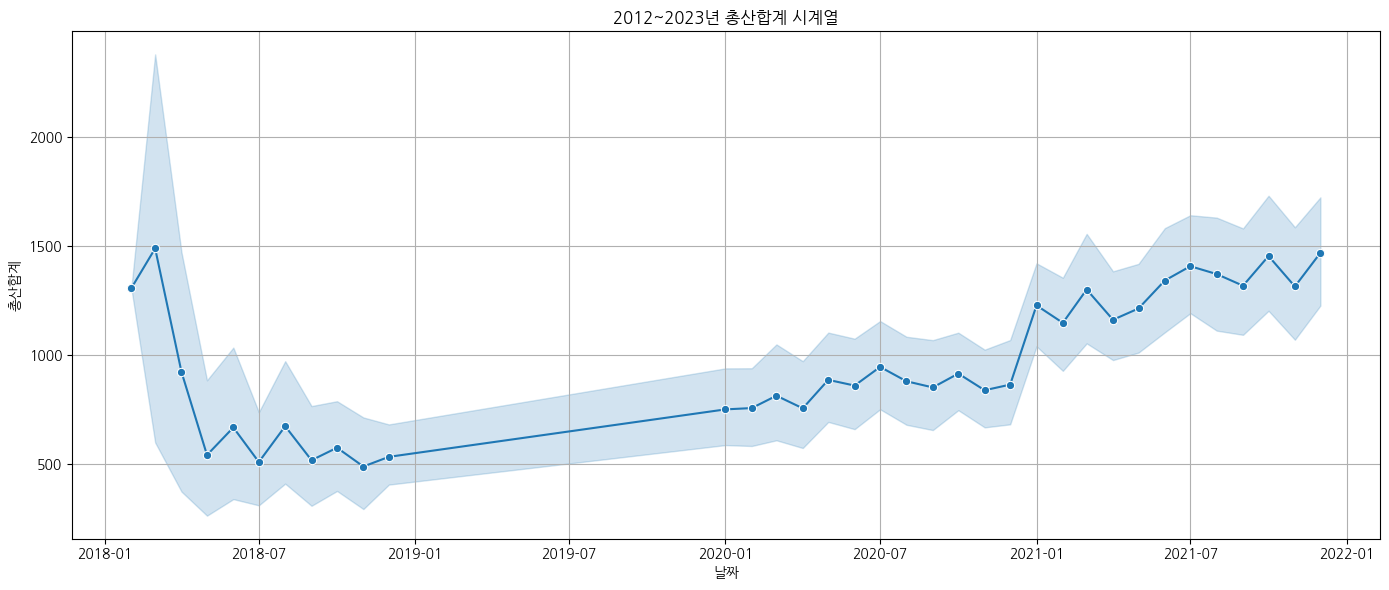

In [89]:
plot_timeseries(
    df=df_totalborn_sum,
    value_name='총산합계',
    year_range=(2012, 2023),
    id_vars=['년도'],
    title='2012~2023년 총산합계 시계열'
)

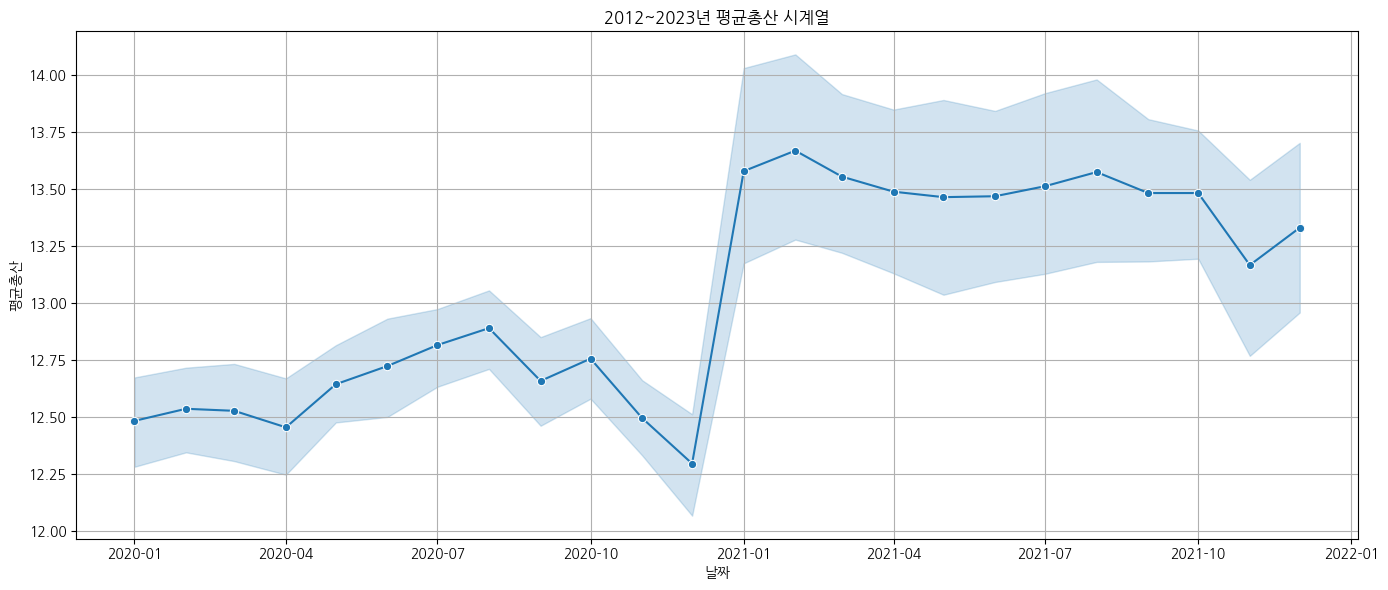

In [90]:
plot_timeseries(
    df=df_totalborn_avg,
    value_name='평균총산',
    year_range=(2012, 2023),
    id_vars=['년도'],
    title='2012~2023년 평균총산 시계열'
)

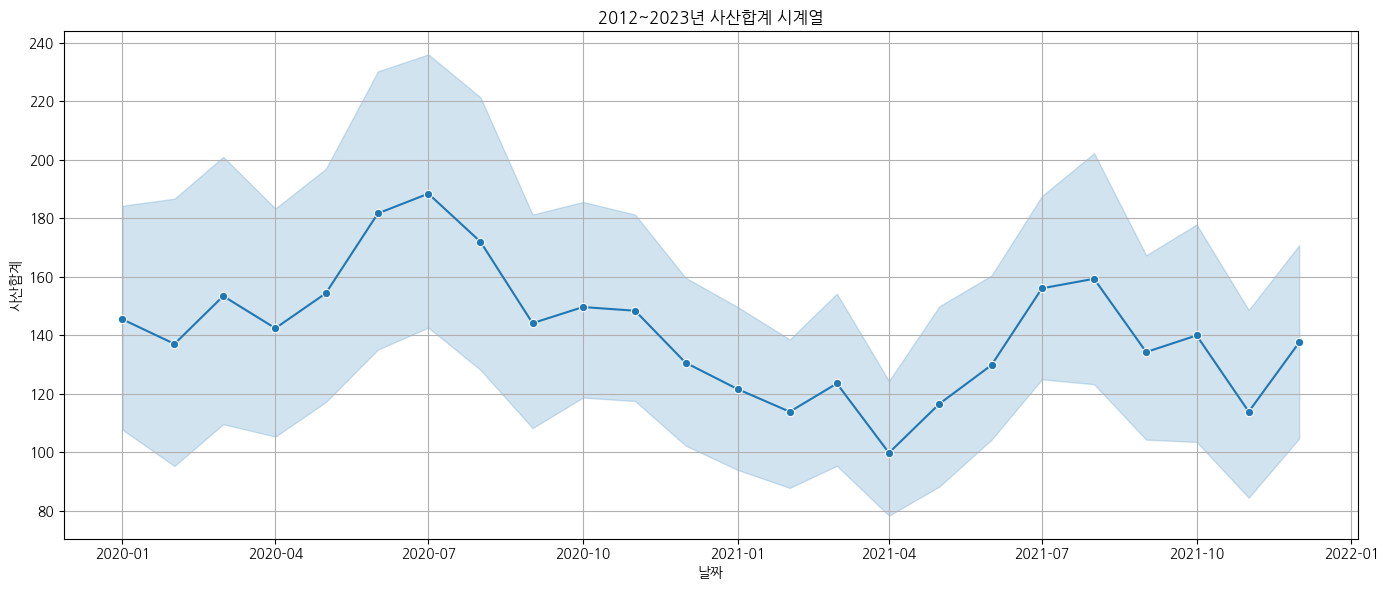

In [91]:
plot_timeseries(
    df=df_stillbirth,
    value_name='사산합계',
    year_range=(2012, 2023),
    id_vars=['년도'],
    title='2012~2023년 사산합계 시계열'
)

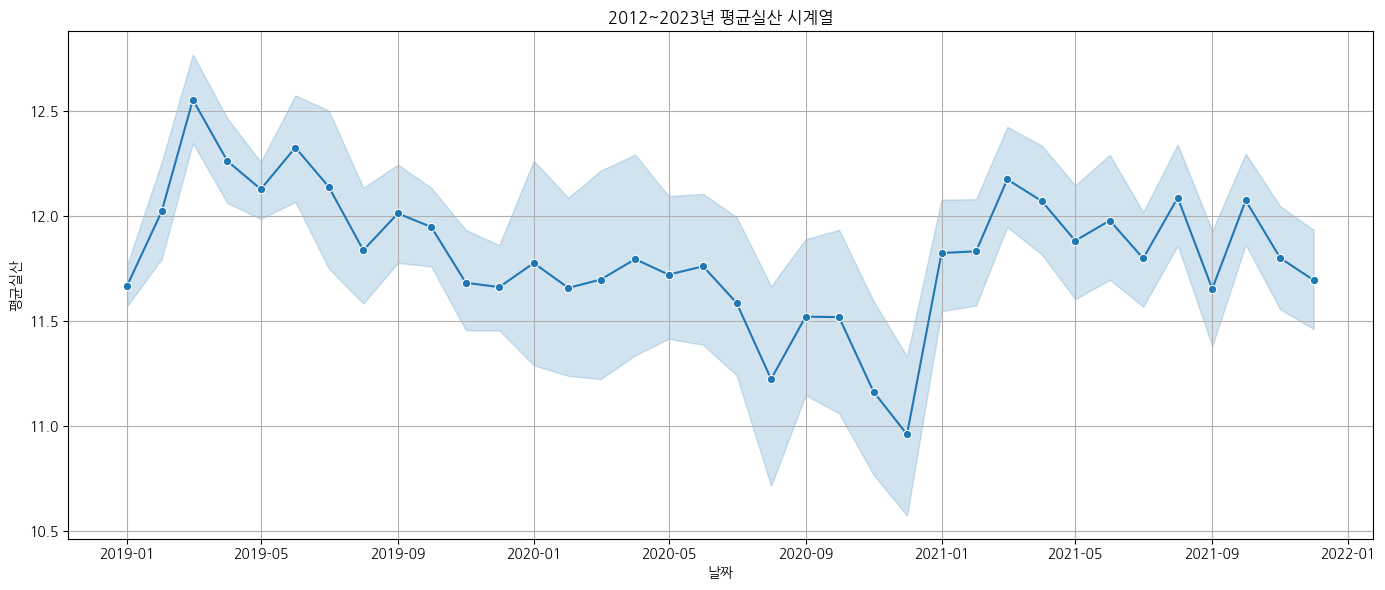

In [92]:
plot_timeseries(
    df=df_liveborn_avg,
    value_name='평균실산',
    year_range=(2012, 2023),
    id_vars=['년도'],
    title='2012~2023년 평균실산 시계열'
)

* 모돈회전율 월별->연도별로 평균 및 시각화

In [93]:
df_sow_turnover

id    년도        규모         농장  데이터구분    1월    2월    3월    4월  \
5          5.0  2016   100~200  PIGGO_156  모돈회전율  2.19  2.03  1.91  1.94   
18        18.0  2023  500~1000  PIGGO_182  모돈회전율   NaN  2.30   NaN   NaN   
28        28.0  2016   100~200  PIGGO_156  모돈회전율  2.19  2.03  1.91  1.94   
53        53.0  2021  500~1000    0021749  모돈회전율  2.37  2.34  2.18  2.47   
60        60.0  2021   400~500    0021437  모돈회전율  2.37  2.32  2.30  2.28   
...        ...   ...       ...        ...    ...   ...   ...   ...   ...   
15871  15871.0  2016  1000두 이상   PIGGO_23  모돈회전율  2.35  2.28  2.26  2.29   
15891  15891.0  2016   400~500  PIGGO_245  모돈회전율  2.39  2.40  2.44  2.38   
15910  15910.0  2016   300~400  PIGGO_196  모돈회전율  2.06  2.12  2.08  2.23   
15934  15934.0  2023   200~300  PIGGO_238  모돈회전율   NaN  2.55   NaN   NaN   
16016  16016.0  2023   200~300  PIGGO_198  모돈회전율   NaN   NaN   NaN  2.33   

         5월    6월    7월    8월    9월   10월   11월   12월  
5      2.16  2.31  2.30  2.40  2.42  2.38  2.44  2.87  
18      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
28     2.16  2.31  2.30  2.40  2.42  2.38  2.44  2.87  
53     2.74  2.51  2.69  2.69  2.79  2.61  2.29  2.33  
60     2.31  2.35  2.29  2.17  2.13  2.17  2.39  2.47  
...     ...   ...   ...   ...   ...   ...   ...   ...  
15871   NaN  2.30  2.30   NaN  2.33  2.43  2.44  2.60  
15891   NaN  2.31  2.39  2.42  2.36  2.35  2.40  2.67  
15910  2.28   NaN  2.18  2.04  2.04  2.12  2.25  2.54  
15934   NaN  2.47   NaN  2.36   NaN   NaN   NaN   NaN  
16016   NaN   NaN  2.41   NaN   NaN   NaN   NaN  2.62  

[536 rows x 17 columns]

In [95]:
df_sow_turnover['규모'].unique()

array(['100~200', '500~1000', '400~500', '200~300', '300~400', '1000두 이상',
       '100두 미만'], dtype=object)

In [96]:
df_sow_turnover = df_sow_turnover[df_sow_turnover['규모'] != '100두 미만']
df_sow_turnover['규모'].unique()

array(['100~200', '500~1000', '400~500', '200~300', '300~400', '1000두 이상'],
      dtype=object)

In [97]:
month

['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

In [105]:
df_sow_turnover_group = df_sow_turnover.groupby(['년도'])[month].mean().mean(axis=1).reset_index(name='모돈회전율')
df_sow_turnover_group

년도     모돈회전율
0  2014  2.329892
1  2016  2.319122
2  2020  2.251053
3  2021  2.334022
4  2023  2.336528

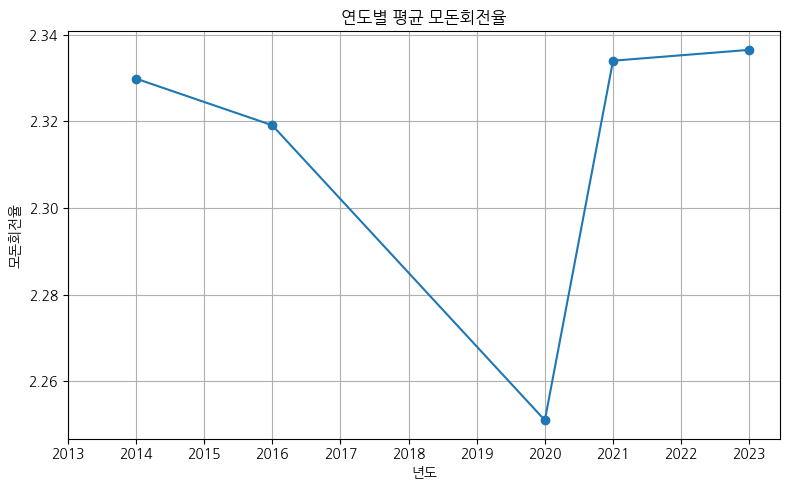

In [111]:
plt.figure(figsize=(8, 5))
plt.plot(df_sow_turnover_group['년도'], df_sow_turnover_group['모돈회전율'], marker='o', linestyle='-')
plt.title('연도별 평균 모돈회전율')
plt.xlabel('년도')
plt.ylabel('모돈회전율')
plt.grid(True)
plt.xticks([2013,2014,2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
plt.tight_layout()
plt.show()

## 양돈 연도별 데이터 시각화

In [112]:
import mysql.connector

conn = mysql.connector.connect(
    host = 'database-1.cba44miw26by.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'kjy',
    password = '0000',
    database = 'pig'
)

cursor = conn.cursor(buffered=True)

In [113]:
import pandas as pd

cols_yearly = ["ID", "년도", "규모", "농장", "상시모돈수", "MSY", "PSY", "모돈회전율", "평균비생산일수", 
    "평균총산", "평균실산", "평균이유", "분만율", "초교배일령", "임신기간", "포유기간", "재귀발정일"]

cursor.execute('select * from pig_db_yearly')
result = cursor.fetchall()
df_yearly = pd.DataFrame(result)
df_yearly.columns = cols_yearly
df_yearly.head()


ID    년도        규모         농장  상시모돈수   MSY   PSY  모돈회전율  평균비생산일수  평균총산  \
0   0  2019   100~200  PIGGO_156  144.0  17.2  19.7   2.13     75.0  13.0   
1   1  2021  500~1000  PIGGO_182  523.0  16.2  24.9   2.28     46.0  14.0   
2   2  2018   100~200  PIGGO_156  146.0  19.2  21.7   2.18     69.0  13.0   
3   3  2021  500~1000    0021749  637.0   NaN  29.2   2.52     25.0  14.0   
4   4  2021   400~500    0021437  454.0   NaN  30.9   2.29     44.0  16.0   

   평균실산  평균이유   분만율  초교배일령   임신기간  포유기간  재귀발정일  
0  11.0   9.0  65.4  257.0  116.0  20.0    8.0  
1  12.0  11.0  82.4  261.0  115.0  27.0    8.0  
2  12.0  10.0  76.3  263.0  116.0  20.0   13.0  
3  12.0  12.0  90.5  269.0  116.0  24.0    8.0  
4  14.0  14.0  81.5  232.0  114.0  27.0    8.0

In [114]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       1062 non-null   int64  
 1   년도       1062 non-null   int64  
 2   규모       1061 non-null   object 
 3   농장       1062 non-null   object 
 4   상시모돈수    1061 non-null   float64
 5   MSY      209 non-null    float64
 6   PSY      1044 non-null   float64
 7   모돈회전율    1044 non-null   float64
 8   평균비생산일수  1044 non-null   float64
 9   평균총산     1044 non-null   float64
 10  평균실산     1044 non-null   float64
 11  평균이유     1044 non-null   float64
 12  분만율      1044 non-null   float64
 13  초교배일령    1040 non-null   float64
 14  임신기간     1044 non-null   float64
 15  포유기간     1044 non-null   float64
 16  재귀발정일    1046 non-null   float64
dtypes: float64(13), int64(2), object(2)
memory usage: 141.2+ KB


In [115]:
df_yearly['년도'].unique()

array([2019, 2021, 2018, 2017, 2016, 2020, 2015, 2014, 2013, 2012, 2023,
       2022])

* 연도별 규모별 PSY, 모돈회전율 (규모별 편차 확인)

In [146]:
prod = ["상시모돈수", "MSY", "PSY", "모돈회전율", "평균비생산일수", 
    "평균총산", "평균실산", "평균이유", "분만율", "초교배일령", "임신기간", "포유기간", "재귀발정일"]

df_yearly_pivot = pd.pivot_table(data=df_yearly, index=['규모', '년도'], values=prod, aggfunc='mean').reset_index()
df_yearly_pivot = df_yearly_pivot[['규모', '년도'] + prod]  # 칼럼 순서 정렬
df_yearly_pivot

규모    년도        상시모돈수        MSY        PSY     모돈회전율    평균비생산일수  \
0   1000두 이상  2012  1915.857143        NaN  23.085714  2.377143  43.428571   
1   1000두 이상  2013  1780.000000  13.500000  22.883333  2.328333  48.583333   
2   1000두 이상  2014  1788.071429  22.200000  22.892857  2.353571  44.285714   
3   1000두 이상  2015  1882.733333  22.600000  23.300000  2.361333  43.000000   
4   1000두 이상  2016  1790.562500  23.000000  23.350000  2.321875  45.625000   
..       ...   ...          ...        ...        ...       ...        ...   
78  500~1000  2019   729.826087  22.400000  23.921739  2.367391  42.652174   
79  500~1000  2020   729.200000  18.875000  24.164000  2.327600  44.320000   
80  500~1000  2021   691.000000  15.445455  25.220833  2.355833  39.208333   
81  500~1000  2022   724.000000  19.400000  24.152174  2.269565  50.304348   
82  500~1000  2023   699.777778  20.280000  24.527778  2.285000  47.833333   

         평균총산       평균실산       평균이유        분만율       초교배일령        임신기간  \
0   11.285714  10.714286   9.857143  81.571429  258.571429  115.142857   
1   11.916667  10.750000   9.833333  78.366667  265.750000  115.000000   
2   12.357143  11.000000   9.714286  79.392857  270.571429  115.285714   
3   12.533333  10.933333   9.866667  79.360000  261.733333  115.266667   
4   12.312500  10.750000  10.125000  78.918750  261.812500  115.625000   
..        ...        ...        ...        ...         ...         ...   
78  12.565217  11.652174  10.043478  84.069565  268.695652  114.913043   
79  13.000000  11.640000  10.520000  84.380000  273.080000  114.720000   
80  13.458333  12.125000  10.791667  84.291667  265.375000  114.750000   
81  13.478261  11.956522  10.695652  82.143478  258.913043  114.521739   
82  13.611111  12.166667  10.722222  83.105556  260.833333  114.833333   

         포유기간     재귀발정일  
0   21.714286  7.142857  
1   23.166667  7.166667  
2   23.000000  6.785714  
3   22.400000  6.666667  
4   22.812500  6.750000  
..        ...       ...  
78  24.347826  6.956522  
79  24.880000  7.600000  
80  24.083333  6.916667  
81  24.652174  6.869565  
82  24.444444  7.055556  

[83 rows x 15 columns]

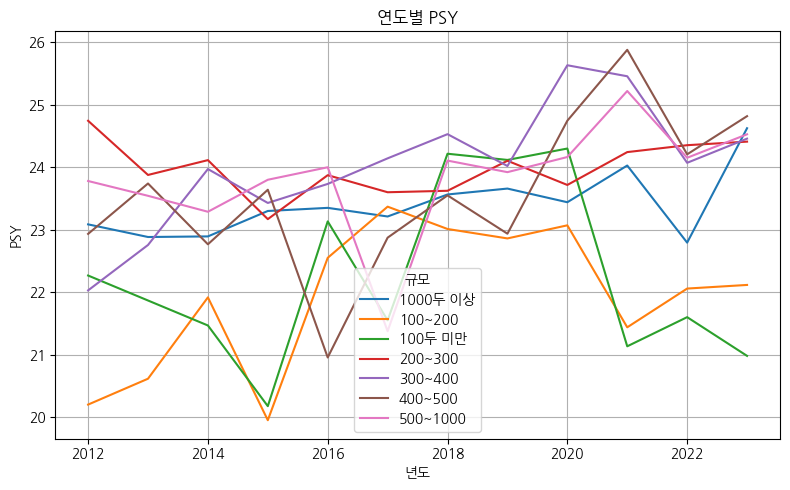

In [118]:
plt.figure(figsize=(8, 5))
sns.lineplot(df_yearly_pivot, x='년도', y='PSY', hue='규모')
plt.title('연도별 PSY')
plt.xlabel('년도')
plt.ylabel('PSY')
plt.grid(True)
plt.tight_layout()
plt.show()

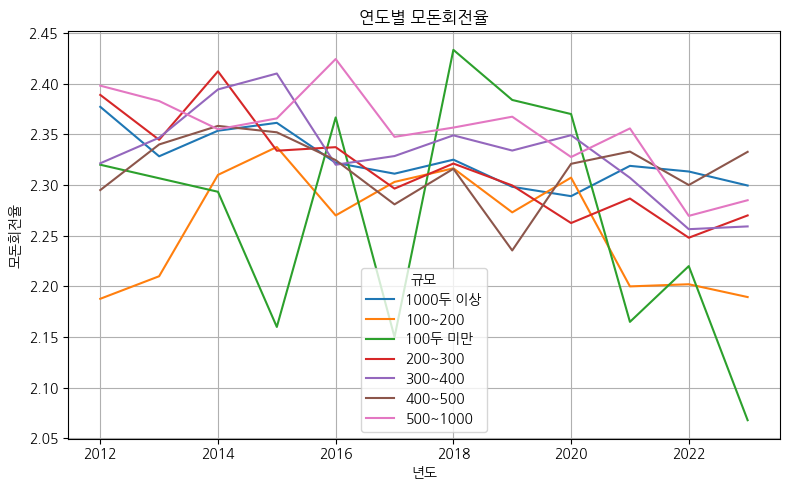

In [121]:
plt.figure(figsize=(8, 5))
sns.lineplot(df_yearly_pivot, x='년도', y='모돈회전율', hue='규모')
plt.title('연도별 모돈회전율')
plt.xlabel('년도')
plt.ylabel('모돈회전율')
plt.grid(True)
plt.tight_layout()
plt.show()

In [149]:
# 100두 미만 제외
df_yearly_pivot_filt= df_yearly_pivot[df_yearly_pivot['규모'] != '100두 미만']
df_yearly_pivot_filt =  pd.pivot_table(df_yearly_pivot_filt, index='년도', values=prod, aggfunc='mean')
df_yearly_pivot_filt = df_yearly_pivot_filt.reset_index()
df_yearly_pivot_filt = df_yearly_pivot_filt[['년도'] + prod]
df_yearly_pivot_filt

년도       상시모돈수        MSY        PSY     모돈회전율    평균비생산일수       평균총산  \
0   2012  634.971958  18.675000  22.795344  2.328040  43.810582  11.739418   
1   2013  609.312739  17.241667  22.902159  2.325412  44.853103  12.104630   
2   2014  620.213294  19.916667  23.158234  2.363889  41.066468  12.177579   
3   2015  639.538111  21.530000  22.881300  2.360066  40.318910  12.214301   
4   2016  626.073945  20.091667  23.076869  2.333007  43.672998  12.277083   
5   2017  601.523546  21.227778  23.095263  2.311284  46.767138  12.506888   
6   2018  647.825350  20.444444  23.731041  2.330719  46.464146  12.471289   
7   2019  621.710215  20.315000  23.583617  2.301282  48.734208  12.605128   
8   2020  597.045335  19.476389  24.128287  2.309412  46.779555  12.796100   
9   2021  622.840231  16.836835  24.377685  2.300255  44.868386  13.164451   
10  2022  637.491520  17.587619  23.605884  2.264905  48.911961  12.991448   
11  2023  622.765249  20.247361  24.159268  2.272645  48.975625  13.240568   

         평균실산       평균이유        분만율       초교배일령        임신기간       포유기간  \
0   10.830952   9.923545  80.992143  252.413757  115.248677  24.452116   
1   10.945879   9.895055  80.794017  251.653449  115.135043  24.374664   
2   11.049603   9.851190  81.384425  253.805556  115.319444  23.980159   
3   10.970711   9.750122  81.322523  255.294841  115.331349  24.173352   
4   11.130483   9.929167  80.574471  255.800821  115.219390  24.371636   
5   11.229234  10.000176  79.068412  254.004964  115.235730  24.197937   
6   11.336695  10.218534  79.597367  254.414286  115.087722  23.981886   
7   11.582039  10.225918  80.738614  261.513469  115.067103  24.253634   
8   11.595358  10.492352  81.374169  267.681259  115.064786  24.796206   
9   11.951653  10.662963  80.577758  259.678737  115.150165  24.786012   
10  11.941876  10.481105  79.724686  258.910640  115.036038  24.806983   
11  12.021159  10.656987  79.703938  258.331823  115.089035  24.787298   

       재귀발정일  
0   7.626720  
1   7.463472  
2   7.183532  
3   7.102228  
4   7.679365  
5   7.455154  
6   8.015873  
7   8.010304  
8   9.305494  
9   7.221065  
10  7.562931  
11  8.034326

### 연도별 데이터 규모 합쳐서 평균

In [139]:
import mysql.connector

conn = mysql.connector.connect(
    host = 'database-1.cba44miw26by.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'kjy',
    password = '0000',
    database = 'pig'
)

cursor = conn.cursor(buffered=True)

In [ ]:
sql = '''
create table pig_db_yearly_mean
(
    id int not null primary key,
    year int,
    msy float,
    psy float,
    sow_turnover float,
    nonprod_days float,
    total_born_avg float,
    live_born_avg float,
    weand_avg float,
    farrowing_rate float,
    first_mating_age float,
    gestation_len float,
    lactation_period float,
    return_estrus_days float     
)
'''
cursor.execute(sql)

In [150]:
sql = '''
insert into pig_db_yearly_mean
values (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
'''

for i, row in df_yearly_pivot_filt.iterrows():
    value = (i,) + tuple(row)
    cursor.execute(sql, value)
    print(tuple(row))
    conn.commit()

print('table에 데이터 삽입 완료')

(2012.0, 634.9719576719576, 18.674999999999997, 22.795343915343917, 2.3280396825396825, 43.81058201058201, 11.739417989417989, 10.83095238095238, 9.923544973544972, 80.99214285714285, 252.41375661375662, 115.24867724867725, 24.452116402116403, 7.626719576719577)
(2013.0, 609.3127391127391, 17.241666666666664, 22.902159137159135, 2.325412087912088, 44.85310337810338, 12.10462962962963, 10.94587912087912, 9.895054945054945, 80.7940170940171, 251.65344932844934, 115.13504273504275, 24.374664224664226, 7.463471713471713)
(2014.0, 620.2132936507936, 19.916666666666668, 23.158234126984127, 2.363888888888889, 41.06646825396825, 12.177579365079366, 11.049603174603176, 9.851190476190476, 81.38442460317461, 253.80555555555554, 115.31944444444444, 23.98015873015873, 7.183531746031746)
(2015.0, 639.5381105006105, 21.53, 22.881300366300366, 2.360065628815629, 40.318910256410255, 12.214300976800978, 10.970711233211233, 9.7501221001221, 81.3225228937729, 255.29484126984127, 115.3313492063492, 24.1733

### 시각화 및 분석

In [151]:
import pandas as pd

cols_yearly = ['id', '년도'] + prod

cursor.execute('select * from pig_db_yearly_mean')
result = cursor.fetchall()
df_yearly_mean = pd.DataFrame(result)
df_yearly_mean.columns = cols_yearly
df_yearly_mean


id    년도    상시모돈수      MSY      PSY    모돈회전율  평균비생산일수     평균총산     평균실산  \
0    0  2012  634.972  18.6750  22.7953  2.32804  43.8106  11.7394  10.8310   
1    1  2013  609.313  17.2417  22.9022  2.32541  44.8531  12.1046  10.9459   
2    2  2014  620.213  19.9167  23.1582  2.36389  41.0665  12.1776  11.0496   
3    3  2015  639.538  21.5300  22.8813  2.36007  40.3189  12.2143  10.9707   
4    4  2016  626.074  20.0917  23.0769  2.33301  43.6730  12.2771  11.1305   
5    5  2017  601.524  21.2278  23.0953  2.31128  46.7671  12.5069  11.2292   
6    6  2018  647.825  20.4444  23.7310  2.33072  46.4641  12.4713  11.3367   
7    7  2019  621.710  20.3150  23.5836  2.30128  48.7342  12.6051  11.5820   
8    8  2020  597.045  19.4764  24.1283  2.30941  46.7796  12.7961  11.5954   
9    9  2021  622.840  16.8368  24.3777  2.30026  44.8684  13.1645  11.9517   
10  10  2022  637.492  17.5876  23.6059  2.26491  48.9120  12.9914  11.9419   
11  11  2023  622.765  20.2474  24.1593  2.27264  48.9756  13.2406  12.0212   

        평균이유      분만율    초교배일령     임신기간     포유기간    재귀발정일  
0    9.92354  80.9921  252.414  115.249  24.4521  7.62672  
1    9.89505  80.7940  251.653  115.135  24.3747  7.46347  
2    9.85119  81.3844  253.806  115.319  23.9802  7.18353  
3    9.75012  81.3225  255.295  115.331  24.1734  7.10223  
4    9.92917  80.5745  255.801  115.219  24.3716  7.67937  
5   10.00020  79.0684  254.005  115.236  24.1979  7.45515  
6   10.21850  79.5974  254.414  115.088  23.9819  8.01587  
7   10.22590  80.7386  261.513  115.067  24.2536  8.01030  
8   10.49240  81.3742  267.681  115.065  24.7962  9.30549  
9   10.66300  80.5778  259.679  115.150  24.7860  7.22107  
10  10.48110  79.7247  258.911  115.036  24.8070  7.56293  
11  10.65700  79.7039  258.332  115.089  24.7873  8.03433

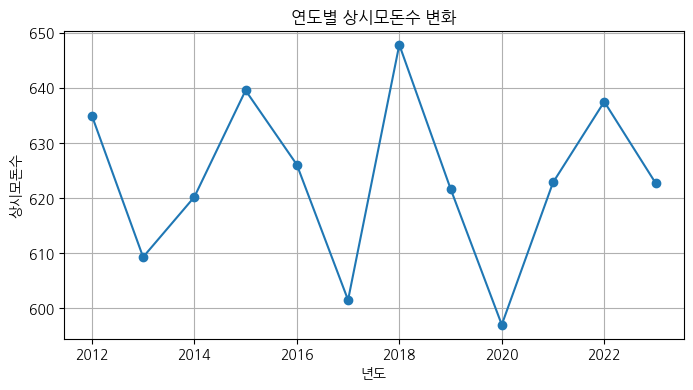

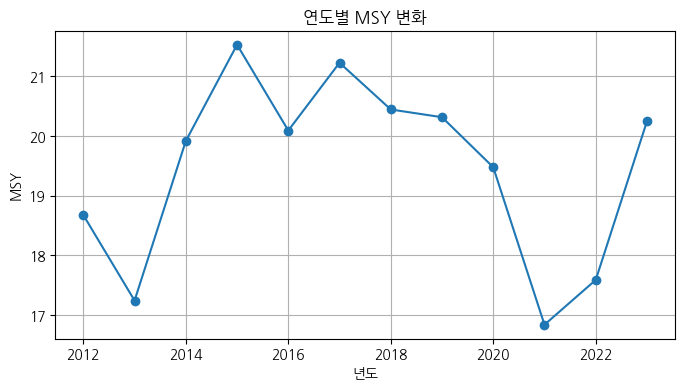

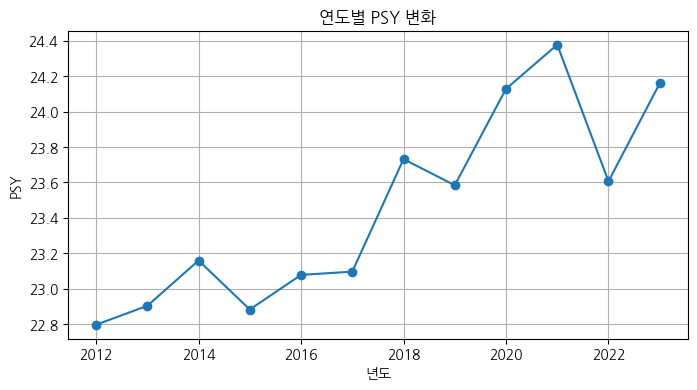

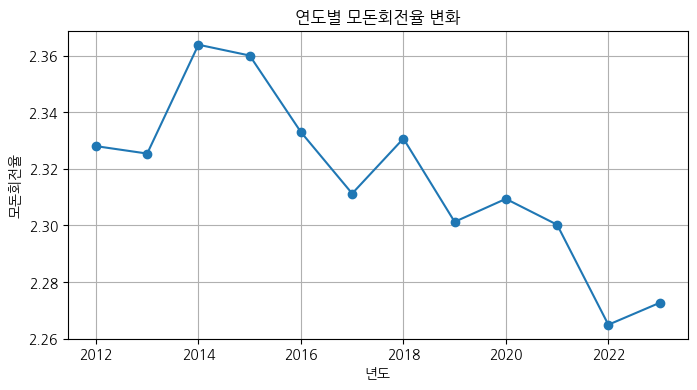

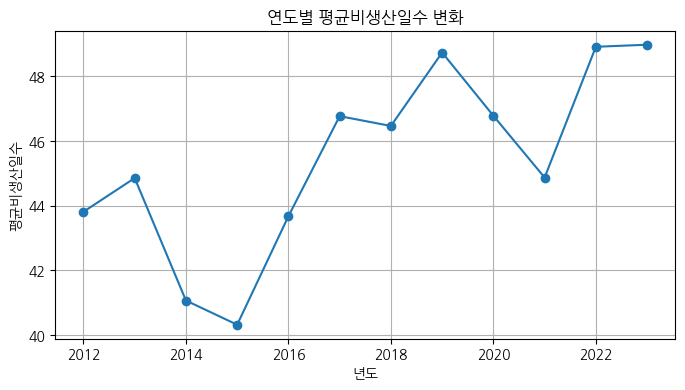

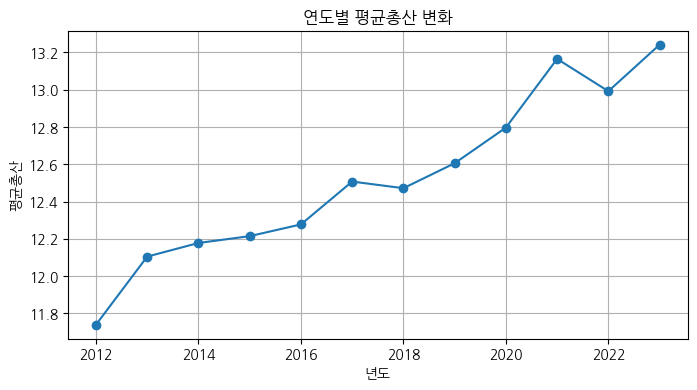

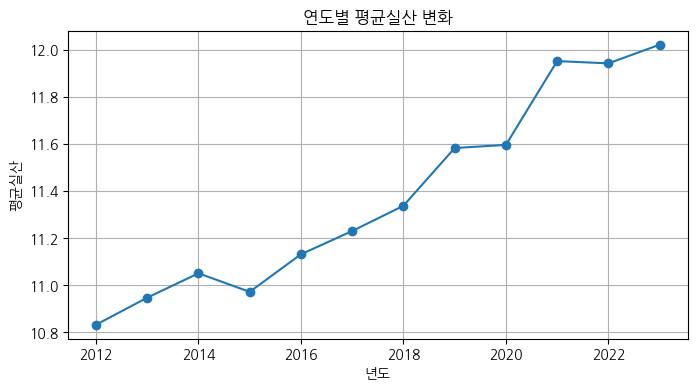

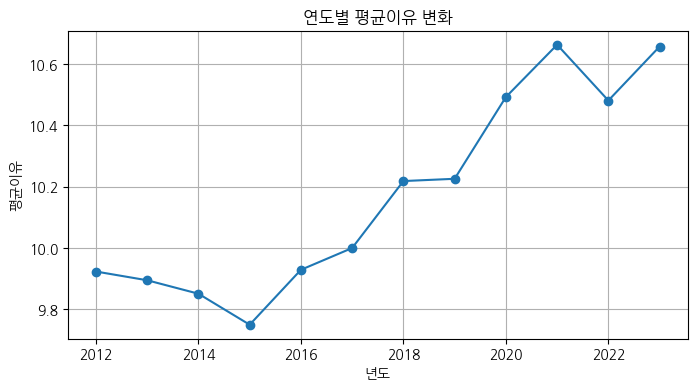

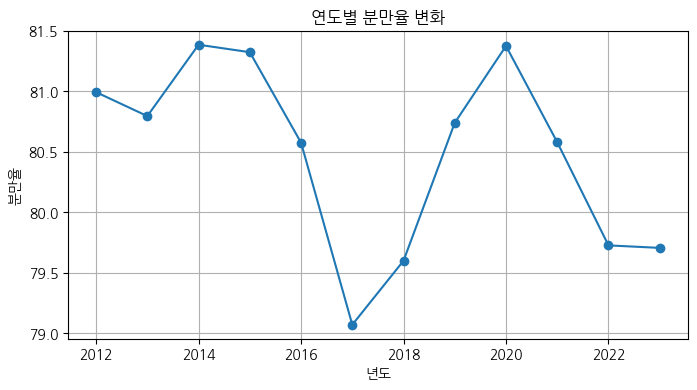

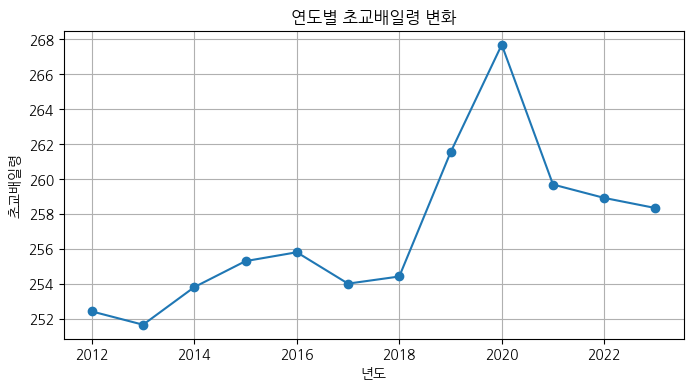

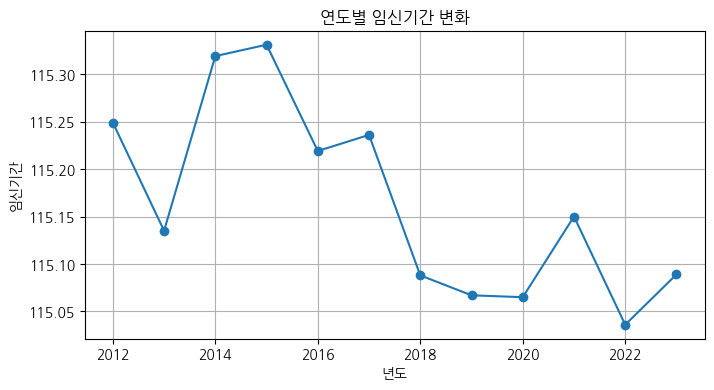

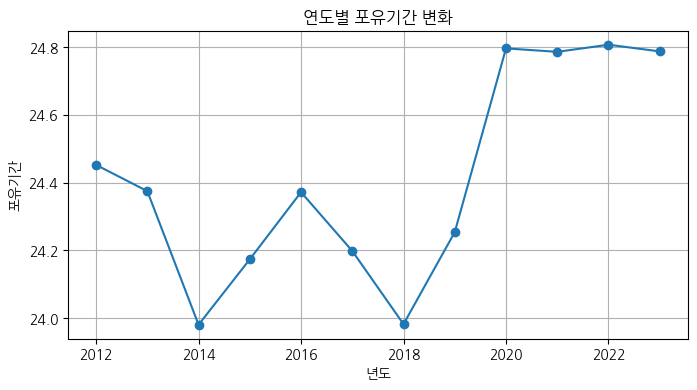

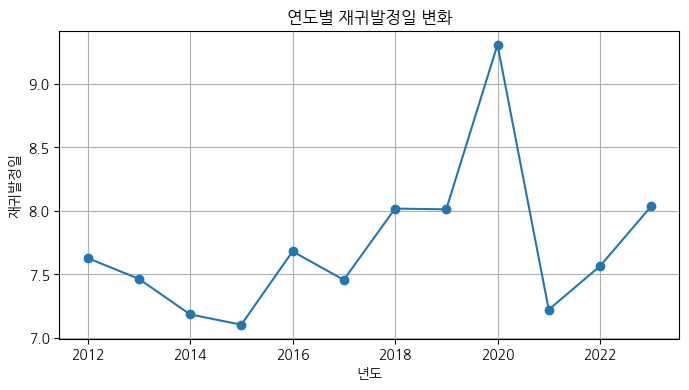

In [152]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

for col in prod:
    plt.figure(figsize=(8,4))
    plt.plot(df_yearly_mean['년도'], df_yearly_mean[col], marker='o')
    plt.title(f"연도별 {col} 변화")
    plt.xlabel("년도")
    plt.ylabel(col)
    plt.xlim()
    plt.grid()
    plt.show()



In [ ]:
df_yearly_mean = df_yearly_mean.rename(columns={
                        '평균비생산일수':'비생산일수',
                        '평균총산':'총산자수',
                        '평균실산':'실산자수',
                        '평균이유':'이유두수'    
                    })


KeyError: "['평균비생산일수', '평균총산', '평균실산', '평균이유'] not in index"

In [584]:
df_yearly_mean

id    년도    상시모돈수      MSY      PSY    모돈회전율    비생산일수     총산자수     실산자수  \
0    0  2012  634.972  18.6750  22.7953  2.32804  43.8106  11.7394  10.8310   
1    1  2013  609.313  17.2417  22.9022  2.32541  44.8531  12.1046  10.9459   
2    2  2014  620.213  19.9167  23.1582  2.36389  41.0665  12.1776  11.0496   
3    3  2015  639.538  21.5300  22.8813  2.36007  40.3189  12.2143  10.9707   
4    4  2016  626.074  20.0917  23.0769  2.33301  43.6730  12.2771  11.1305   
5    5  2017  601.524  21.2278  23.0953  2.31128  46.7671  12.5069  11.2292   
6    6  2018  647.825  20.4444  23.7310  2.33072  46.4641  12.4713  11.3367   
7    7  2019  621.710  20.3150  23.5836  2.30128  48.7342  12.6051  11.5820   
8    8  2020  597.045  19.4764  24.1283  2.30941  46.7796  12.7961  11.5954   
9    9  2021  622.840  16.8368  24.3777  2.30026  44.8684  13.1645  11.9517   
10  10  2022  637.492  17.5876  23.6059  2.26491  48.9120  12.9914  11.9419   
11  11  2023  622.765  20.2474  24.1593  2.27264  48.9756  13.2406  12.0212   

        이유두수      분만율    초교배일령     임신기간     포유기간    재귀발정일  
0    9.92354  80.9921  252.414  115.249  24.4521  7.62672  
1    9.89505  80.7940  251.653  115.135  24.3747  7.46347  
2    9.85119  81.3844  253.806  115.319  23.9802  7.18353  
3    9.75012  81.3225  255.295  115.331  24.1734  7.10223  
4    9.92917  80.5745  255.801  115.219  24.3716  7.67937  
5   10.00020  79.0684  254.005  115.236  24.1979  7.45515  
6   10.21850  79.5974  254.414  115.088  23.9819  8.01587  
7   10.22590  80.7386  261.513  115.067  24.2536  8.01030  
8   10.49240  81.3742  267.681  115.065  24.7962  9.30549  
9   10.66300  80.5778  259.679  115.150  24.7860  7.22107  
10  10.48110  79.7247  258.911  115.036  24.8070  7.56293  
11  10.65700  79.7039  258.332  115.089  24.7873  8.03433

In [587]:
prod = ["상시모돈수", "MSY", "PSY", "모돈회전율", "비생산일수", 
    "총산자수", "실산자수", "이유두수", "분만율", "초교배일령", "임신기간", "포유기간", "재귀발정일"]

corr_matrix = df_yearly_mean[prod].corr()
corr_matrix

상시모돈수       MSY       PSY     모돈회전율     비생산일수      총산자수      실산자수  \
상시모돈수  1.000000  0.053299 -0.122224  0.115819 -0.168221 -0.132189 -0.042426   
MSY    0.053299  1.000000 -0.235700  0.370427 -0.145771 -0.181439 -0.268326   
PSY   -0.122224 -0.235700  1.000000 -0.614986  0.566000  0.893128  0.892821   
모돈회전율  0.115819  0.370427 -0.614986  1.000000 -0.898532 -0.769867 -0.840625   
비생산일수 -0.168221 -0.145771  0.566000 -0.898532  1.000000  0.648164  0.719220   
총산자수  -0.132189 -0.181439  0.893128 -0.769867  0.648164  1.000000  0.974172   
실산자수  -0.042426 -0.268326  0.892821 -0.840625  0.719220  0.974172  1.000000   
이유두수  -0.095329 -0.368082  0.945427 -0.823291  0.717734  0.915723  0.952049   
분만율   -0.094318 -0.110248 -0.204598  0.562754 -0.628368 -0.418431 -0.397555   
초교배일령 -0.340311 -0.047218  0.732981 -0.472954  0.469733  0.648492  0.664202   
임신기간   0.077237  0.364241 -0.665927  0.798051 -0.887318 -0.637745 -0.716997   
포유기간  -0.229296 -0.565216  0.597405 -0.763689  0.489329  0.651065  0.694158   
재귀발정일 -0.372211  0.103148  0.486431 -0.325496  0.517915  0.283153  0.308735   

           이유두수       분만율     초교배일령      임신기간      포유기간     재귀발정일  
상시모돈수 -0.095329 -0.094318 -0.340311  0.077237 -0.229296 -0.372211  
MSY   -0.368082 -0.110248 -0.047218  0.364241 -0.565216  0.103148  
PSY    0.945427 -0.204598  0.732981 -0.665927  0.597405  0.486431  
모돈회전율 -0.823291  0.562754 -0.472954  0.798051 -0.763689 -0.325496  
비생산일수  0.717734 -0.628368  0.469733 -0.887318  0.489329  0.517915  
총산자수   0.915723 -0.418431  0.648492 -0.637745  0.651065  0.283153  
실산자수   0.952049 -0.397555  0.664202 -0.716997  0.694158  0.308735  
이유두수   1.000000 -0.333852  0.686575 -0.762828  0.763968  0.456304  
분만율   -0.333852  1.000000  0.167816  0.370025 -0.057436  0.057530  
초교배일령  0.686575  0.167816  1.000000 -0.581767  0.588681  0.731018  
임신기간  -0.762828  0.370025 -0.581767  1.000000 -0.547174 -0.616674  
포유기간   0.763968 -0.057436  0.588681 -0.547174  1.000000  0.364517  
재귀발정일  0.456304  0.057530  0.731018 -0.616674  0.364517  1.000000

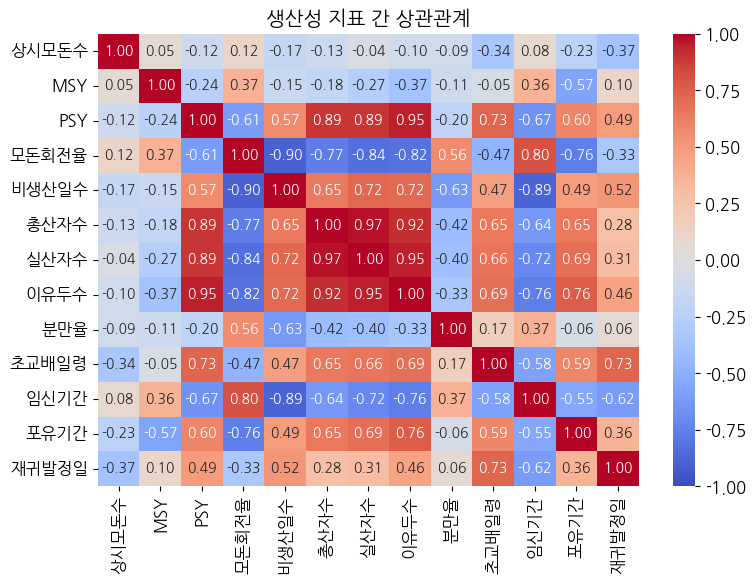

In [588]:
import seaborn as sns

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": 10})
plt.title("생산성 지표 간 상관관계")
plt.tight_layout()
plt.show()

## ASF 감염 통계 데이터 검토 (분석에 활용 가능한지 확인)

In [160]:
df_asf = pd.read_csv('../data/asf_status.csv')
df_asf.columns = ['번호','주소','발생일','감염돼지수']
df_asf = df_asf[['발생일','감염돼지수']]
df_asf

발생일      감염돼지수
0   ‘19.9.16.  돼지 2,369두
1   ‘19.9.17.  돼지 4,638두
2   ‘19.9.23.  돼지 2,119두
3   ‘19.9.23.  돼지 2,273두
4   ‘19.9.23.    돼지 388두
5   ‘19.9.25.    돼지 869두
6   ‘19.9.25.      돼지 2두
7   ‘19.9.26.  돼지 1,125두
8   ‘19.9.26.  돼지 2,123두
9   ‘19.10.1.  돼지 2,661두
10  ‘19.10.1.     돼지 19두
11  ‘19.10.2.  돼지 2,267두
12  ‘19.10.2.  돼지 2,916두
13  ‘19.10.9.  돼지 4,245두
14  ‘20.10.8.    돼지 726두
15  ‘20.10.9.  돼지 1,020두
16   ‘21.5.4.    돼지 385두
17   ‘21.8.7.  돼지 2,387두
18  ‘21.8.15.  돼지 1,801두
19  `21.8.25.  돼지 2,300두

In [161]:
df_asf['연도'] = df_asf['발생일'].str.slice(1, 3).astype(int) + 2000
df_asf

발생일      감염돼지수    연도
0   ‘19.9.16.  돼지 2,369두  2019
1   ‘19.9.17.  돼지 4,638두  2019
2   ‘19.9.23.  돼지 2,119두  2019
3   ‘19.9.23.  돼지 2,273두  2019
4   ‘19.9.23.    돼지 388두  2019
5   ‘19.9.25.    돼지 869두  2019
6   ‘19.9.25.      돼지 2두  2019
7   ‘19.9.26.  돼지 1,125두  2019
8   ‘19.9.26.  돼지 2,123두  2019
9   ‘19.10.1.  돼지 2,661두  2019
10  ‘19.10.1.     돼지 19두  2019
11  ‘19.10.2.  돼지 2,267두  2019
12  ‘19.10.2.  돼지 2,916두  2019
13  ‘19.10.9.  돼지 4,245두  2019
14  ‘20.10.8.    돼지 726두  2020
15  ‘20.10.9.  돼지 1,020두  2020
16   ‘21.5.4.    돼지 385두  2021
17   ‘21.8.7.  돼지 2,387두  2021
18  ‘21.8.15.  돼지 1,801두  2021
19  `21.8.25.  돼지 2,300두  2021

In [164]:
df_asf['감염돼지수'] = df_asf['감염돼지수'].str.extract(r'([\d,]+)')[0].str.replace(',', '').astype(int)
df_asf

발생일  감염돼지수    연도
0   ‘19.9.16.   2369  2019
1   ‘19.9.17.   4638  2019
2   ‘19.9.23.   2119  2019
3   ‘19.9.23.   2273  2019
4   ‘19.9.23.    388  2019
5   ‘19.9.25.    869  2019
6   ‘19.9.25.      2  2019
7   ‘19.9.26.   1125  2019
8   ‘19.9.26.   2123  2019
9   ‘19.10.1.   2661  2019
10  ‘19.10.1.     19  2019
11  ‘19.10.2.   2267  2019
12  ‘19.10.2.   2916  2019
13  ‘19.10.9.   4245  2019
14  ‘20.10.8.    726  2020
15  ‘20.10.9.   1020  2020
16   ‘21.5.4.    385  2021
17   ‘21.8.7.   2387  2021
18  ‘21.8.15.   1801  2021
19  `21.8.25.   2300  2021

In [162]:
df_asf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   발생일     20 non-null     object
 1   감염돼지수   20 non-null     object
 2   연도      20 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes


In [165]:
df_asf_filtered = pd.pivot_table(df_asf[['감염돼지수','연도']], index='연도', aggfunc='sum')
df_asf_filtered

감염돼지수
연도         
2019  28014
2020   1746
2021   6873

## 모돈회전율 2024년도 및 2025년도 예측

### Prophet 활용

In [371]:
df_rotation = df_yearly_mean[['년도','모돈회전율']]

In [372]:
# Prophet 형식으로 칼럼 이름 변경, 날짜 변환
df_rotation.rename(columns={'년도': 'ds', '모돈회전율': 'y'}, inplace=True)
df_rotation['ds'] = pd.to_datetime(df_rotation['ds'].astype(str) + '-01-01')
df_rotation

/tmp/ipykernel_16207/2162339358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rotation.rename(columns={'년도': 'ds', '모돈회전율': 'y'}, inplace=True)
/tmp/ipykernel_16207/2162339358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rotation['ds'] = pd.to_datetime(df_rotation['ds'].astype(str) + '-01-01')


ds        y
0  2012-01-01  2.32804
1  2013-01-01  2.32541
2  2014-01-01  2.36389
3  2015-01-01  2.36007
4  2016-01-01  2.33301
5  2017-01-01  2.31128
6  2018-01-01  2.33072
7  2019-01-01  2.30128
8  2020-01-01  2.30941
9  2021-01-01  2.30026
10 2022-01-01  2.26491
11 2023-01-01  2.27264

In [373]:
from prophet import Prophet

m = Prophet()
m.fit(df_rotation)

future = m.make_future_dataframe(periods=2, freq='Y')
forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

10:02:04 - cmdstanpy - INFO - Chain [1] start processing


10:02:04 - cmdstanpy - INFO - Chain [1] done processing
/home/jykim/venv/eda_venv/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


ds      yhat  yhat_lower  yhat_upper
9  2021-01-01  2.283044    2.271360    2.296097
10 2022-01-01  2.280083    2.267501    2.293470
11 2023-01-01  2.271376    2.257919    2.284084
12 2023-12-31  2.188266    2.174803    2.201449
13 2024-12-31  2.236760    2.222409    2.252277

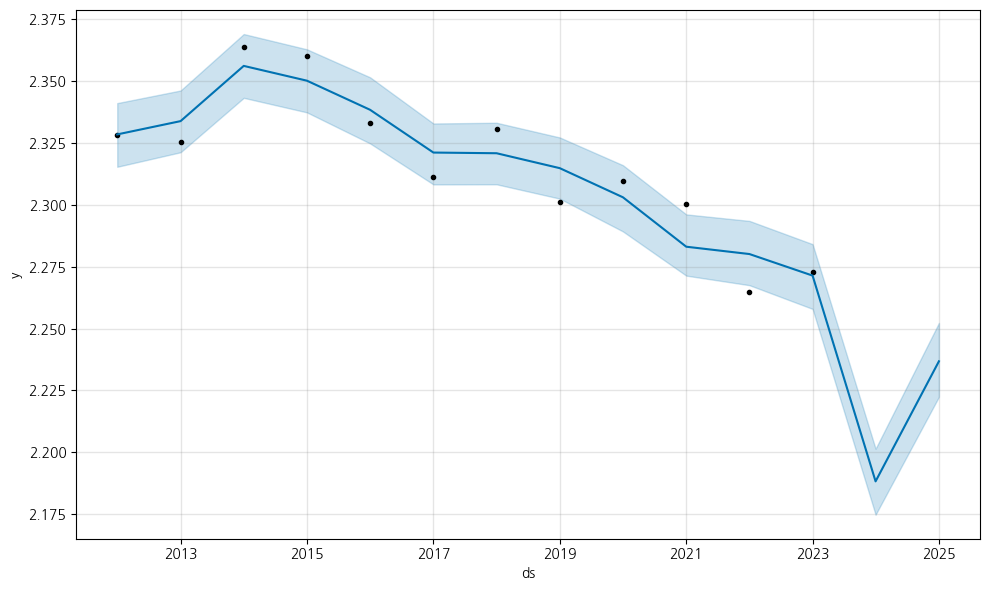

In [374]:
# 연도별 데이터로 예측한 결과
fig1 = m.plot(forecast)

In [383]:
forecast.loc[12, 'ds'] = forecast.loc[12, 'ds'] + pd.Timedelta(days=1)
forecast.loc[13, 'ds'] = forecast.loc[13, 'ds'] + pd.Timedelta(days=1)
forecast


ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2012-01-01 -0.134050    2.315325    2.341050    -0.134050    -0.134050   
1  2013-01-01 -0.120258    2.321193    2.346137    -0.120258    -0.120258   
2  2014-01-01 -0.106503    2.343177    2.368948    -0.106503    -0.106503   
3  2015-01-01 -0.115281    2.337303    2.362783    -0.115281    -0.115281   
4  2016-01-01 -0.124107    2.324763    2.351474    -0.124107    -0.124107   
5  2017-01-01 -0.132957    2.308206    2.332819    -0.132957    -0.132957   
6  2018-01-01 -0.141782    2.308248    2.333116    -0.141782    -0.141782   
7  2019-01-01 -0.150612    2.302467    2.327178    -0.150612    -0.150612   
8  2020-01-01 -0.159443    2.289225    2.315975    -0.159443    -0.159443   
9  2021-01-01 -0.170986    2.271360    2.296097    -0.170986    -0.170986   
10 2022-01-01 -0.182499    2.267501    2.293470    -0.182499    -0.182499   
11 2023-01-01 -0.194011    2.257919    2.284084    -0.194011    -0.194011   
12 2024-01-02 -0.205491    2.174803    2.201449    -0.207811    -0.203289   
13 2025-01-02 -0.217035    2.222409    2.252277    -0.224455    -0.209936   

    additive_terms  additive_terms_lower  additive_terms_upper    yearly  \
0         2.462453              2.462453              2.462453  2.462453   
1         2.454030              2.454030              2.454030  2.454030   
2         2.462581              2.462581              2.462581  2.462581   
3         2.465387              2.465387              2.465387  2.465387   
4         2.462453              2.462453              2.462453  2.462453   
5         2.454030              2.454030              2.454030  2.454030   
6         2.462581              2.462581              2.462581  2.462581   
7         2.465387              2.465387              2.465387  2.465387   
8         2.462453              2.462453              2.462453  2.462453   
9         2.454030              2.454030              2.454030  2.454030   
10        2.462581              2.462581              2.462581  2.462581   
11        2.465387              2.465387              2.465387  2.465387   
12        2.393758              2.393758              2.393758  2.393758   
13        2.453795              2.453795              2.453795  2.453795   

    yearly_lower  yearly_upper  multiplicative_terms  \
0       2.462453      2.462453                   0.0   
1       2.454030      2.454030                   0.0   
2       2.462581      2.462581                   0.0   
3       2.465387      2.465387                   0.0   
4       2.462453      2.462453                   0.0   
5       2.454030      2.454030                   0.0   
6       2.462581      2.462581                   0.0   
7       2.465387      2.465387                   0.0   
8       2.462453      2.462453                   0.0   
9       2.454030      2.454030                   0.0   
10      2.462581      2.462581                   0.0   
11      2.465387      2.465387                   0.0   
12      2.393758      2.393758                   0.0   
13      2.453795      2.453795                   0.0   

    multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                          0.0                         0.0  2.328403  
1                          0.0                         0.0  2.333773  
2                          0.0                         0.0  2.356078  
3                          0.0                         0.0  2.350106  
4                          0.0                         0.0  2.338347  
5                          0.0                         0.0  2.321074  
6                          0.0                         0.0  2.320799  
7                          0.0                         0.0  2.314775  
8                          0.0                         0.0  2.303011  
9                          0.0                         0.0  2.283044  
10                         0.0                         0.0  2.280083  
11                   

In [188]:
df_sow_turnover

id    년도        규모         농장  데이터구분    1월    2월    3월    4월  \
5          5.0  2016   100~200  PIGGO_156  모돈회전율  2.19  2.03  1.91  1.94   
18        18.0  2023  500~1000  PIGGO_182  모돈회전율   NaN  2.30   NaN   NaN   
28        28.0  2016   100~200  PIGGO_156  모돈회전율  2.19  2.03  1.91  1.94   
53        53.0  2021  500~1000    0021749  모돈회전율  2.37  2.34  2.18  2.47   
60        60.0  2021   400~500    0021437  모돈회전율  2.37  2.32  2.30  2.28   
...        ...   ...       ...        ...    ...   ...   ...   ...   ...   
15871  15871.0  2016  1000두 이상   PIGGO_23  모돈회전율  2.35  2.28  2.26  2.29   
15891  15891.0  2016   400~500  PIGGO_245  모돈회전율  2.39  2.40  2.44  2.38   
15910  15910.0  2016   300~400  PIGGO_196  모돈회전율  2.06  2.12  2.08  2.23   
15934  15934.0  2023   200~300  PIGGO_238  모돈회전율   NaN  2.55   NaN   NaN   
16016  16016.0  2023   200~300  PIGGO_198  모돈회전율   NaN   NaN   NaN  2.33   

         5월    6월    7월    8월    9월   10월   11월   12월  
5      2.16  2.31  2.30  2.40  2.42  2.38  2.44  2.87  
18      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
28     2.16  2.31  2.30  2.40  2.42  2.38  2.44  2.87  
53     2.74  2.51  2.69  2.69  2.79  2.61  2.29  2.33  
60     2.31  2.35  2.29  2.17  2.13  2.17  2.39  2.47  
...     ...   ...   ...   ...   ...   ...   ...   ...  
15871   NaN  2.30  2.30   NaN  2.33  2.43  2.44  2.60  
15891   NaN  2.31  2.39  2.42  2.36  2.35  2.40  2.67  
15910  2.28   NaN  2.18  2.04  2.04  2.12  2.25  2.54  
15934   NaN  2.47   NaN  2.36   NaN   NaN   NaN   NaN  
16016   NaN   NaN  2.41   NaN   NaN   NaN   NaN  2.62  

[505 rows x 17 columns]

In [210]:
month_cols = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

# melt: wide → long
df_sow_turnover_long = df_sow_turnover.melt(id_vars=['년도'], value_vars=month_cols, var_name='월', value_name='모돈회전율')
df_sow_turnover_long

# '1월' → 1로 매핑
month_map = {f'{i}월': i for i in range(1, 13)}
df_sow_turnover_long['월'] = df_sow_turnover_long['월'].map(month_map)

# 날짜형 생성
df_sow_turnover_long['날짜'] = pd.to_datetime(dict(year=df_sow_turnover_long['년도'], month=df_sow_turnover_long['월'], day=1))

# 정렬
df_sow_turnover_long = df_sow_turnover_long.sort_values('날짜').reset_index(drop=True)

df_sow_turnover_long


년도   월  모돈회전율         날짜
0     2014   1    NaN 2014-01-01
1     2014   1   2.56 2014-01-01
2     2014   1    NaN 2014-01-01
3     2014   1    NaN 2014-01-01
4     2014   1    NaN 2014-01-01
...    ...  ..    ...        ...
6055  2023  12   2.62 2023-12-01
6056  2023  12    NaN 2023-12-01
6057  2023  12   2.62 2023-12-01
6058  2023  12    NaN 2023-12-01
6059  2023  12   2.62 2023-12-01

[6060 rows x 4 columns]

In [232]:
df_rotation_long = pd.pivot_table(df_sow_turnover_long, index='날짜', values='모돈회전율', aggfunc='mean').reset_index()
df_rotation_long

날짜     모돈회전율
0  2014-01-01  2.471935
1  2014-02-01  2.291250
2  2014-03-01  2.380000
3  2014-04-01  2.222857
4  2014-05-01  2.236774
5  2014-06-01  2.331887
6  2014-07-01  2.220000
7  2014-08-01  2.320000
8  2014-09-01  2.240000
9  2014-10-01  2.160000
10 2014-11-01  2.386000
11 2014-12-01  2.698000
12 2016-01-01  2.301517
13 2016-02-01  2.282247
14 2016-03-01  2.286685
15 2016-04-01  2.341746
16 2016-05-01  2.318125
17 2016-06-01  2.300738
18 2016-07-01  2.290621
19 2016-08-01  2.268571
20 2016-09-01  2.256042
21 2016-10-01  2.258118
22 2016-11-01  2.320647
23 2016-12-01  2.604412
24 2020-01-01  2.271053
25 2020-02-01  2.276053
26 2020-03-01  2.285000
27 2020-04-01  2.312632
28 2020-05-01  2.304211
29 2020-06-01  2.223158
30 2020-07-01  2.210000
31 2020-08-01  2.198158
32 2020-09-01  2.234737
33 2020-10-01  2.204737
34 2020-11-01  2.222368
35 2020-12-01  2.270526
36 2021-01-01  2.325146
37 2021-02-01  2.294854
38 2021-03-01  2.334951
39 2021-04-01  2.352136
40 2021-05-01  2.353010
41 2021-06-01  2.323763
42 2021-07-01  2.305806
43 2021-08-01  2.283978
44 2021-09-01  2.303118
45 2021-10-01  2.323978
46 2021-11-01  2.355376
47 2021-12-01  2.452151
48 2023-02-01  2.458696
49 2023-03-01  2.260526
50 2023-04-01  2.285882
51 2023-05-01  2.222500
52 2023-06-01  2.394286
53 2023-07-01  2.210000
54 2023-08-01  2.360000
55 2023-09-01  2.197826
56 2023-10-01  2.384000
57 2023-11-01  2.421818
58 2023-12-01  2.506279

In [238]:
# Prophet 형식으로 칼럼 이름 변경 변환
df_rotation_long.rename(columns={'날짜': 'ds', '모돈회전율': 'y'}, inplace=True)
df_rotation_long = df_rotation_long.drop(index=[11,23,47,48,58])


In [242]:
df_rotation.to_csv('rotation.csv')

In [240]:
from prophet import Prophet

m = Prophet()
m.fit(df_rotation_long)

future = m.make_future_dataframe(periods=24, freq='MS')
forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

17:55:52 - cmdstanpy - INFO - Chain [1] start processing


17:55:52 - cmdstanpy - INFO - Chain [1] done processing


ds      yhat  yhat_lower  yhat_upper
73 2025-07-01  2.291479    2.235318    2.348616
74 2025-08-01  2.320449    2.267310    2.372954
75 2025-09-01  2.293221    2.242422    2.345899
76 2025-10-01  2.303993    2.254539    2.352996
77 2025-11-01  2.375047    2.319811    2.426777

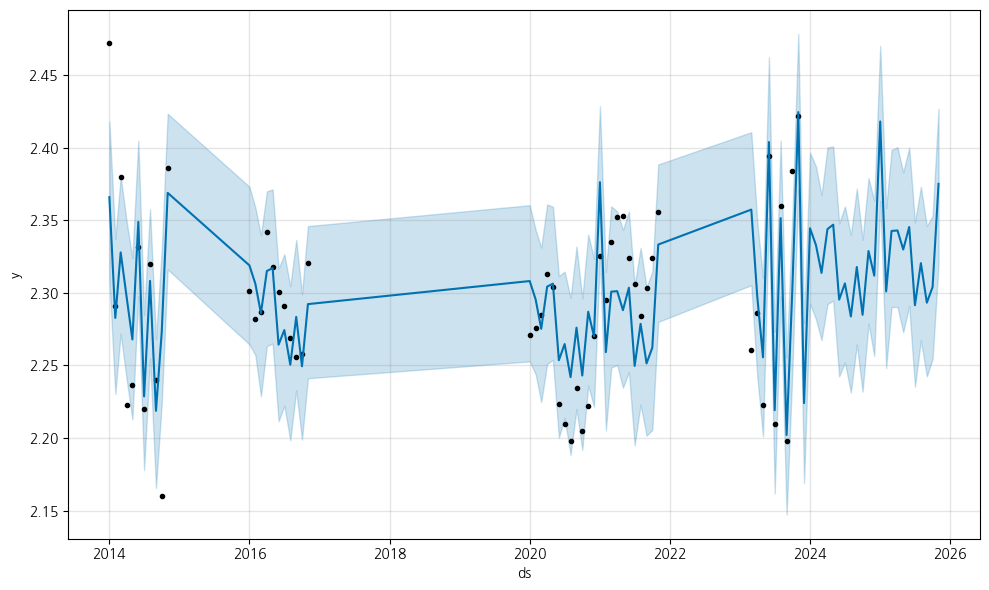

In [244]:
# 월별 데이터로 예측한 결과
fig2 = m.plot(forecast)

In [245]:
df_rotation

ds        y
0  2012-01-01  2.32804
1  2013-01-01  2.32541
2  2014-01-01  2.36389
3  2015-01-01  2.36007
4  2016-01-01  2.33301
5  2017-01-01  2.31128
6  2018-01-01  2.33072
7  2019-01-01  2.30128
8  2020-01-01  2.30941
9  2021-01-01  2.30026
10 2022-01-01  2.26491
11 2023-01-01  2.27264

### ARIMA 활용

/home/jykim/venv/eda_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/jykim/venv/eda_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/home/jykim/venv/eda_venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


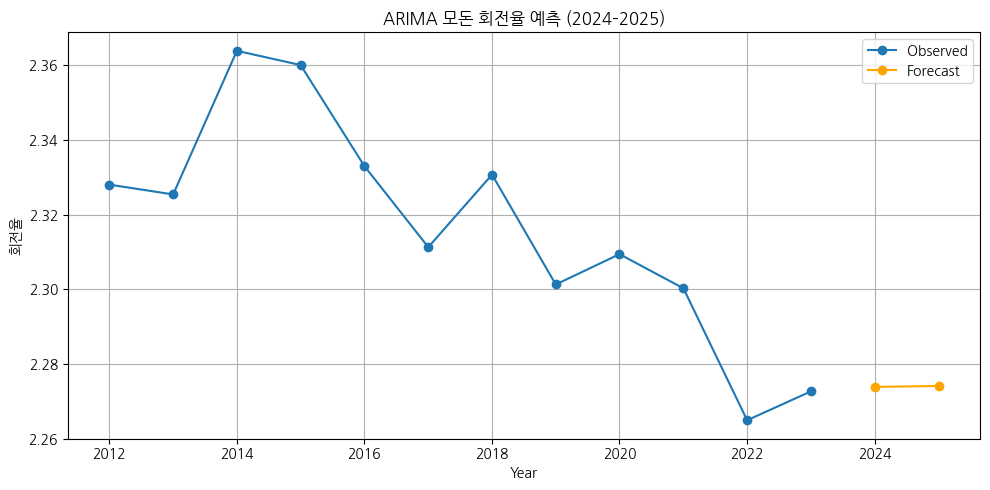

연도    예측 회전율
0 2024-01-01  2.273846
1 2025-01-01  2.274093

In [249]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

df_arima = df_rotation.set_index('ds')

# ARIMA 모델 설정 및 학습 (p=1, d=1, q=1)
model = ARIMA(df_arima['y'], order=(1, 1, 1))
model_fit = model.fit()

# 향후 2년 예측 (연 단위 = 2년 = 2 steps)
forecast_steps = 2
forecast = model_fit.forecast(steps=forecast_steps)

# 예측 인덱스 생성
forecast_index = pd.date_range(start=df_arima.index[-1] + pd.DateOffset(years=1), periods=forecast_steps, freq='YS')
forecast_series = pd.Series(forecast, index=forecast_index)

# 시각화
plt.figure(figsize=(10, 5))
plt.plot(df_arima.index, df_arima['y'], label='Observed', marker='o')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='orange', marker='o')
plt.title('ARIMA 모돈 회전율 예측 (2024–2025)')
plt.xlabel('Year')
plt.ylabel('회전율')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 예측 결과표 준비
df_forecast = forecast_series.reset_index()
df_forecast.columns = ['연도', '예측 회전율']
df_forecast


In [253]:
df_rotation.columns = ['연도', '모돈회전율']
df_forecast.columns = ['연도', '모돈회전율']
df_rotation_new = pd.concat([df_rotation, df_forecast], ignore_index=True)
df_rotation_new

연도     모돈회전율
0  2012-01-01  2.328040
1  2013-01-01  2.325410
2  2014-01-01  2.363890
3  2015-01-01  2.360070
4  2016-01-01  2.333010
5  2017-01-01  2.311280
6  2018-01-01  2.330720
7  2019-01-01  2.301280
8  2020-01-01  2.309410
9  2021-01-01  2.300260
10 2022-01-01  2.264910
11 2023-01-01  2.272640
12 2024-01-01  2.273846
13 2025-01-01  2.274093

In [274]:
df_rotation_new['연도'].dtype

dtype('<M8[ns]')

In [275]:
df_rotation_new['연도'] = df_rotation_new['연도'].dt.year
df_rotation_new

연도     모돈회전율
0   2012  2.328040
1   2013  2.325410
2   2014  2.363890
3   2015  2.360070
4   2016  2.333010
5   2017  2.311280
6   2018  2.330720
7   2019  2.301280
8   2020  2.309410
9   2021  2.300260
10  2022  2.264910
11  2023  2.272640
12  2024  2.273846
13  2025  2.274093

In [350]:
sql = '''
create table predicted_sow_turnover
(
    id int not null primary key,
    year int,
    sow_turnover float    
)
'''
cursor.execute(sql)

In [351]:
sql = '''
insert into predicted_sow_turnover
values (%s, %s, %s)
'''

for i, row in df_rotation_new.iterrows():
    value = (i,) + tuple(row)
    cursor.execute(sql, value)
    print(tuple(row))
    conn.commit()

print('table에 데이터 삽입 완료')


(2012.0, 2.32804)
(2013.0, 2.32541)
(2014.0, 2.36389)
(2015.0, 2.36007)
(2016.0, 2.33301)
(2017.0, 2.31128)
(2018.0, 2.33072)
(2019.0, 2.30128)
(2020.0, 2.30941)
(2021.0, 2.30026)
(2022.0, 2.26491)
(2023.0, 2.27264)
(2024.0, 2.273846262622151)
(2025.0, 2.2740931643835416)
table에 데이터 삽입 완료


/tmp/ipykernel_16207/2670205471.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


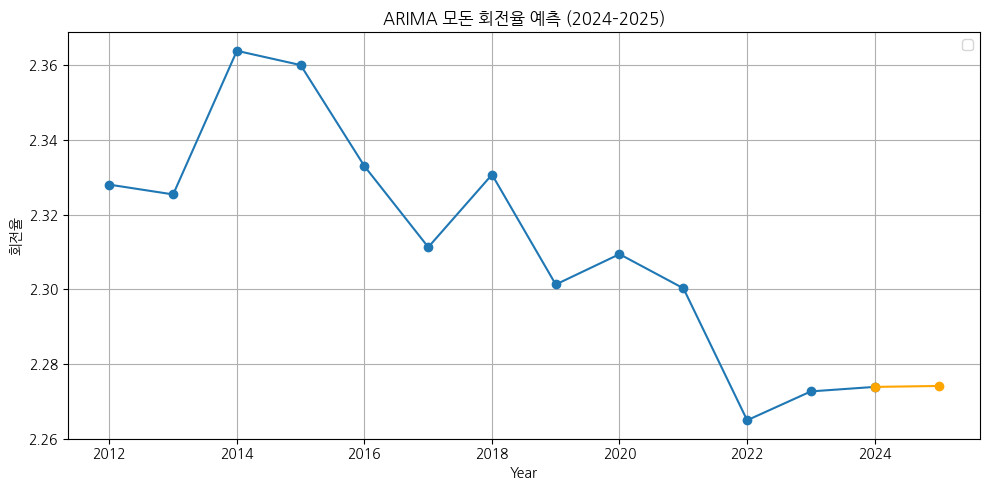

In [259]:
plt.figure(figsize=(10, 5))
plt.plot(df_rotation_new['연도'][:-1], df_rotation_new['모돈회전율'][:-1], marker='o')
plt.plot(df_rotation_new['연도'][-2:], df_rotation_new['모돈회전율'][-2:], color='Orange', marker='o')
plt.title('ARIMA 모돈 회전율 예측 (2024–2025)')
plt.xlabel('Year')
plt.ylabel('회전율')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

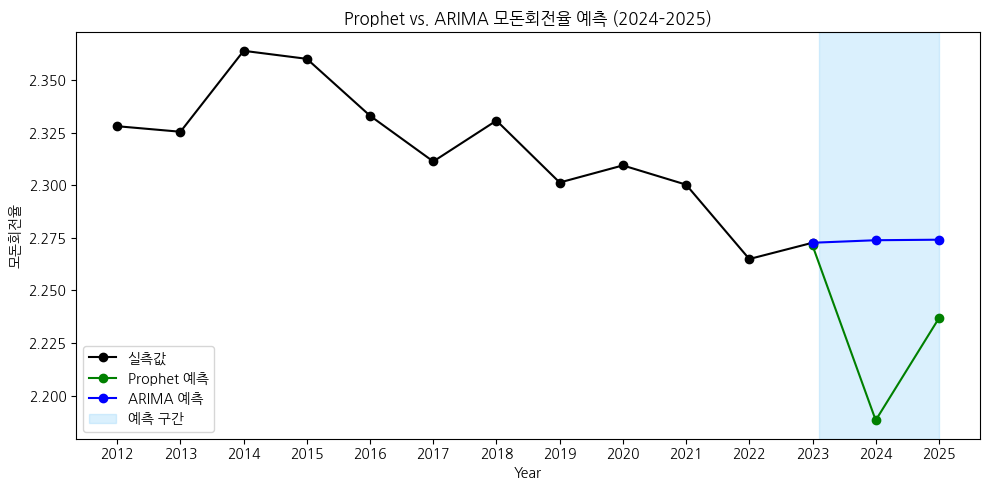

In [409]:
plt.figure(figsize=(10, 5))
plt.plot(df_rotation_new['연도'][:-2], df_rotation_new['모돈회전율'][:-2], color='Black', marker='o', label='실측값')
plt.plot(forecast['ds'][-3:].dt.year, forecast['yhat'][-3:], color='Green', marker='o', label='Prophet 예측')
plt.plot(df_rotation_new['연도'][-3:], df_rotation_new['모돈회전율'][-3:], color='Blue', marker='o', label='ARIMA 예측')
plt.axvspan(2023.1, 2025, color='lightskyblue', alpha=0.3, label='예측 구간')

plt.title('Prophet vs. ARIMA 모돈회전율 예측 (2024–2025)')
plt.xlabel('Year')
plt.ylabel('모돈회전율')
plt.xticks(df_rotation_new['연도'].unique())
plt.legend()
plt.tight_layout()
plt.show()


### PSY 계산

In [261]:
import mysql.connector

conn = mysql.connector.connect(
    host = 'database-1.cba44miw26by.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'kjy',
    password = '0000',
    database = 'pig'
)

cursor = conn.cursor(buffered=True)

In [279]:
import pandas as pd

cols_avg_iyu = ['연도', '이유두수']

cursor.execute('select year, avg_yhat from avg_iyu')
result = cursor.fetchall()
df_iyu_predicted = pd.DataFrame(result)
df_iyu_predicted.columns = cols_avg_iyu
df_iyu_predicted


연도      이유두수
0   2012   8.75310
1   2013   9.12292
2   2014   9.49627
3   2015   9.86592
4   2016  10.24970
5   2017  10.38340
6   2018  10.36540
7   2019  10.32120
8   2020  10.49630
9   2021  10.85600
10  2022  11.12220
11  2023  11.38690
12  2024  11.65160
13  2025  11.91750

In [276]:
df_rotation_new

연도     모돈회전율
0   2012  2.328040
1   2013  2.325410
2   2014  2.363890
3   2015  2.360070
4   2016  2.333010
5   2017  2.311280
6   2018  2.330720
7   2019  2.301280
8   2020  2.309410
9   2021  2.300260
10  2022  2.264910
11  2023  2.272640
12  2024  2.273846
13  2025  2.274093

In [283]:
df_new = pd.merge(df_iyu_predicted, df_rotation_new, on='연도', how='outer')
df_new

연도      이유두수     모돈회전율
0   2012   8.75310  2.328040
1   2013   9.12292  2.325410
2   2014   9.49627  2.363890
3   2015   9.86592  2.360070
4   2016  10.24970  2.333010
5   2017  10.38340  2.311280
6   2018  10.36540  2.330720
7   2019  10.32120  2.301280
8   2020  10.49630  2.309410
9   2021  10.85600  2.300260
10  2022  11.12220  2.264910
11  2023  11.38690  2.272640
12  2024  11.65160  2.273846
13  2025  11.91750  2.274093

In [285]:
modon_num = 100

df_new['PSY'] = df_new['이유두수'] * df_new['모돈회전율']
df_new

연도      이유두수     모돈회전율        PSY
0   2012   8.75310  2.328040  20.377567
1   2013   9.12292  2.325410  21.214529
2   2014   9.49627  2.363890  22.448138
3   2015   9.86592  2.360070  23.284262
4   2016  10.24970  2.333010  23.912653
5   2017  10.38340  2.311280  23.998945
6   2018  10.36540  2.330720  24.158845
7   2019  10.32120  2.301280  23.751971
8   2020  10.49630  2.309410  24.240260
9   2021  10.85600  2.300260  24.971623
10  2022  11.12220  2.264910  25.190782
11  2023  11.38690  2.272640  25.878324
12  2024  11.65160  2.273846  26.493947
13  2025  11.91750  2.274093  27.101505

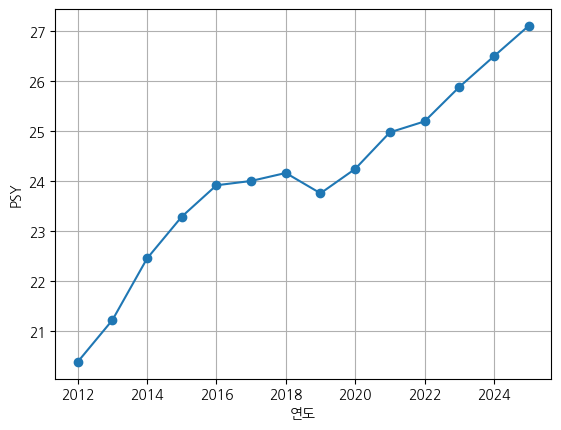

In [290]:
plt.plot(df_new['연도'], df_new['PSY'], marker='o')
plt.xlabel('연도')
plt.ylabel('PSY')
plt.grid()
plt.show()

## MSY 값 추정

#### PSY로 MSY 추정 가능한지 분석

In [295]:
cols_msypsy = ['연도', 'MSY', 'PSY']

cursor.execute('''select year, msy, psy from pig_db_yearly where msy is not null and psy is not null''')
result = cursor.fetchall()
df_msypsy = pd.DataFrame(result)
df_msypsy.columns = cols_msypsy
df_msypsy

연도   MSY   PSY
0    2019  17.2  19.7
1    2021  16.2  24.9
2    2018  19.2  21.7
3    2017  23.3  23.3
4    2016  16.8  25.2
..    ...   ...   ...
196  2012  20.2  24.3
197  2012  20.4  22.3
198  2013  20.0  21.5
199  2013  15.4  24.8
200  2013  19.7  25.2

[201 rows x 3 columns]

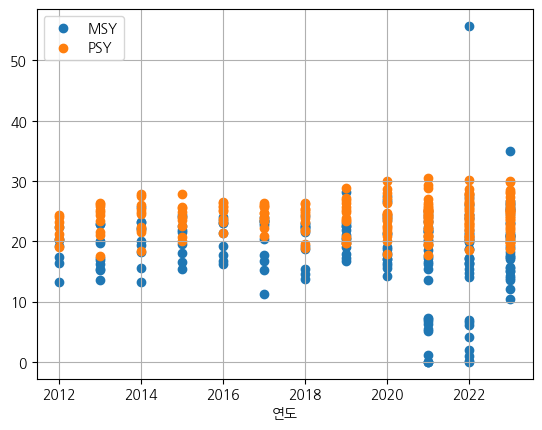

In [306]:
plt.scatter(df_msypsy['연도'], df_msypsy['MSY'], marker='o', label='MSY')
plt.scatter(df_msypsy['연도'], df_msypsy['PSY'], marker='o', label='PSY')
plt.xlabel('연도')
plt.legend()
plt.grid()
plt.show()

In [301]:
cor_value = df_msypsy['MSY'].corr(df_msypsy['PSY'])
print(f"상관계수: {cor_value:.4f}")

상관계수: 0.4881


### 다중회귀분석으로 목표변수(MSY) 추정

- 종속 변수 (Y): MSY
- 독립 변수 (X들): 상시모돈수, PSY, 모돈회전율, 평균비산일수, 평균총산, 평균실산, … 등등

In [317]:
import pandas as pd

cols_yearly = ["ID", "년도", "규모", "농장", "상시모돈수", "MSY", "PSY", "모돈회전율", "평균비생산일수", 
    "평균총산", "평균실산", "평균이유", "분만율", "초교배일령", "임신기간", "포유기간", "재귀발정일"]

cursor.execute('''select * from pig_db_yearly where msy is not null and psy is not null''')
result = cursor.fetchall()
df_yearly = pd.DataFrame(result)
df_yearly.columns = cols_yearly
df_yearly.head()


ID    년도        규모         농장  상시모돈수   MSY   PSY  모돈회전율  평균비생산일수  평균총산  \
0   0  2019   100~200  PIGGO_156    144  17.2  19.7   2.13       75    13   
1   1  2021  500~1000  PIGGO_182    523  16.2  24.9   2.28       46    14   
2   2  2018   100~200  PIGGO_156    146  19.2  21.7   2.18       69    13   
3  25  2017   100~200  PIGGO_156    123  23.3  23.3   2.27       59    13   
4  26  2016   100~200  PIGGO_156    109  16.8  25.2   2.28       63    14   

   평균실산  평균이유   분만율  초교배일령  임신기간  포유기간  재귀발정일  
0    11     9  65.4    257   116    20      8  
1    12    11  82.4    261   115    27      8  
2    12    10  76.3    263   116    20     13  
3    12    10  78.0    242   115    20     10  
4    12    11  79.0    247   115    19     10

In [318]:
df_new = df_yearly.drop(columns=['ID','년도','규모','농장'])
df_new


상시모돈수   MSY   PSY  모돈회전율  평균비생산일수  평균총산  평균실산  평균이유   분만율  초교배일령  임신기간  \
0      144  17.2  19.7   2.13       75    13    11     9  65.4    257   116   
1      523  16.2  24.9   2.28       46    14    12    11  82.4    261   115   
2      146  19.2  21.7   2.18       69    13    12    10  76.3    263   116   
3      123  23.3  23.3   2.27       59    13    12    10  78.0    242   115   
4      109  16.8  25.2   2.28       63    14    12    11  79.0    247   115   
..     ...   ...   ...    ...      ...   ...   ...   ...   ...    ...   ...   
196    222  20.2  24.3   2.41       37    12    11    10  87.8    231   114   
197    922  20.4  22.3   2.30       40    11    11    10  82.0    274   115   
198    365  20.0  21.5   2.36       37    12    11     9  83.2    268   116   
199    245  15.4  24.8   2.40       34    12    11    10  80.7    280   116   
200    683  19.7  25.2   2.50       26    13    11    10  89.2    260   115   

     포유기간  재귀발정일  
0      20      8  
1      27      8  
2      20     13  
3      20     10  
4      19     10  
..    ...    ...  
196    22      7  
197    27      8  
198    25      8  
199    24      6  
200    23      6  

[201 rows x 13 columns]

In [308]:
import statsmodels.api as sm

In [326]:
x = df_new.drop(columns='MSY')
y = df_new['MSY']

In [328]:
# 상수항 추가
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    MSY   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     8.727
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           3.87e-13
Time:                        20:54:12   Log-Likelihood:                -619.51
No. Observations:                 201   AIC:                             1265.
Df Residuals:                     188   BIC:                             1308.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.7832     88.050      0.247      0.8

In [330]:
from io import StringIO
import pandas as pd
from IPython.display import display


# 계수 테이블
table_coef_html = model.summary().tables[1].as_html()
df_coef = pd.read_html(StringIO(table_coef_html), header=0, index_col=0)[0]

# 전체 모델 성능 테이블
table_model_info_html = model.summary().tables[0].as_html()
df_model_info = pd.read_html(StringIO(table_model_info_html), header=None)[0]
df_model_info = pd.read_html(table_model_info, header=None)[0]

# 출력
print("[전체 모델 성능 요약]")
display(df_model_info)

print("[회귀계수 요약]")
display(df_coef)

[전체 모델 성능 요약]


/tmp/ipykernel_16207/2746004468.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_model_info = pd.read_html(table_model_info, header=None)[0]


0                 1                    2             3
0     Dep. Variable:               MSY           R-squared:  3.580000e-01
1             Model:               OLS      Adj. R-squared:  3.170000e-01
2            Method:     Least Squares         F-statistic:  8.727000e+00
3              Date:  Wed, 26 Mar 2025  Prob (F-statistic):  3.870000e-13
4              Time:          20:55:17      Log-Likelihood: -6.195100e+02
5  No. Observations:               201                 AIC:  1.265000e+03
6      Df Residuals:               188                 BIC:  1.308000e+03
7          Df Model:                12                  NaN           NaN
8   Covariance Type:         nonrobust                  NaN           NaN

[회귀계수 요약]


coef  std err      t  P>|t|   [0.025   0.975]
const    21.7832   88.050  0.247  0.805 -151.911  195.477
상시모돈수    -0.0034    0.001 -3.895  0.000   -0.005   -0.002
PSY       1.7360    0.732  2.370  0.019    0.291    3.181
모돈회전율    -3.3066   15.035 -0.220  0.826  -32.967   26.353
평균비생산일수   0.0148    0.107  0.138  0.890   -0.196    0.226
평균총산     -0.4598    0.572 -0.804  0.422   -1.588    0.668
평균실산      0.3377    0.883  0.383  0.702   -1.403    2.079
평균이유     -0.8949    1.441 -0.621  0.535   -3.738    1.948
분만율       0.0632    0.100  0.635  0.526   -0.133    0.260
초교배일령    -0.0073    0.013 -0.556  0.579   -0.033    0.019
임신기간     -0.3834    0.556 -0.689  0.492   -1.481    0.714
포유기간      0.3614    0.271  1.334  0.184   -0.173    0.896
재귀발정일     1.0705    0.372  2.876  0.004    0.336    1.805

- R^2=0.358 -> 전체 설명력 약 36%(보통)
- F-stat p-value = 0.0000.... -> 전체 모델은 통계적으로 유의함 

In [336]:
x2 = df_new[['PSY','상시모돈수']]
y2 = df_new['MSY']

In [337]:
# 상수항 추가
x2 = sm.add_constant(x2)

model2 = sm.OLS(y2, x2).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    MSY   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     42.97
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           3.16e-16
Time:                        20:59:59   Log-Likelihood:                -627.78
No. Observations:                 201   AIC:                             1262.
Df Residuals:                     198   BIC:                             1271.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.2487      3.471     -2.953      0.0

#### MSY를 PSY와 상시모돈수로 설명하는 다중선형회귀 모델
- $ MSY = -10.2487 + 1.2902*PSY - 0.0035*상시모돈수 $

In [343]:
cols_new2 = ['MSY', 'PSY', '상시모돈수']

cursor.execute('''select msy, psy, sow_inventory from pig_db_yearly where msy is not null and psy is not null''')
result = cursor.fetchall()
df_new2 = pd.DataFrame(result)
df_new2.columns = cols_new2
df_new2

MSY   PSY  상시모돈수
0    17.2  19.7    144
1    16.2  24.9    523
2    19.2  21.7    146
3    23.3  23.3    123
4    16.8  25.2    109
..    ...   ...    ...
196  20.2  24.3    222
197  20.4  22.3    922
198  20.0  21.5    365
199  15.4  24.8    245
200  19.7  25.2    683

[201 rows x 3 columns]

In [354]:
df_new.to_csv('df_new.csv')

In [344]:
df_new2['MSY_예측'] = -10.2487 + 1.2902*df_new2['PSY'] - 0.0035*df_new2['상시모돈수']
df_new2

MSY   PSY  상시모돈수    MSY_예측
0    17.2  19.7    144  14.66424
1    16.2  24.9    523  20.04678
2    19.2  21.7    146  17.23764
3    23.3  23.3    123  19.38246
4    16.8  25.2    109  21.88284
..    ...   ...    ...       ...
196  20.2  24.3    222  20.32616
197  20.4  22.3    922  15.29576
198  20.0  21.5    365  16.21310
199  15.4  24.8    245  20.89076
200  19.7  25.2    683  19.87384

[201 rows x 4 columns]

In [345]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(df_new2['MSY'], df_new2['MSY_예측'])
r2 = r2_score(df_new2['MSY'], df_new2['MSY_예측'])

print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")


MSE: 30.2278
R²: 0.3027


- 추정 성능이 낮음..

### 생산성과 날씨(기온)의 관계 분석

In [414]:
import pandas as pd

df_yearly_new = pd.read_excel('../data/pig_monthly.xlsx', header=1)
df_yearly_new.head()

/home/jykim/venv/eda_venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


년도   지역       규모         농장      데이터구분    1월    2월    3월    4월    5월  \
0  2020  NaN  100~200  PIGGO_156        분만율  81.3  81.1  73.9  76.6  80.6   
1  2019  NaN  100~200  PIGGO_156       평균이유   9.0   8.5   9.9   9.0   9.1   
2  2018  NaN  100~200  PIGGO_156  임신사고(불규칙)   0.0   0.0   2.0   3.0   1.0   
3  2017  NaN  100~200  PIGGO_156     7일내재귀율  87.0  83.3  87.5  78.9  78.9   
4  2017  NaN  100~200  PIGGO_156   임신사고(도태)   NaN   NaN   NaN   NaN   NaN   

     6월    7월    8월    9월   10월   11월   12월  
0  68.6  79.4  77.4  75.9  79.4  72.2  75.0  
1   9.0   9.1   9.7   8.6   9.0   9.5  10.1  
2   1.0   2.0   3.0   4.0   2.0   4.0   2.0  
3  90.0   NaN   NaN   NaN   NaN   NaN   NaN  
4   NaN   0.0   0.0   0.0   0.0   0.0   0.0

In [415]:
df_cleaned = df_yearly_new.dropna(subset=['지역'])
df_cleaned

년도       지역       규모       농장     데이터구분      1월      2월      3월  \
75    2021     경상남도  200~300  0021398      평균이유   11.40   10.90   10.80   
76    2021     경상남도  200~300  0021398      총산합계  646.00  743.00  811.00   
77    2021     경상남도  200~300  0021398      평균총산   14.00   14.00   15.00   
78    2021     경상남도  200~300  0021398      사산합계   52.00   71.00   60.00   
79    2021     경상남도  200~300  0021398    7일내재귀율   77.80   91.50   91.50   
...    ...      ...      ...      ...       ...     ...     ...     ...   
2658  2020  제주특별자치도  100두 미만  0021283  임신사고(조기)    0.00    1.00    2.00   
2659  2020  제주특별자치도  100두 미만  0021283      미라합계    0.00    0.00    0.00   
2660  2020  제주특별자치도  100두 미만  0021283     모돈회전율    2.02    1.97    1.98   
2661  2020  제주특별자치도  100두 미만  0021283      평균실산   12.10   11.20   11.90   
2662  2020  제주특별자치도  100두 미만  0021283       분만율   84.80   86.70   96.20   

          4월      5월      6월      7월      8월      9월     10월     11월     12월  
75     11.50   11.10   12.00   11.30   10.60   11.90   11.70   12.40   12.10  
76    543.00  591.00  728.00  756.00  691.00  786.00  777.00  766.00  899.00  
77     13.90   14.40   13.70   14.50   14.40   14.60   14.10   13.90   15.00  
78     42.00   30.00   39.00   72.00   61.00   50.00   53.00   47.00   68.00  
79     97.70   92.70   95.90  100.00  100.00  100.00  100.00   91.10   97.50  
...      ...     ...     ...     ...     ...     ...     ...     ...     ...  
2658    1.00    1.00    1.00    0.00    0.00    1.00    1.00    0.00    3.00  
2659    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00  
2660    1.98    2.03    1.95    1.89    1.89    1.85    1.93    1.88    1.91  
2661   12.60   12.00   12.60   11.50   11.60   12.40   11.20   10.30   10.00  
2662   89.30   88.00   73.90   83.80   86.50   75.90   67.60   69.00   52.90  

[1428 rows x 17 columns]

In [441]:
df_cleaned['지역'].unique()

array(['경상남도', '경기도', '제주특별자치도', '전라남도', '경상북도', '충청남도', '충청북도'],
      dtype=object)

In [491]:
df_cleaned['데이터구분'].unique()

array(['평균이유', '총산합계', '평균총산', '사산합계', '7일내재귀율', '임신사고(도태)', '임신사고(유산)',
       '임신사고(불임)', '임신사고(공태)', '임신사고(지연)', '임신사고(2차)', '임신사고(불규칙)',
       '임신사고(1차)', '임신사고(폐사)', '임신사고(조기)', '미라합계', '모돈회전율', '평균실산', '분만율'],
      dtype=object)

In [417]:
cols_monthly = ['년도', '지역', '규모', '농장', '데이터구분', \
        '1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']

cols_monthly_index = df_cleaned.columns[5:]
cols_monthly_index

Index(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월',
       '12월'],
      dtype='object')

In [461]:
df_local = pd.pivot_table(df_cleaned[df_cleaned['데이터구분']=='평균실산'], index=['지역','년도'], values=cols_monthly_index).reset_index()


In [ ]:
from meteostat import Monthly, Point
from datetime import datetime
import matplotlib.pyplot as plt
import koreanize_matplotlib

def plotLocaldataWithWeather(diff, localnumber):

    df_local = pd.pivot_table(df_cleaned[df_cleaned['데이터구분']==diff], index=['지역','년도'], values=cols_monthly_index).reset_index()

    locals = ['경기도', '경상남도', '경상북도', '전라남도', '충청남도', '충청북도', '제주특별자치도']
    local = locals[localnumber]

    coord_map = {
        '경기도': (37.4138, 127.5183),
        '경상남도': (35.4606, 128.2132),
        '경상북도': (36.5750, 128.5056),
        '전라남도': (34.8161, 126.4630),
        '충청남도': (36.5184, 126.8000),
        '충청북도': (36.6357, 127.4917),
        '제주특별자치도': (33.4996, 126.5312)
    }

    lat, lon = coord_map[local]
    point = Point(lat, lon)
    start = datetime(2021, 1, 12)
    end = datetime(2021, 12, 31)
    weather = Monthly(point, start, end).fetch()

    month_cols = ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월']
    df_long = df_local.melt(id_vars=['지역', '년도'], value_vars=month_cols, var_name='월', value_name='값')

    month_map = {f'{i}월': i for i in range(1, 13)}
    df_long['월'] = df_long['월'].map(month_map)
    df_long['날짜'] = pd.to_datetime(dict(year=df_long['년도'], month=df_long['월'], day=1))

    df_long.set_index('날짜', inplace=True)
    df_long.sort_index(inplace=True)

    df_monthly = df_long[(df_long['지역'] == local) & (df_long['년도'] == 2021)]

    print(local)
    # correlation
    corr_val = df_monthly['값'].corr(weather['tavg'])
    print("R =",corr_val) 

    # plotting
    fig, ax1 = plt.subplots(figsize=(8, 4))

    # 첫 번째 축: 값
    ax1.plot(df_monthly.index, df_monthly['값'], color='tab:blue', label='지표 값', marker='o')
    ax1.set_ylabel('지표 값', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    # 두 번째 축: 기온
    ax2 = ax1.twinx()
    ax2.plot(weather.index, weather['tavg'], color='tab:red', label='평균 기온', marker='s')
    ax2.set_ylabel('평균 기온 (°C)', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # 제목 및 레이아웃
    plt.title(f'월별 {diff} 값 vs. {local} 평균 기온')
    fig.tight_layout()
    plt.grid(True)
    plt.show()


* 데이터구분: '평균이유', '총산합계', '평균총산', '사산합계', '7일내재귀율', '임신사고(도태)', '임신사고(유산)',
       '임신사고(불임)', '임신사고(공태)', '임신사고(지연)', '임신사고(2차)', '임신사고(불규칙)',
       '임신사고(1차)', '임신사고(폐사)', '임신사고(조기)', '미라합계', '모돈회전율', '평균실산', '분만율'

* 지역번호 순서: '경기도', '경상남도', '경상북도', '전라남도', '충청남도', '충청북도', '제주특별자치도'

경기도
R = 0.4486292849685001


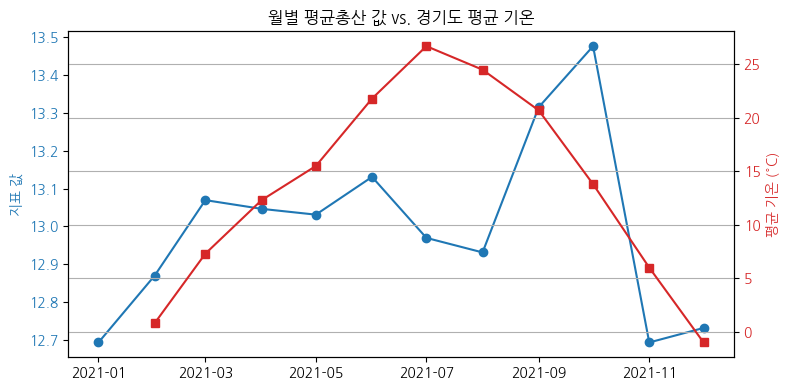

경상남도
R = 0.23248420695270217


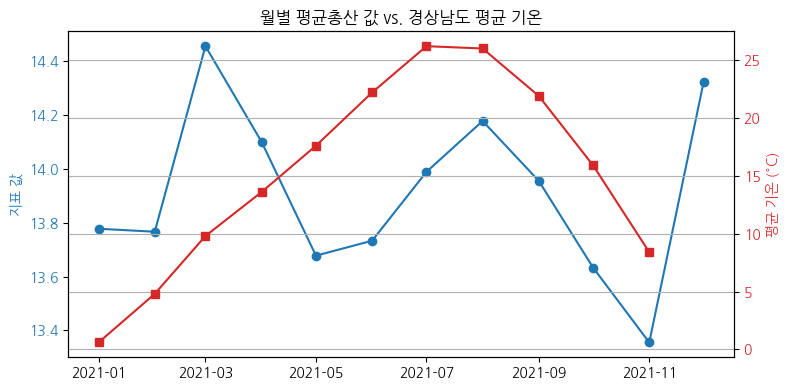

경상북도
R = 0.5214287988547605


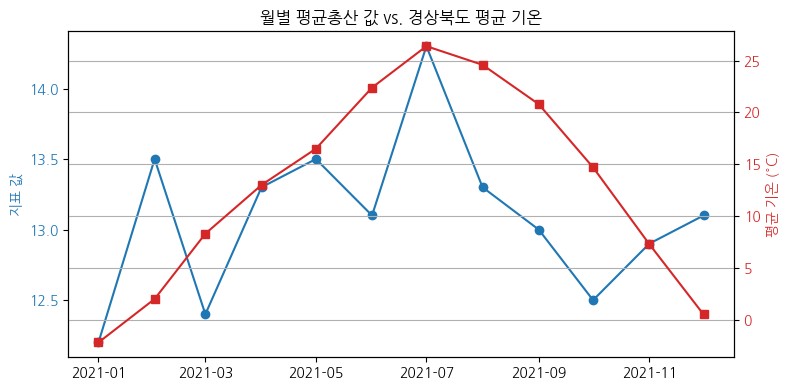

전라남도
R = -0.4646735249909086


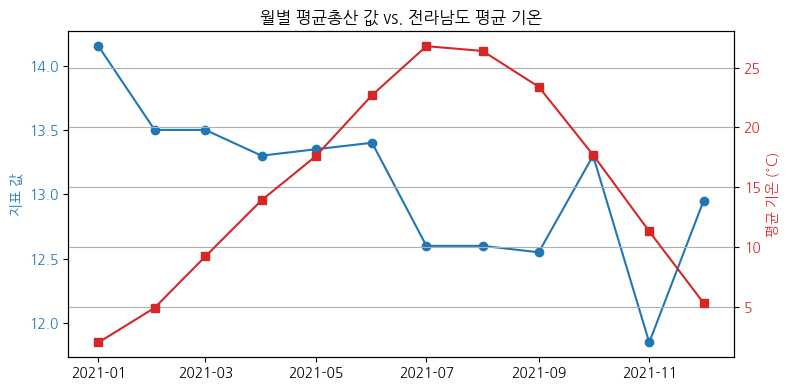

충청남도
R = nan


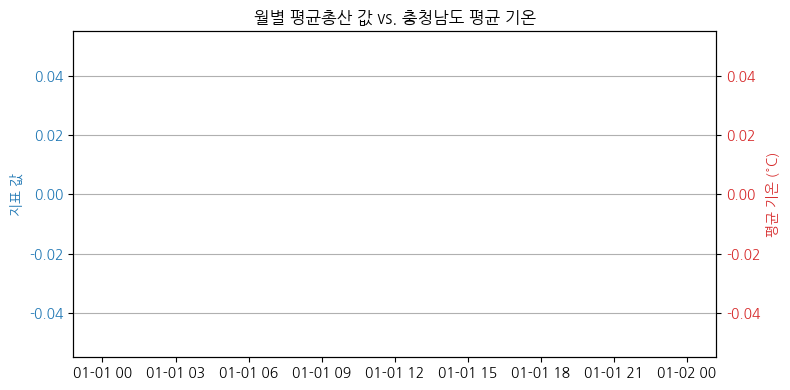

충청북도
R = nan


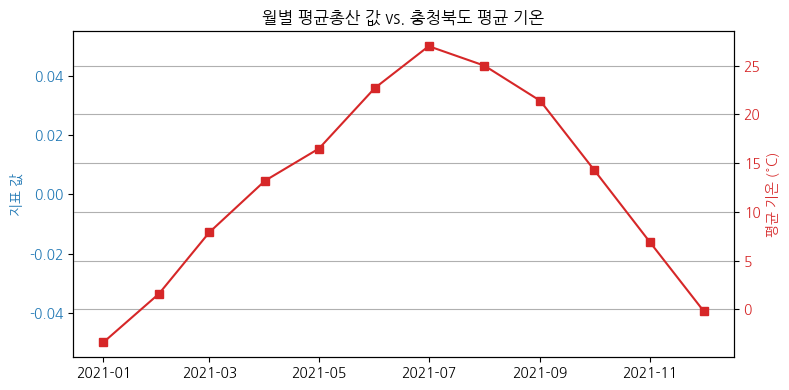

경기도
R = 0.1296288084902159


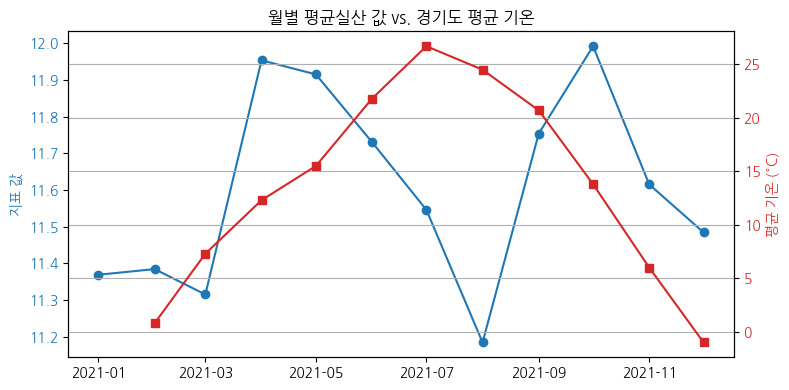

경상남도
R = 0.11238188681012609


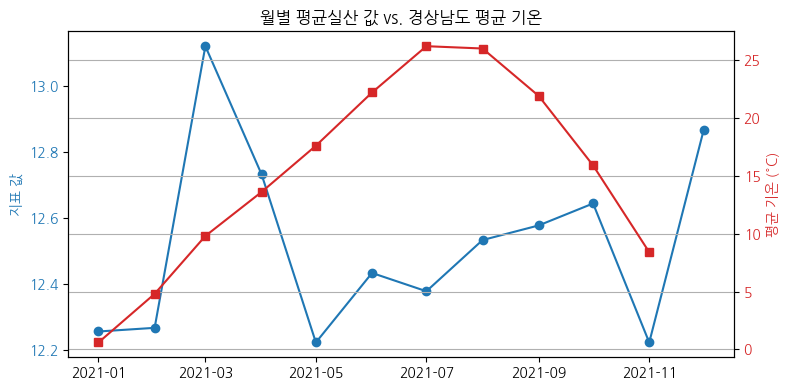

경상북도
R = 0.3913574431898054


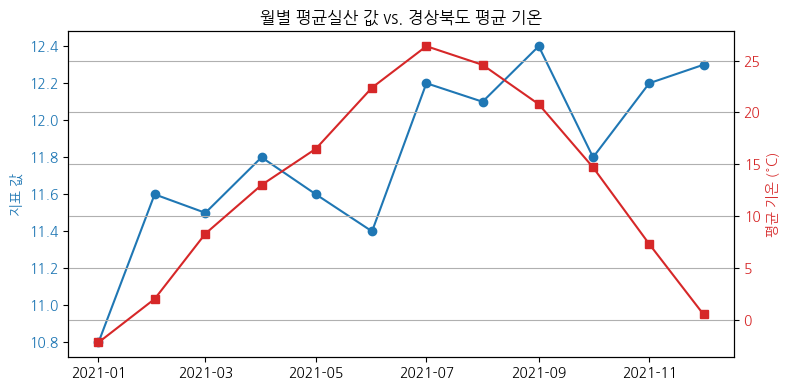

전라남도
R = -0.5471681533246431


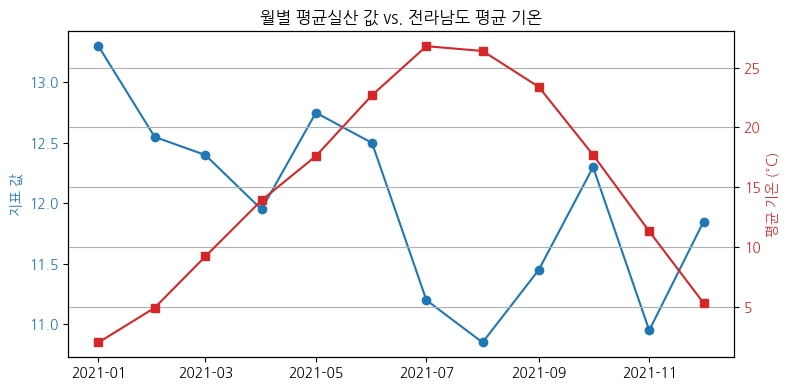

충청남도
R = nan


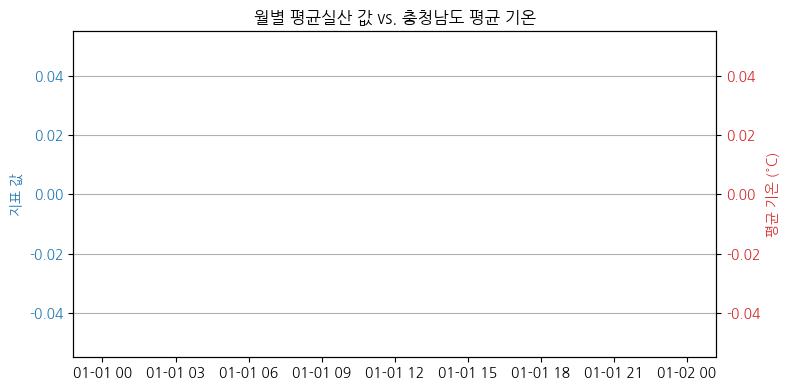

충청북도
R = nan


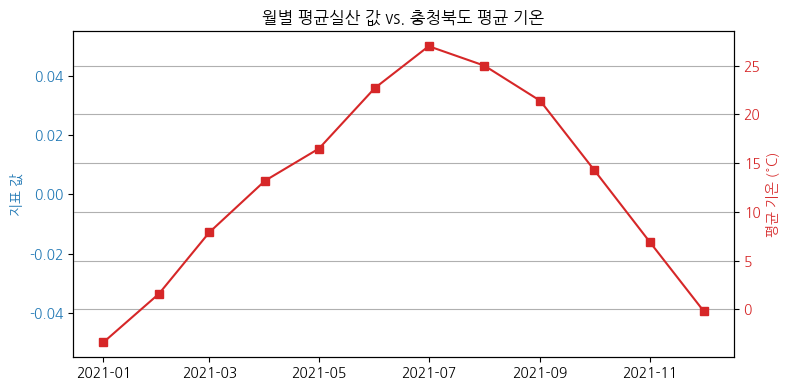

경기도
R = -0.2266839801588102


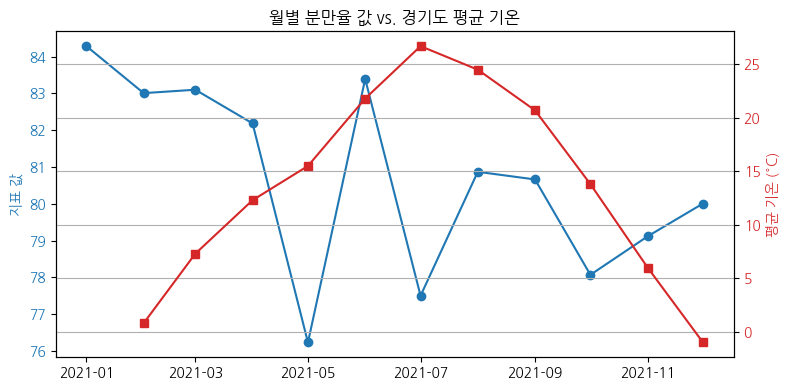

경상남도
R = -0.5241782938266472


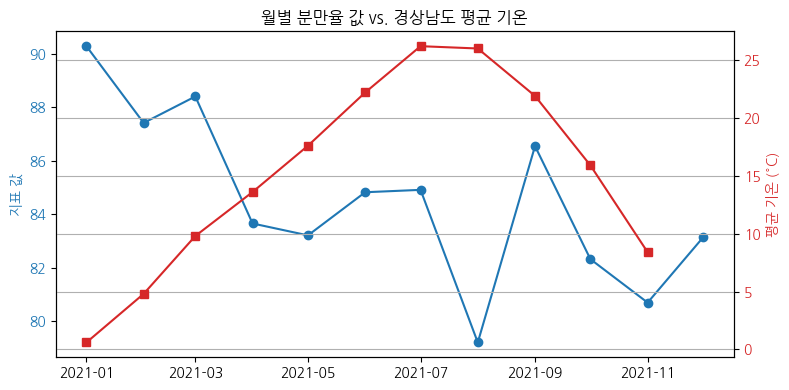

경상북도
R = 0.47951181008134286


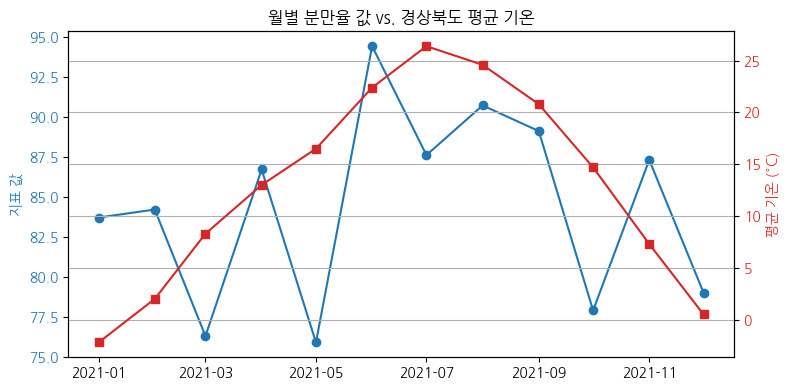

전라남도
R = -0.31234785502807294


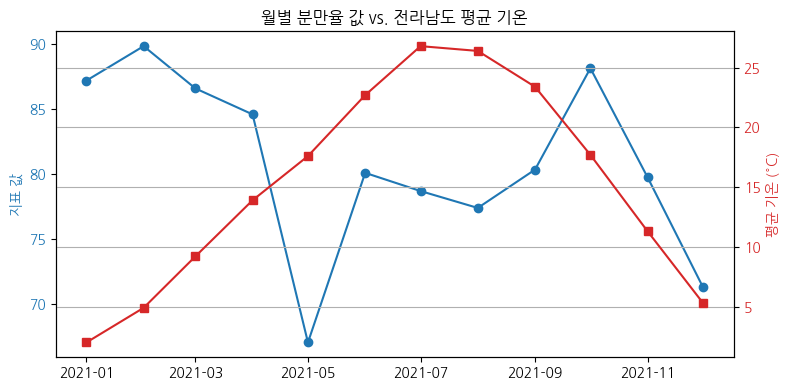

충청남도
R = nan


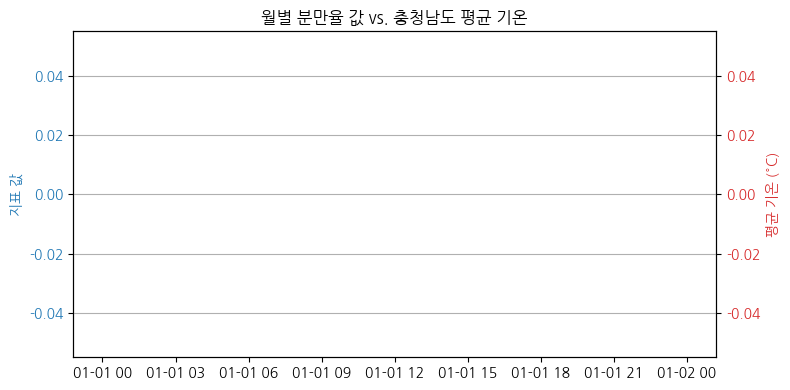

충청북도
R = nan


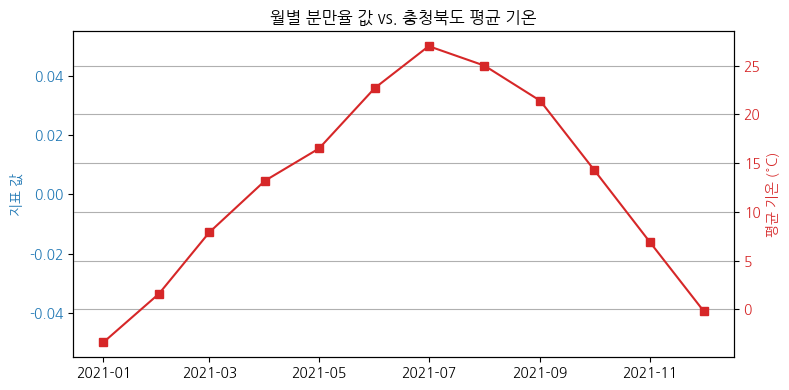

경기도
R = -0.5864055922773798


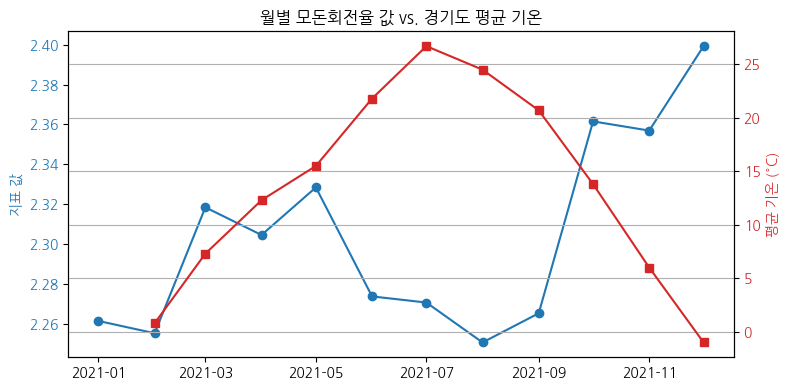

경상남도
R = -0.26208025762478404


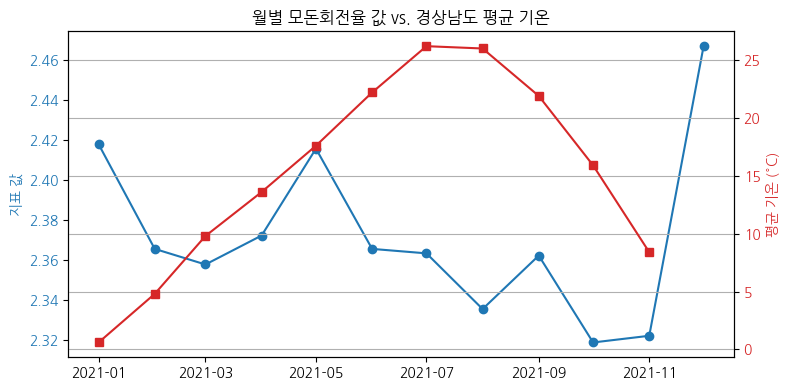

경상북도
R = 0.2209966456827309


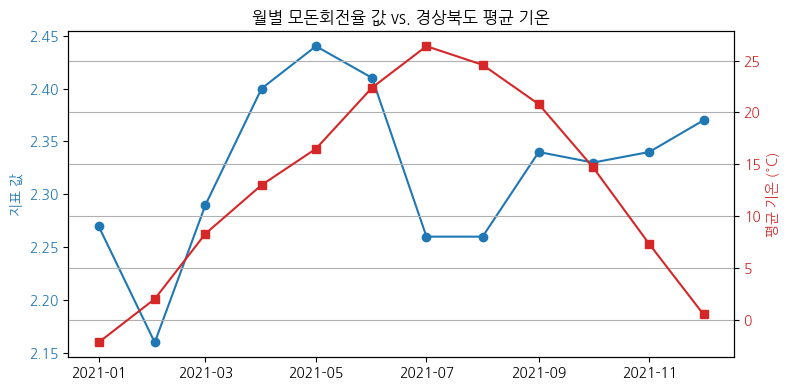

전라남도
R = -0.4122270720913507


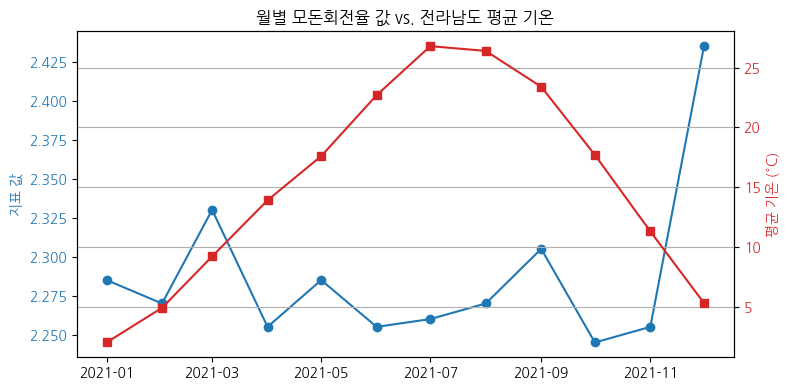

충청남도
R = nan


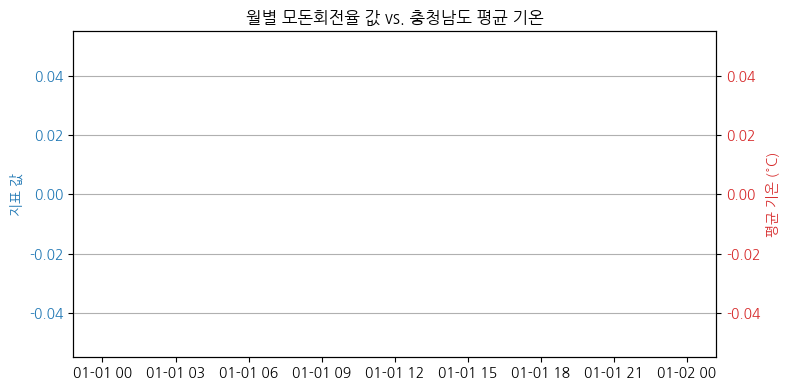

충청북도
R = nan


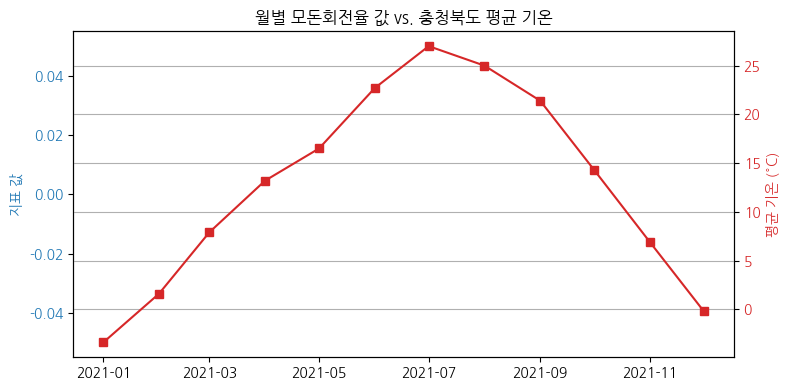

경기도
R = 0.35479013915384067


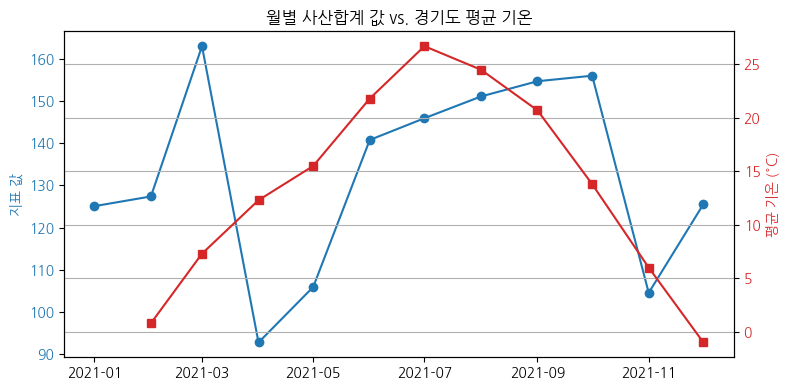

경상남도
R = 0.7420889422837571


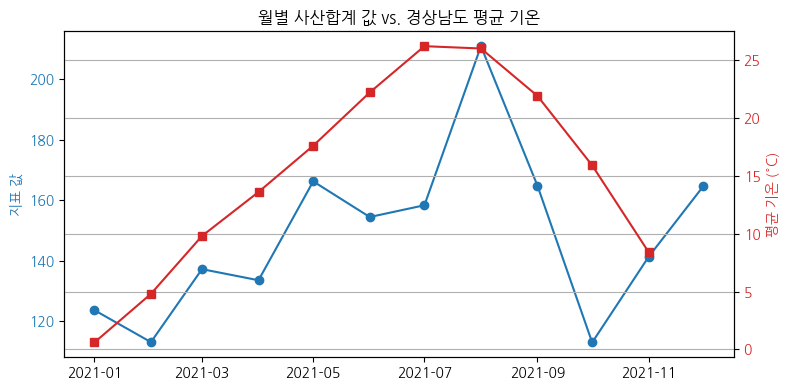

경상북도
R = 0.4322276936571751


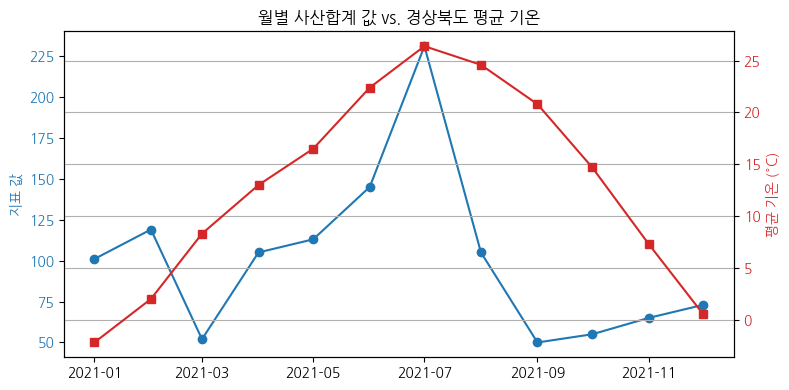

전라남도
R = 0.764286117223827


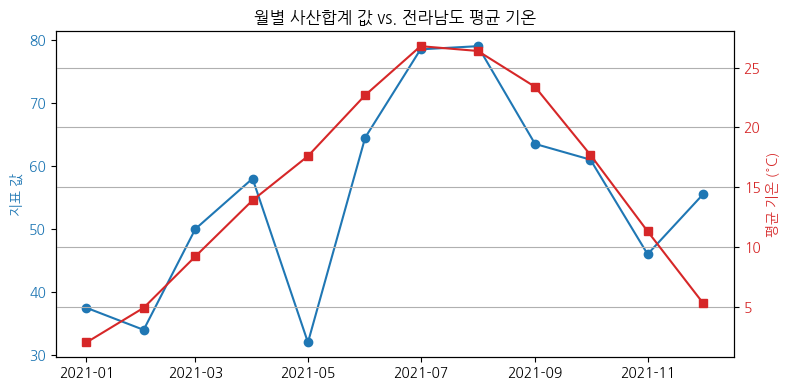

충청남도
R = nan


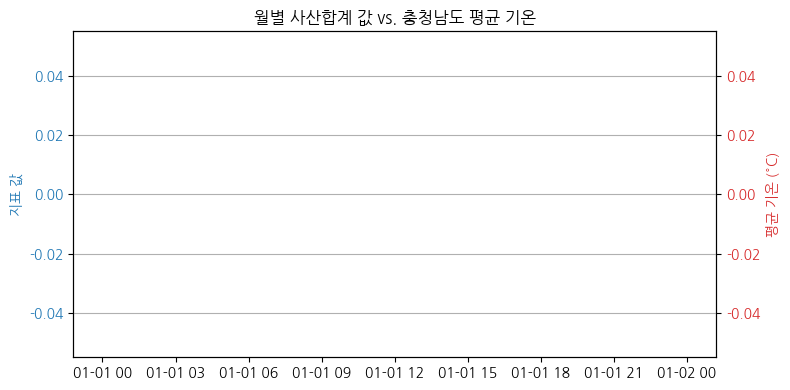

충청북도
R = nan


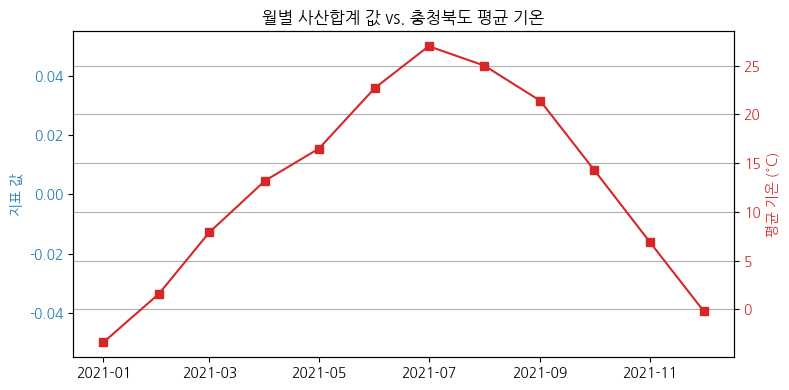

경기도
R = 0.5345979650341076


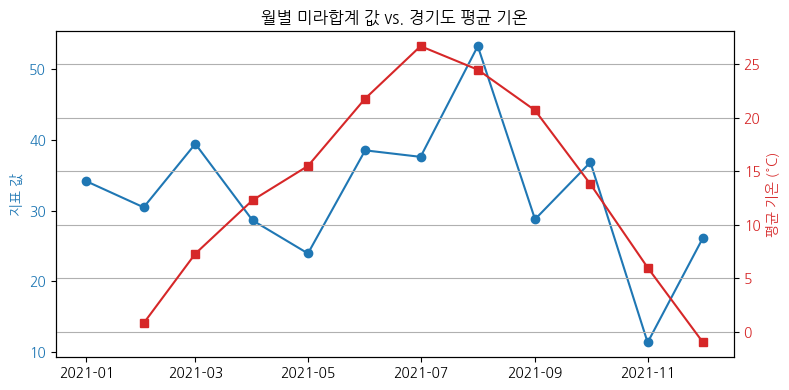

경상남도
R = -0.6988448338680626


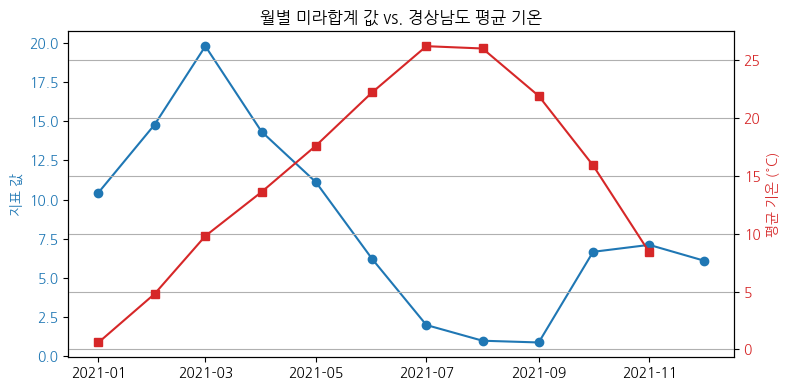

경상북도
R = 0.07211001029915724


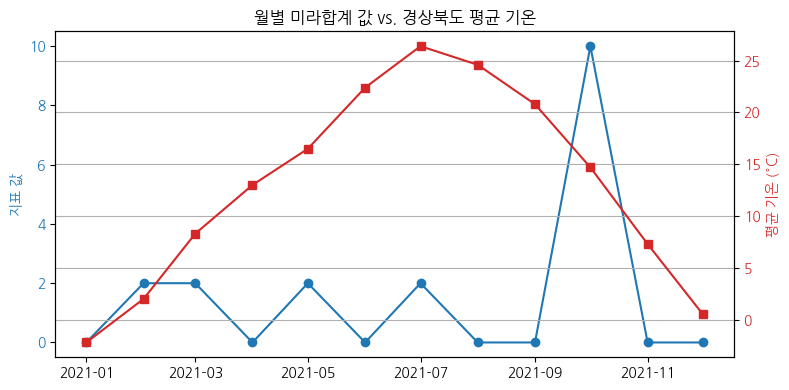

전라남도
R = 0.31832756954358865


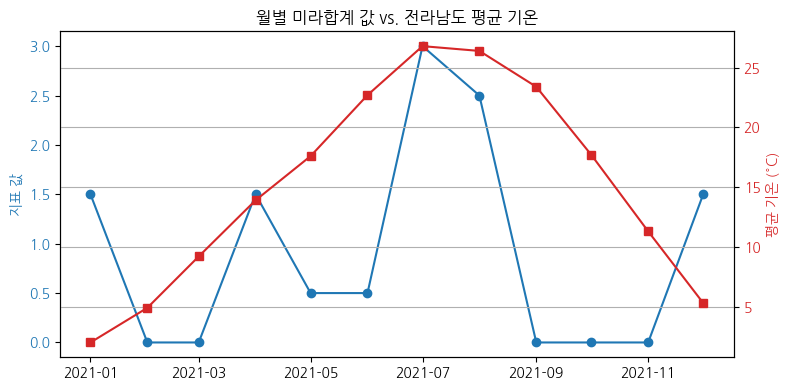

충청남도
R = nan


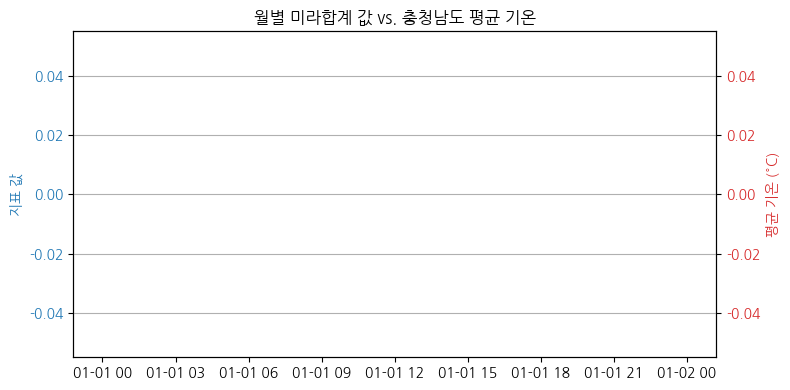

충청북도
R = nan


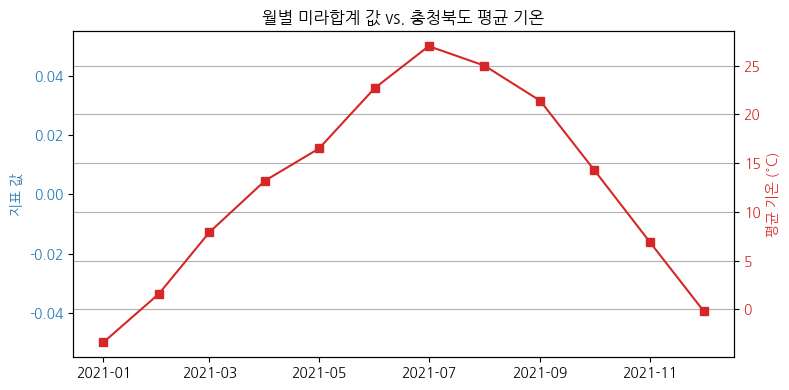

In [497]:
for i in range(6):
    plotLocaldataWithWeather('평균총산', i)
for i in range(6):
    plotLocaldataWithWeather('평균실산', i)
for i in range(6):
    plotLocaldataWithWeather('분만율', i)
for i in range(6):
    plotLocaldataWithWeather('모돈회전율', i)
for i in range(6):
    plotLocaldataWithWeather('사산합계', i)
for i in range(6):
    plotLocaldataWithWeather('미라합계', i)

경기도
R = 0.35479013915384067


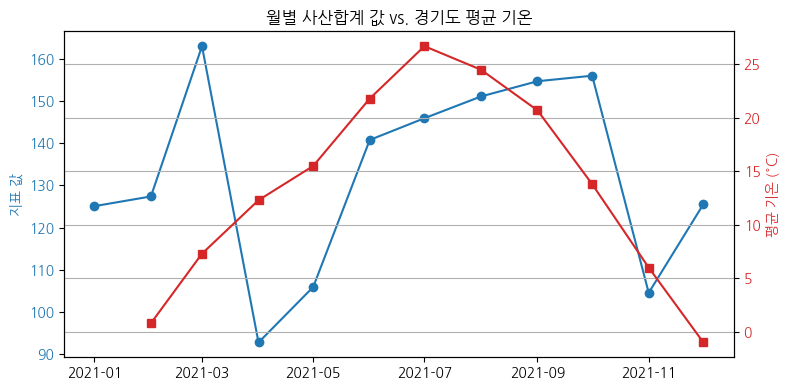

경상남도
R = 0.7420889422837571


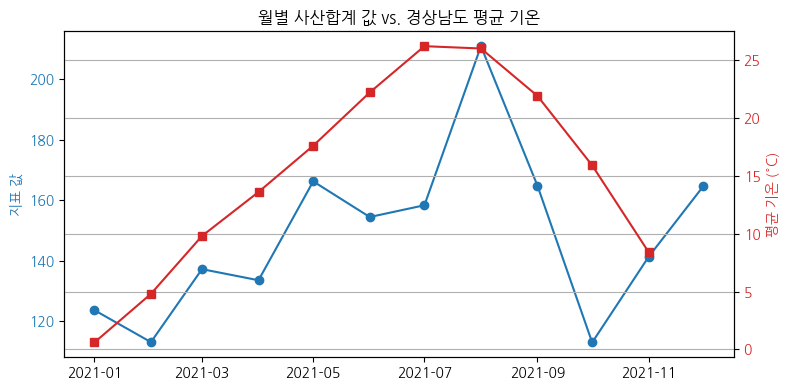

경상북도
R = 0.4322276936571751


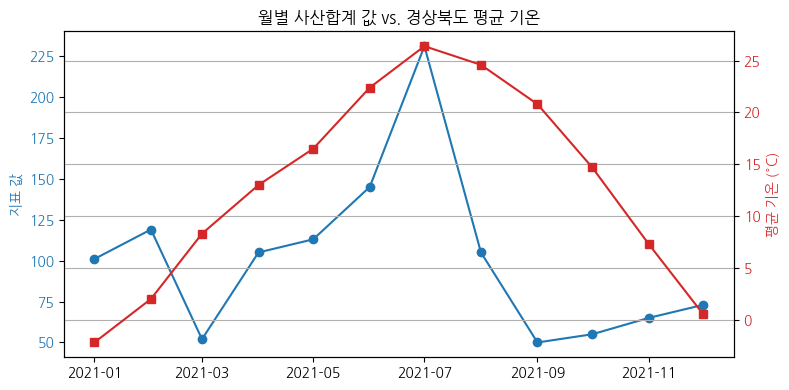

전라남도
R = 0.764286117223827


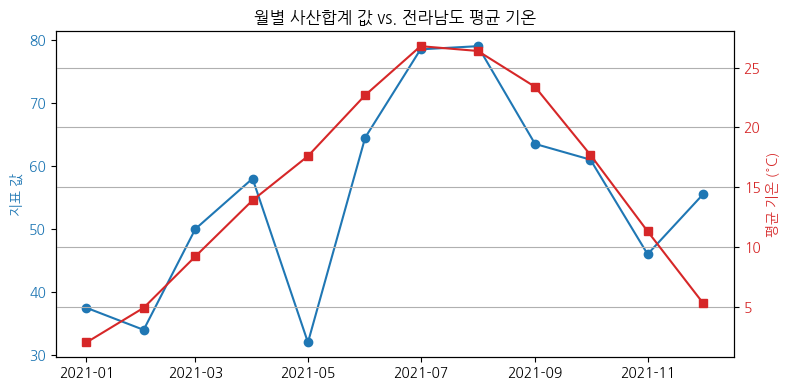

충청남도
R = nan


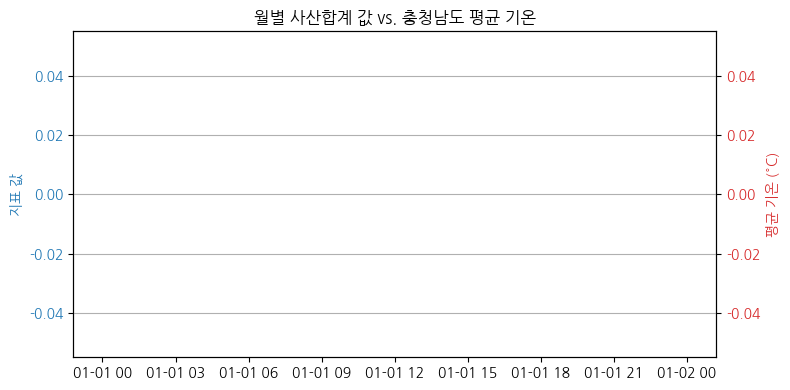

충청북도
R = nan


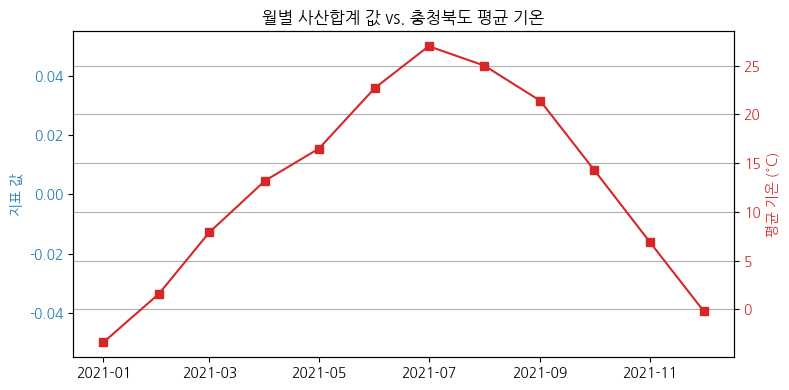

In [498]:
for i in range(6):
    plotLocaldataWithWeather('사산합계', i)

## 농장 ID별 생산성 지표 연도별 추이

In [510]:
import mysql.connector

conn = mysql.connector.connect(
    host = 'database-1.cba44miw26by.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'kjy',
    password = '0000',
    database = 'pig'
)

cursor = conn.cursor()

In [515]:
_ = cursor.fetchall() 

In [534]:
sql = '''select farm_id, count(*) as cnt 
from pig_db_yearly 
group by farm_id 
having cnt >= 10
order by cnt desc'''

cursor.execute(sql)
result = cursor.fetchall()
farm_list = pd.DataFrame(result)
farm_list.columns = ['농장', 'count']
farm_list.head()

농장  count
0  PIGGO_155     12
1  PIGGO_193     12
2  PIGGO_198     12
3  PIGGO_192     12
4  PIGGO_106     12

In [535]:
farm_list['농장']

0     PIGGO_155
1     PIGGO_193
2     PIGGO_198
3     PIGGO_192
4     PIGGO_106
5     PIGGO_346
6     PIGGO_105
7     PIGGO_209
8     PIGGO_246
9     PIGGO_163
10    PIGGO_194
11    PIGGO_244
12     PIGGO_25
13    PIGGO_231
14     PIGGO_34
15    PIGGO_100
16    PIGGO_199
17    PIGGO_242
18    PIGGO_245
19     PIGGO_23
20    PIGGO_196
21     PIGGO_17
22    PIGGO_248
23    PIGGO_165
24    PIGGO_202
25    PIGGO_179
26    PIGGO_236
27     PIGGO_18
28    PIGGO_156
29    PIGGO_232
30     PIGGO_36
31     PIGGO_32
32     PIGGO_22
33    PIGGO_108
34    PIGGO_235
35    PIGGO_238
36     PIGGO_16
37    PIGGO_154
38    PIGGO_178
39    PIGGO_226
40    PIGGO_188
Name: 농장, dtype: object

In [525]:
cols_yearly = ["ID", "년도", "규모", "농장", "상시모돈수", "MSY", "PSY", "모돈회전율", "평균비생산일수", 
    "평균총산", "평균실산", "평균이유", "분만율", "초교배일령", "임신기간", "포유기간", "재귀발정일"]

cursor.execute('''select * from pig_db_yearly''')
result = cursor.fetchall()
df_farm = pd.DataFrame(result)
df_farm.columns = cols_yearly
df_farm.head()

ID    년도        규모         농장  상시모돈수   MSY   PSY  모돈회전율  평균비생산일수  평균총산  \
0   0  2019   100~200  PIGGO_156  144.0  17.2  19.7   2.13     75.0  13.0   
1   1  2021  500~1000  PIGGO_182  523.0  16.2  24.9   2.28     46.0  14.0   
2   2  2018   100~200  PIGGO_156  146.0  19.2  21.7   2.18     69.0  13.0   
3   3  2021  500~1000    0021749  637.0   NaN  29.2   2.52     25.0  14.0   
4   4  2021   400~500    0021437  454.0   NaN  30.9   2.29     44.0  16.0   

   평균실산  평균이유   분만율  초교배일령   임신기간  포유기간  재귀발정일  
0  11.0   9.0  65.4  257.0  116.0  20.0    8.0  
1  12.0  11.0  82.4  261.0  115.0  27.0    8.0  
2  12.0  10.0  76.3  263.0  116.0  20.0   13.0  
3  12.0  12.0  90.5  269.0  116.0  24.0    8.0  
4  14.0  14.0  81.5  232.0  114.0  27.0    8.0

In [531]:
prod = ["상시모돈수", "MSY", "PSY", "모돈회전율", "평균비생산일수", 
    "평균총산", "평균실산", "평균이유", "분만율", "초교배일령", "임신기간", "포유기간", "재귀발정일"]

df_farm_pivot = pd.pivot_table(data=df_farm, index=['농장', '년도'], values=prod, aggfunc='mean').reset_index()
df_farm_pivot = df_farm_pivot[['농장', '년도'] + prod]  # 칼럼 순서 정렬
df_farm_pivot

농장    년도   상시모돈수   MSY   PSY  모돈회전율  평균비생산일수  평균총산  평균실산  평균이유  \
0      0020069  2012    98.0  17.4  19.1   2.11     69.0  12.0  10.0   9.0   
1      0020069  2019   146.0   NaN  21.0   2.24     63.0  13.0  11.0   9.0   
2      0020069  2020   147.0   NaN  22.2   2.29     57.0  13.0  11.0  10.0   
3      0020199  2019   152.0   NaN  24.1   2.33     31.0  12.0  11.0  10.0   
4      0020199  2020   289.0   NaN  22.4   2.12     55.0  12.0  12.0  11.0   
...        ...   ...     ...   ...   ...    ...      ...   ...   ...   ...   
1057  PIGGO_99  2016  1002.0   NaN  22.3   2.26     57.0  13.0  12.0  10.0   
1058  PIGGO_99  2017  1015.0   NaN  21.0   2.12     79.0  12.0  11.0  10.0   
1059  PIGGO_99  2018  1194.0   NaN  24.2   2.38     49.0  12.0  11.0  10.0   
1060  PIGGO_99  2019  1248.0   NaN  20.8   2.12     85.0  12.0  11.0  10.0   
1061  PIGGO_99  2020  1056.0   NaN  20.3   2.02     84.0  12.0  11.0  10.0   

       분만율  초교배일령   임신기간  포유기간  재귀발정일  
0     73.0  268.0  115.0  26.0    8.0  
1     70.2  254.0  116.0  20.0    8.0  
2     76.7  257.0  115.0  20.0    9.0  
3     96.8  241.0  122.0  26.0    7.0  
4     90.3  227.0  122.0  27.0    6.0  
...    ...    ...    ...   ...    ...  
1057  77.8  253.0  117.0  22.0    7.0  
1058  72.2  268.0  116.0  21.0    8.0  
1059  75.8  252.0  116.0  21.0    5.0  
1060  69.0  249.0  115.0  21.0    5.0  
1061  62.8  264.0  116.0  24.0    7.0  

[1062 rows x 15 columns]

In [569]:
selected_farms = farm_list['농장'].iloc[:10].unique()
df_farm_filtered = df_farm_pivot[df_farm_pivot['농장'].isin(selected_farms)]

def plotByFarmid(indicator):
    plt.figure(figsize=(8, 4))
    for farm_id, group in df_farm_filtered.groupby('농장'):
        plt.plot(group['년도'], group[indicator], label=farm_id)

    plt.title(f'농장별 연도별 {indicator} 추이')
    plt.xlabel('년도')
    plt.ylabel(f'{indicator}')
    plt.legend(title='농장', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

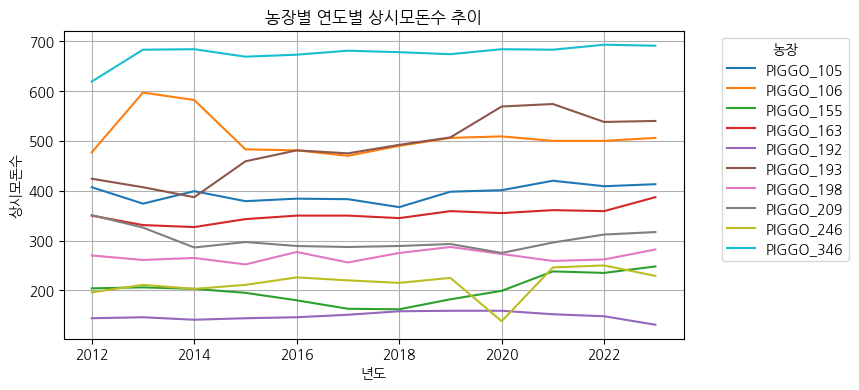

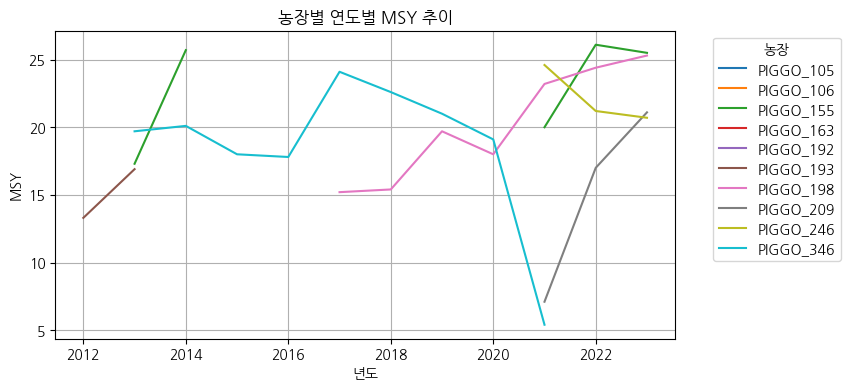

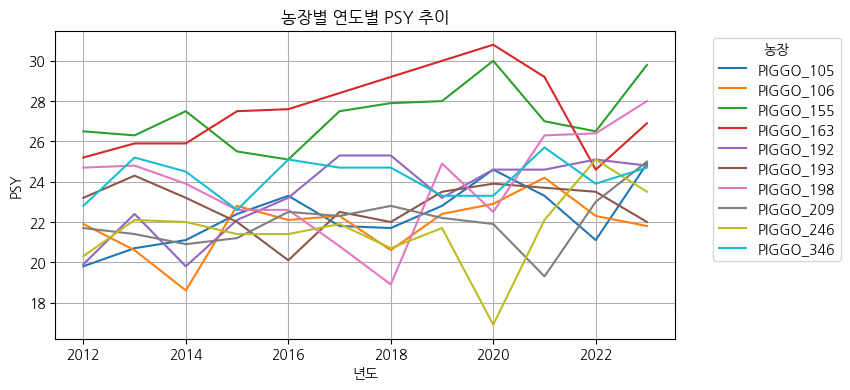

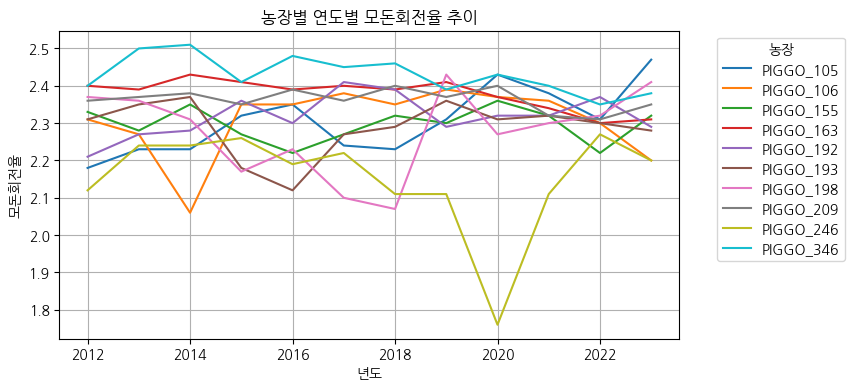

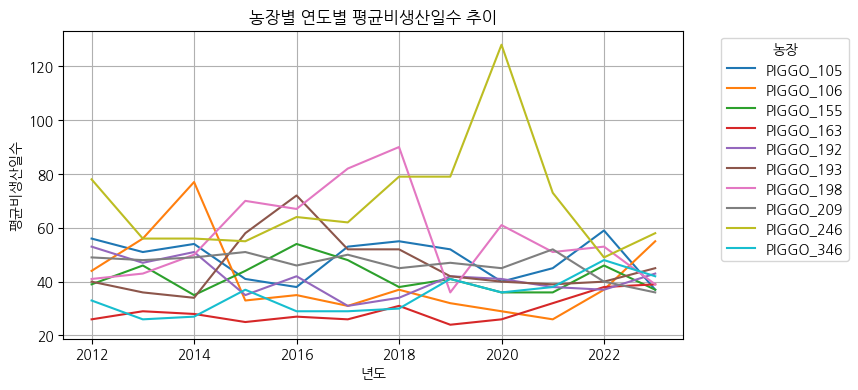

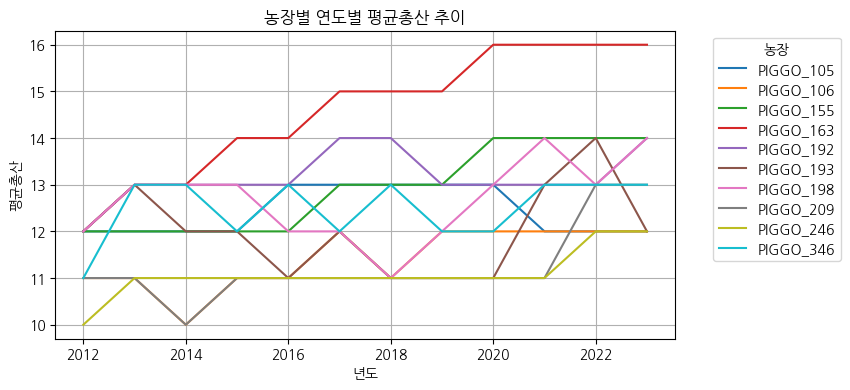

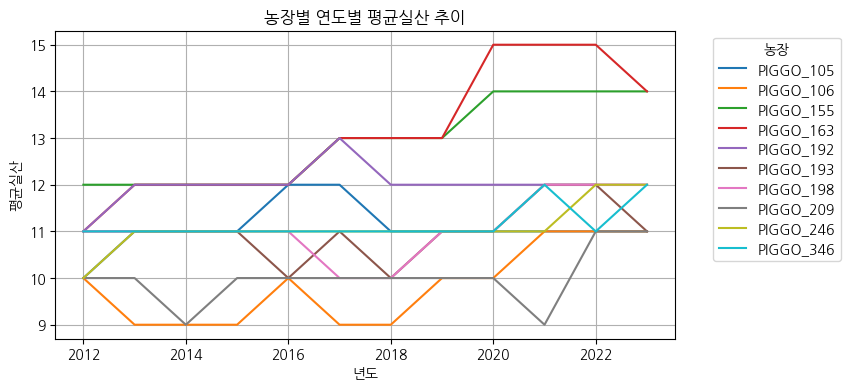

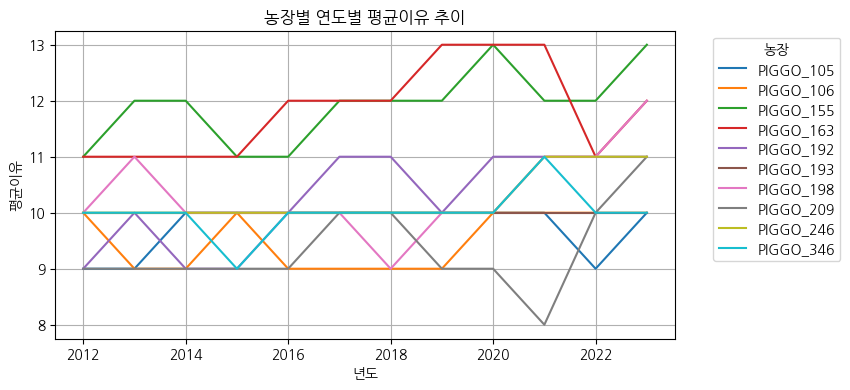

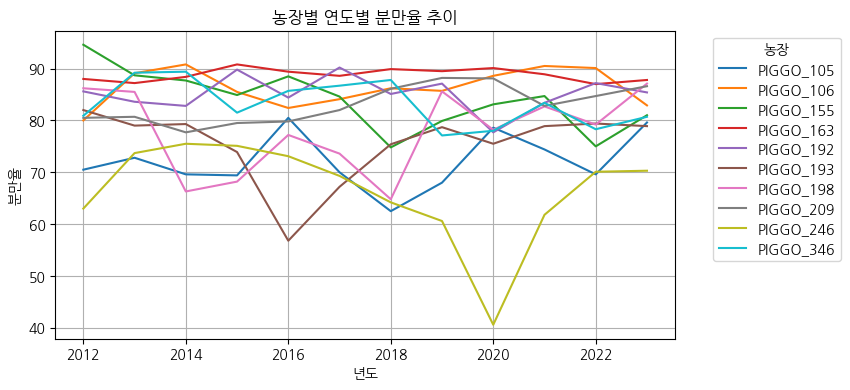

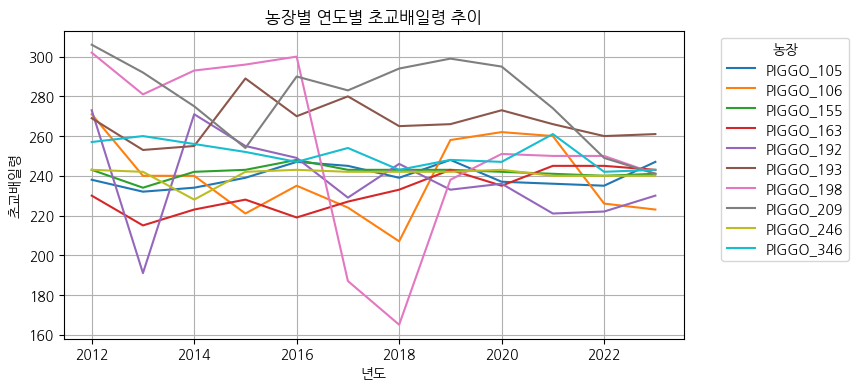

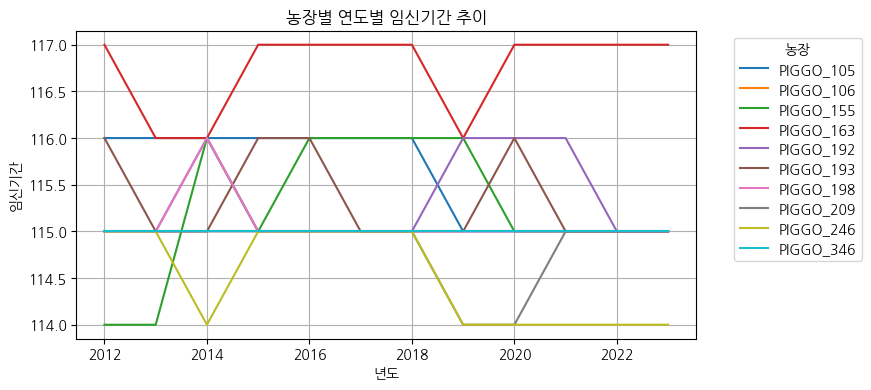

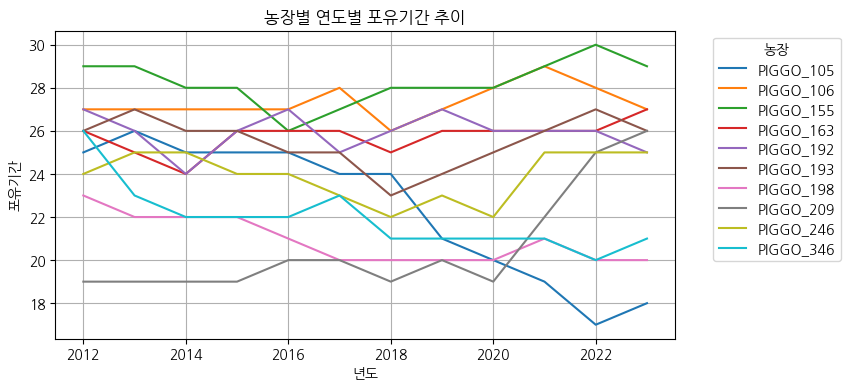

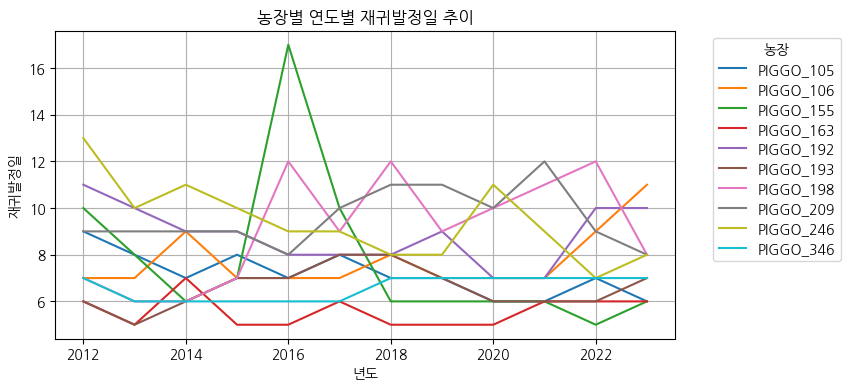

In [570]:
for i in prod:
    plotByFarmid(i)

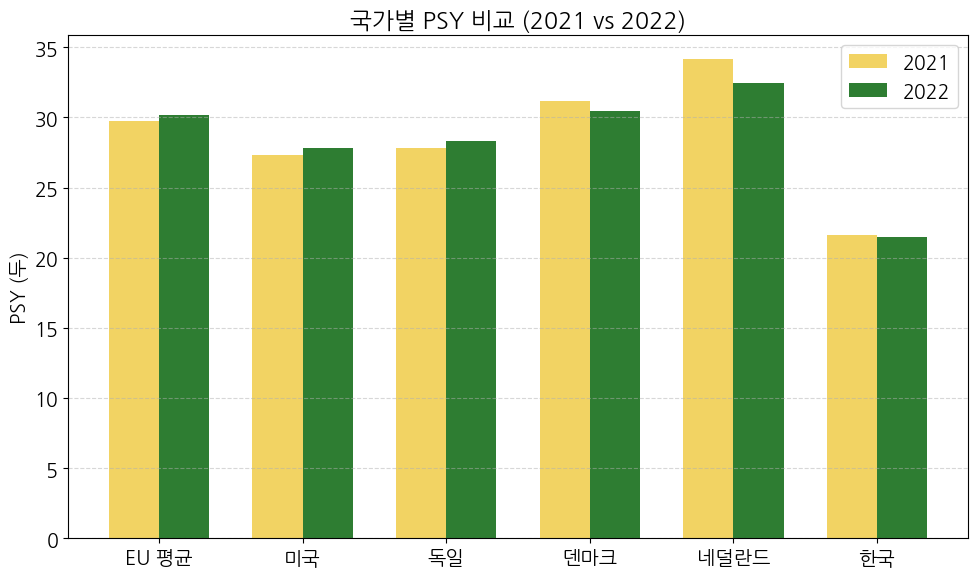

In [607]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 수동 입력
data = {
    "국가": ["EU 평균", "미국", "독일", "덴마크", "네덜란드", "한국"],
    "2021": [29.71, 27.35, 27.81, 31.17, 34.14, 21.6],
    "2022": [30.16, 27.81, 28.31, 30.44, 32.47, 21.5]
}

df = pd.DataFrame(data)

colors = ['#F2D363', '#2E7D32']  # 2021: 노랑, 2022: 주황

plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(10, 6))
x = range(len(df["국가"]))
bar_width = 0.35

plt.bar([i - bar_width/2 for i in x], df["2021"], width=bar_width, label="2021", color=colors[0])
plt.bar([i + bar_width/2 for i in x], df["2022"], width=bar_width, label="2022", color=colors[1])

plt.xticks(x, df["국가"])
plt.ylabel("PSY (두)")
plt.title("국가별 PSY 비교 (2021 vs 2022)")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()
